In [1]:
import numpy as np
import pandas as pd
import matplotlib
import matplotlib.pyplot as plt
import scipy.optimize
# nelder-mead optimization of noisy one-dimensional convex function
from scipy.optimize import minimize
from numpy.random import rand
from scipy import interpolate
import itertools
import time
from scipy import signal
import datetime
from datetime import timedelta, date
from scipy.interpolate import InterpolatedUnivariateSpline
import seaborn as sns
from matplotlib.figure import figaspect
from mpl_toolkits.axes_grid1 import make_axes_locatable
import matplotlib.colors as mcolors
import numpy.ma as ma
import scipy.interpolate as spinterp
import itertools

In [2]:
path_df_export = '/home/colili/Documents/PhD/ploughmeter_project/processing_2122/Dataframe_produced/Dataframe_clean/season_3D/'
path_fig_export = '/home/colili/Documents/PhD/ploughmeter_project/processing_2122/Figure/Figure_clean_paper/band_pass_season_3D/'

# Import the dataframe 

In [3]:
df_data_raw = pd.read_csv('/home/colili/Documents/PhD/ploughmeter_project/processing_2122/Dataframe_produced/Dataframe_clean/raw_data_3H/df_all_data_3H.csv',
                     sep=',', header=[0], parse_dates=[0])

In [4]:
# df_data.info()

In [5]:
df_data = df_data_raw[['Time','TIMESTAMP', 'L', 'Pe', 'P3-10', 'P30-45', 'R', 'S', 'Runoff']]

In [6]:
df_data.columns=['Time','TIMESTAMP', 'L', 'Pe', 'P3_10', 'P30_45', 'R', 'S', 'Runoff']

# Split data to have the melt season 2021 and 2022 in two dataframes

In [7]:
df_melt_2021=df_data[128:896]

In [8]:
df_melt_2022=df_data[2753:3423]

In [9]:
df_winter_2122 = df_data[896:2753]

# Seasonal trend of the data

In [10]:
for i in np.arange(2, df_data.shape[1]):
    idx = np.isfinite(df_data[df_data.columns[i]])
    fit= np.polyfit(np.arange(df_data.index[idx].shape[0]), df_data[df_data.columns[i]][idx], deg=1)
    function= np.poly1d(fit)
    globals()['fit_%s'%df_data.columns[i]]=function(df_data.index[idx].shape[0])

In [11]:
fit_L

168.28537354433274

## Band pass filter of the data between 30 and 60 days

In [12]:
ts=df_data['Time'][1]-df_data['Time'][0]
fs = 1/ts
ts

0.125

In [13]:
# b = signal.butter(1, [1/60, 1/40]/fs, 'band')[0]
# a = signal.butter(1, [1/60, 1/40]/fs, 'band')[1]

# for i in np.arange(2, df_data.shape[1]):
#     idx = np.isfinite(df_data[df_data.columns[i]])
#     globals()['filterbandpass_%s_seasonal'%df_data.columns[i]]=signal.filtfilt(b, a, df_data[df_data.columns[i]][idx])

In [14]:
df_data

Time           TIMESTAMP          L        Pe       P3_10  \
0       0.000 2021-06-15 00:00:00  74.485646  2.798299 -181.124786   
1       0.125 2021-06-15 03:00:00  74.640594  2.798578 -181.002675   
2       0.250 2021-06-15 06:00:00  74.651018  2.798510 -181.148872   
3       0.375 2021-06-15 09:00:00  74.841066  2.799789 -181.145803   
4       0.500 2021-06-15 12:00:00  75.202417  2.802315 -181.114303   
...       ...                 ...        ...       ...         ...   
3434  429.250 2022-08-18 03:00:00        NaN  2.940760         NaN   
3435  429.375 2022-08-18 06:00:00        NaN  2.941868         NaN   
3436  429.500 2022-08-18 09:00:00        NaN  2.943030         NaN   
3437  429.625 2022-08-18 12:00:00        NaN  2.947946         NaN   
3438  429.750 2022-08-18 15:00:00        NaN  2.955964         NaN   

          P30_45   R   S    Runoff  
0    -186.341062 NaN NaN  0.000000  
1    -186.356163 NaN NaN  0.000000  
2    -186.345079 NaN NaN  0.000000  
3    -186.331719 NaN NaN  0.000000  
4    -186.301181 NaN NaN  0.000000  
...          ...  ..  ..       ...  
3434         NaN NaN NaN  6.912048  
3435         NaN NaN NaN       NaN  
3436         NaN NaN NaN       NaN  
3437         NaN NaN NaN       NaN  
3438         NaN NaN NaN       NaN  

[3439 rows x 9 columns]

1.164079263351445e-18
1.164079263351445e-18


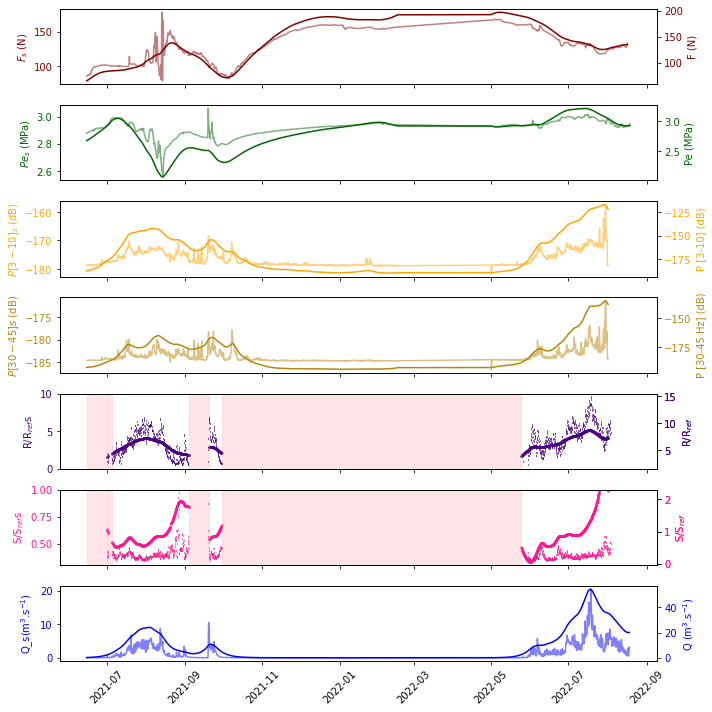

In [15]:
b = signal.butter(1, 1/20/fs, 'low')[0]
a = signal.butter(1, 1/20/fs, 'low')[1]

for i in np.arange(2, df_data.shape[1]):
    idx = np.isfinite(df_data[df_data.columns[i]])
    globals()[f'filterbandpass_%s_seasonal'%df_data.columns[i]]=signal.filtfilt(b, a, df_data[df_data.columns[i]][idx])


color = ['maroon', 'darkgreen', 'orange', 'darkgoldenrod', 'indigo', 'deeppink', 'b',]
label = ['$F_{s}$ (N)', r'$Pe_{s}$ (MPa)', r'$P[3-10]_{s}$ (dB)', r'$P[30-45]{s}$ (dB)', 'R/R$_{ref}$s', 'S/S$_{ref}$s', 'Q_s(m$^3$.s$^{-1}$)']
label_raw = ['F (N)', 'Pe (MPa)', 'P [3-10] (dB)', 'P [30-45 Hz] (dB)', 'R/R$_{ref}$', 'S/S$_{ref}$', 'Q (m$^3$.s$^{-1}$)']



fig, axs = plt.subplots(df_data.shape[1]-2, 1, figsize=(10, 10), sharex='col')
  
    # for i in np.arange(2, df_temp.shape[1]):
for i in [2, 3, 4, 5, 8, 6, 7]:
    idx = np.isfinite(df_data[df_data.columns[i]])
    # data = globals()[f'filterbandpass_%s_seasonal'%df_data.columns[i]]+globals()[f'fit_%s'%df_data.columns[i]]
    data = globals()[f'filterbandpass_%s_seasonal'%df_data.columns[i]]


    if (df_data.columns[i]!= 'R') & (df_data.columns[i]!= 'S'):

        globals()[f'df_filter_season_{df_data.columns[i]}']=pd.DataFrame({'TIMESTAMP':df_data['TIMESTAMP'][idx], 
                                                                          str(df_data.columns[i]):data})
        globals()[f'df_filter_season_{df_data.columns[i]}'].to_csv(path_df_export+f'seasonal_band_pass/df_filter_season_norm_{df_data.columns[i]}.csv')
        axs[i-2].plot(df_data['TIMESTAMP'][idx], data, color[i-2])
        axs[i-2].set_ylabel(label[i-2], color=color[i-2])
        axs[i-2].tick_params(axis='y', labelcolor=color[i-2])
        axs[i-2].tick_params(axis='x', rotation=45)

        ax1=axs[i-2].twinx()
        ax1.plot(df_data['TIMESTAMP'][idx], df_data[df_data.columns[i]][idx], color[i-2], alpha=0.5)
        ax1.set_ylabel(label_raw[i-2], color=color[i-2])
        ax1.tick_params(axis='y', labelcolor=color[i-2])

    else:
        Q_season = pd.DataFrame({'TIMESTAMP': df_filter_season_Runoff['TIMESTAMP'], 'Q_season':filterbandpass_Runoff_seasonal})
        P_season = pd.DataFrame({'TIMESTAMP': df_filter_season_P3_10['TIMESTAMP'], 'P_season':10**(filterbandpass_P3_10_seasonal/10)})
        Q_P_season = pd.concat([Q_season.set_index('TIMESTAMP'), P_season.set_index('TIMESTAMP')], axis=1, join='inner')
        Q_P_season.reset_index(inplace=True)
        
        ref_P = Q_P_season.loc[Q_P_season['TIMESTAMP']=='2021-06-24 00:00:00']['P_season'].values[0]
        ref_Q = Q_P_season.loc[Q_P_season['TIMESTAMP']=='2021-06-24 00:00:00']['Q_season'].values[0]
        
        print(ref_P)
        
        S = (Q_P_season['P_season']/ref_P)**(24/41)*(Q_P_season['Q_season']/ref_Q)**(-30/41)
        R = (Q_P_season['P_season']/ref_P)**(-9/82)*(Q_P_season['Q_season']/ref_Q)**(21/41)
        

        df_filter_season_S = pd.DataFrame({'TIMESTAMP':Q_P_season['TIMESTAMP'], 'S': S})
        df_filter_season_R = pd.DataFrame({'TIMESTAMP':Q_P_season['TIMESTAMP'], 'R': R})
        
        x = np.arange(128, 138)
        y = np.arange(160, 645)
        z = np.arange(770, 850)
        m = np.arange(2150, 2701)
        idx_R_S = list(itertools.chain(x,y,z, m)) 
        # print(df_filter_season_S['S'][idx_R_S].values)
        
        df_filter_season_S = df_filter_season_S.loc[idx_R_S]
        df_filter_season_R = df_filter_season_R.loc[idx_R_S]

        
        axs[4].scatter(Q_P_season['TIMESTAMP'][idx_R_S], df_filter_season_R['R'], color=color[4], marker='o', s=1)
        axs[4].set_ylabel(label[4], color=color[4])
        axs[4].tick_params(axis='y', labelcolor=color[4])
        axs[4].set_ylim([0, 10])
        
        ax1=axs[4].twinx()
        ax1.scatter(df_data['TIMESTAMP'][idx], df_data['R'][idx], color=color[4], alpha=0.5, s=1, marker=1)
        ax1.set_ylabel(label_raw[4], color=color[4])
        ax1.tick_params(axis='y', labelcolor=color[4])

        
        axs[5].scatter(Q_P_season['TIMESTAMP'][idx_R_S], df_filter_season_S['S'], color=color[5], marker='o', s=1)
        axs[5].set_ylabel(label[5], color=color[5])
        axs[5].tick_params(axis='y', labelcolor=color[5])
        
        ax1=axs[5].twinx()
        ax1.scatter(df_data['TIMESTAMP'][idx], df_data['S'][idx], color=color[5], alpha=0.5, s=1, marker=1)
        ax1.set_ylabel(label_raw[5], color=color[5])
        ax1.tick_params(axis='y', labelcolor=color[5])
        
        axs[4].axvspan(Q_P_season['TIMESTAMP'][0], Q_P_season['TIMESTAMP'][128], color='lightpink', alpha=0.2)
        axs[4].axvspan(Q_P_season['TIMESTAMP'][138], Q_P_season['TIMESTAMP'][160], color='lightpink', alpha=0.2)
        axs[4].axvspan(Q_P_season['TIMESTAMP'][645], Q_P_season['TIMESTAMP'][770], color='lightpink', alpha=0.2)
        axs[4].axvspan(Q_P_season['TIMESTAMP'][850], Q_P_season['TIMESTAMP'][2150], color='lightpink', alpha=0.2)
        
        axs[5].axvspan(Q_P_season['TIMESTAMP'][0], Q_P_season['TIMESTAMP'][128], color='lightpink', alpha=0.2)
        axs[5].axvspan(Q_P_season['TIMESTAMP'][138], Q_P_season['TIMESTAMP'][160], color='lightpink', alpha=0.2)
        axs[5].axvspan(Q_P_season['TIMESTAMP'][645], Q_P_season['TIMESTAMP'][770], color='lightpink', alpha=0.2)
        axs[5].axvspan(Q_P_season['TIMESTAMP'][850], Q_P_season['TIMESTAMP'][2150], color='lightpink', alpha=0.2)

        axs[5].set_ylim([0.3, 1])
        
        # print(df_filter_season_R)
        
#         axs[4].plot(Q_P_season['TIMESTAMP'], df_filter_season_R['R'], color[4])
#         axs[4].set_ylabel(label[4], color=color[4])
#         axs[4].tick_params(axis='y', labelcolor=color[4])
#         axs[4].set_ylim([0, 10])

        
#         axs[5].plot(Q_P_season['TIMESTAMP'], df_filter_season_S['S'], color[5])
#         axs[5].set_ylabel(label[5], color=color[5])
#         axs[5].tick_params(axis='y', labelcolor=color[5])
#         axs[5].set_ylim([0, 0.5])



#         ax1=axs[i-2].twinx()
#         ax1.plot(df_data['TIMESTAMP'][idx], df_data[df_data.columns[i]][idx], color[i-2], alpha=0.5)

#         axs[i-2].set_ylabel(label[i-2], color=color[i-2])
#         axs[i-2].tick_params(axis='y', labelcolor=color[i-2])

        
plt.tight_layout()
plt.savefig(path_fig_export+'bandpass_seasonal.pdf', bbox_inches='tight')
globals()[f'df_filter_season_{df_data.columns[i]}'].to_csv(path_df_export+'seasonal_band_pass/df_filter_season_norm.csv')

# Hysteresis at the seasonal scale

In [16]:
len(filterbandpass_Runoff_seasonal)

3434

In [17]:
df_filter_season_Q_L = pd.concat([df_filter_season_Runoff.set_index(['TIMESTAMP']), df_filter_season_L.set_index(['TIMESTAMP'])], axis=1, join='inner')

In [18]:
df_filter_season_Q_Pe=pd.concat([df_filter_season_Runoff.set_index(['TIMESTAMP']), df_filter_season_Pe.set_index(['TIMESTAMP'])], axis=1, join='inner')

In [19]:
df_filter_season_Pe_L=pd.concat([df_filter_season_Pe.set_index(['TIMESTAMP']), df_filter_season_L.set_index(['TIMESTAMP'])], axis=1, join='inner')

In [20]:
df_filter_season_Q_P310=pd.concat([df_filter_season_Runoff.set_index(['TIMESTAMP']), df_filter_season_P3_10.set_index(['TIMESTAMP'])], axis=1, join='inner')

In [21]:
df_filter_season_Q_P3045=pd.concat([df_filter_season_Runoff.set_index(['TIMESTAMP']), df_filter_season_P30_45.set_index(['TIMESTAMP'])], axis=1, join='inner')

In [22]:
df_filter_season_Q_R=pd.concat([df_filter_season_Runoff.set_index(['TIMESTAMP']), df_filter_season_R.set_index(['TIMESTAMP'])], axis=1, join='inner')

In [23]:
df_filter_season_Q_S=pd.concat([df_filter_season_Runoff.set_index(['TIMESTAMP']), df_filter_season_S.set_index(['TIMESTAMP'])], axis=1, join='inner')

In [24]:
df_filter_season_Pe_L

Pe           L
TIMESTAMP                                
2021-06-15 00:00:00  2.823012   79.558467
2021-06-15 03:00:00  2.823638   79.679468
2021-06-15 06:00:00  2.824274   79.802426
2021-06-15 09:00:00  2.824920   79.927353
2021-06-15 12:00:00  2.825575   80.054225
...                       ...         ...
2022-08-16 03:00:00  2.932474  131.400357
2022-08-16 06:00:00  2.932505  131.428757
2022-08-16 09:00:00  2.932543  131.456768
2022-08-16 12:00:00  2.932589  131.484057
2022-08-16 15:00:00  2.932643  131.510005

[2830 rows x 2 columns]

In [25]:
df_filter_season_Q_R.reset_index(inplace=True)
df_filter_season_Q_R.groupby(df_filter_season_Q_R['TIMESTAMP'].dt.year).agg({'count'})

TIMESTAMP Runoff     R
              count  count count
TIMESTAMP                       
2021            575    575   575
2022            551    551   551

In [26]:
colors1 = plt.cm.Blues(np.linspace(0.1, 1, 1596))
colors2 = plt.cm.Reds(np.linspace(0.1, 1, 1105))

colors = np.vstack((colors1, colors2))
mymap_P310 = mcolors.LinearSegmentedColormap.from_list('my_colormap', colors)

In [27]:
colors1 = plt.cm.Blues(np.linspace(0.1, 1, 1600))
colors2 = plt.cm.Reds(np.linspace(0.1, 1, 1230))

colors = np.vstack((colors1, colors2))
mymap = mcolors.LinearSegmentedColormap.from_list('my_colormap', colors)

In [28]:
df_data

Time           TIMESTAMP          L        Pe       P3_10  \
0       0.000 2021-06-15 00:00:00  74.485646  2.798299 -181.124786   
1       0.125 2021-06-15 03:00:00  74.640594  2.798578 -181.002675   
2       0.250 2021-06-15 06:00:00  74.651018  2.798510 -181.148872   
3       0.375 2021-06-15 09:00:00  74.841066  2.799789 -181.145803   
4       0.500 2021-06-15 12:00:00  75.202417  2.802315 -181.114303   
...       ...                 ...        ...       ...         ...   
3434  429.250 2022-08-18 03:00:00        NaN  2.940760         NaN   
3435  429.375 2022-08-18 06:00:00        NaN  2.941868         NaN   
3436  429.500 2022-08-18 09:00:00        NaN  2.943030         NaN   
3437  429.625 2022-08-18 12:00:00        NaN  2.947946         NaN   
3438  429.750 2022-08-18 15:00:00        NaN  2.955964         NaN   

          P30_45   R   S    Runoff  
0    -186.341062 NaN NaN  0.000000  
1    -186.356163 NaN NaN  0.000000  
2    -186.345079 NaN NaN  0.000000  
3    -186.331719 NaN NaN  0.000000  
4    -186.301181 NaN NaN  0.000000  
...          ...  ..  ..       ...  
3434         NaN NaN NaN  6.912048  
3435         NaN NaN NaN       NaN  
3436         NaN NaN NaN       NaN  
3437         NaN NaN NaN       NaN  
3438         NaN NaN NaN       NaN  

[3439 rows x 9 columns]

In [29]:
P_ref = df_data[df_data['TIMESTAMP']=='2021-06-24 00:00:00'].values[0][4]
Q_ref = df_data[df_data['TIMESTAMP']=='2021-06-24 00:00:00'].values[0][8]

In [30]:
14/3

4.666666666666667

In [31]:
P_Q_1=[]
P_Q_2=[]
R=[]
S_Q_1=[]
S_Q_2=[]
shift=[]
Q_P =[]



for i in np.arange(0.01, 25, 0.1):
    # print('la')
    # P_Q_1.append(1.25*np.log(i))
    # P_Q_2.append(14/3*np.log(i))
    P_Q_1.append(i**(1.25))
    P_Q_2.append(i**(14/3))
    R.append(i**(9/22))
    # R.append((9/22*np.log(i)))
    S_Q_1.append(i**(-2/11))
    S_Q_2.append(i**2)
    # Q_P.append()
    # shift.append(np.log(i))

In [32]:
curve_prop_P=pd.DataFrame({'Q':np.arange(0.01, 25, 0.1), 'P_5/4_Q':P_Q_1, 'P_14/3_Q':P_Q_2,
                          'R_Q':R, 'S_2/11_Q':S_Q_1, 'S_2_Q':S_Q_2})

In [33]:
curve_prop_P

Q    P_5/4_Q      P_14/3_Q       R_Q  S_2/11_Q     S_2_Q
0     0.01   0.003162  4.641589e-10  0.151991  2.310130    0.0001
1     0.11   0.063349  3.361237e-05  0.405361  1.493799    0.0121
2     0.21   0.142159  6.871054e-04  0.528112  1.328106    0.0441
3     0.31   0.231314  4.230138e-03  0.619328  1.237313    0.0961
4     0.41   0.328080  1.559521e-02  0.694374  1.175988    0.1681
..     ...        ...           ...       ...       ...       ...
245  24.51  54.535480  3.045104e+06  3.701414  0.558975  600.7401
246  24.61  54.813750  3.103517e+06  3.707585  0.558561  605.6521
247  24.71  55.092304  3.162808e+06  3.713741  0.558149  610.5841
248  24.81  55.371139  3.222985e+06  3.719882  0.557740  615.5361
249  24.91  55.650255  3.284057e+06  3.726008  0.557332  620.5081

[250 rows x 6 columns]

In [34]:
df_filter_season_Q_S['Runoff'].max()

20.383473245884197

In [35]:
df_filter_season_Q_L_melt21=df_filter_season_Q_L.reset_index().loc[128:670].set_index('TIMESTAMP')

In [36]:
df_filter_season_Q_L_melt22=df_filter_season_Q_L.reset_index().loc[2161:3438].set_index('TIMESTAMP')

In [37]:
df_filter_season_Q_Pe_melt21=df_filter_season_Q_Pe.reset_index().loc[128:670].set_index('TIMESTAMP')

In [38]:
df_filter_season_Q_Pe_melt22=df_filter_season_Q_Pe.reset_index().loc[2161:3438].set_index('TIMESTAMP')

In [39]:
df_filter_season_Pe_L_melt21=df_filter_season_Pe_L.reset_index().loc[128:670].set_index('TIMESTAMP')

In [40]:
df_filter_season_Pe_L_melt22=df_filter_season_Pe_L.reset_index().loc[2161:3438].set_index('TIMESTAMP')

In [41]:
df_filter_season_Q_P310_melt21=df_filter_season_Q_P310.reset_index().loc[128:670].set_index('TIMESTAMP')

In [42]:
df_filter_season_Q_P310_melt22=df_filter_season_Q_P310.reset_index().loc[2153:3438].set_index('TIMESTAMP')

In [43]:
df_filter_season_Q_P3045_melt21=df_filter_season_Q_P3045.reset_index().loc[128:670].set_index('TIMESTAMP')

In [44]:
df_filter_season_Q_P3045_melt22=df_filter_season_Q_P3045.reset_index().loc[2153:3438].set_index('TIMESTAMP')

In [45]:
df_filter_season_Q_R_melt21=df_filter_season_Q_R.reset_index().loc[128:462].set_index('TIMESTAMP')

In [46]:
df_filter_season_Q_R_melt22=df_filter_season_Q_R.reset_index().loc[578:3438].set_index('TIMESTAMP')

In [47]:
df_filter_season_Q_S_melt21=df_filter_season_Q_S.reset_index().loc[128:462].set_index('TIMESTAMP')

In [48]:
df_filter_season_Q_S_melt22=df_filter_season_Q_S.reset_index().loc[578:3438].set_index('TIMESTAMP')

In [49]:
df_filter_season_Q_R.reset_index().loc[df_filter_season_Q_R.reset_index()['TIMESTAMP']=='2022-05-25 00:00:00']

index  TIMESTAMP   Runoff         R
578    578 2022-05-25  0.97492  1.787979

In [50]:
df_filter_season_Q_R.reset_index().loc[df_filter_season_Q_R.reset_index()['TIMESTAMP']=='2021-08-31 00:00:00']

index  TIMESTAMP    Runoff         R
462    462 2021-08-31  1.802031  1.992583

In [51]:
df_filter_season_Q_R

TIMESTAMP     Runoff         R
0    2021-07-01 00:00:00   0.854761  1.597746
1    2021-07-01 03:00:00   0.870050  1.610807
2    2021-07-01 06:00:00   0.885311  1.623696
3    2021-07-01 09:00:00   0.900338  1.636223
4    2021-07-01 12:00:00   0.915091  1.648359
...                  ...        ...       ...
1121 2022-07-31 21:00:00  13.339247  4.089024
1122 2022-08-01 00:00:00  13.320380  4.095235
1123 2022-08-01 03:00:00  13.299595  4.100239
1124 2022-08-01 06:00:00  13.278078  4.104222
1125 2022-08-01 09:00:00  13.257129  4.107391

[1126 rows x 3 columns]

In [52]:
P_Q_1=[]
P_Q_2=[]
R=[]
S_Q_1=[]
S_Q_2=[]
shift=[]
Q_P =[]



for i in np.arange(0.01, 100, 0.1):
    # print('la')
    P_Q_1.append(1.25*np.log(i))
    P_Q_2.append(14/3*np.log(i))
    # P_Q_1.append(i**(1.25))
    # P_Q_2.append(i**(14/3))
    R.append(i**(9/22))
    # R.append((9/22*np.log(i)))
    S_Q_1.append(i**(-2/11))
    S_Q_2.append(i**2)
    # Q_P.append()
    # shift.append(np.log(i))

In [53]:
curve_prop_P=pd.DataFrame({'Q':np.arange(0.01, 100, 0.1), 'P_5/4_Q':P_Q_1, 'P_14/3_Q':P_Q_2,
                          'R_Q':R, 'S_2/11_Q':S_Q_1, 'S_2_Q':S_Q_2})

In [54]:
P_ref_season = np.log10(ref_P)*10

In [55]:
ref_Q

0.3083377119555468

In [56]:
(df_filter_season_Q_P310_melt21['P3_10']-P_ref).max()

14.782629813286292

In [57]:
P_ref

-180.58634016322011

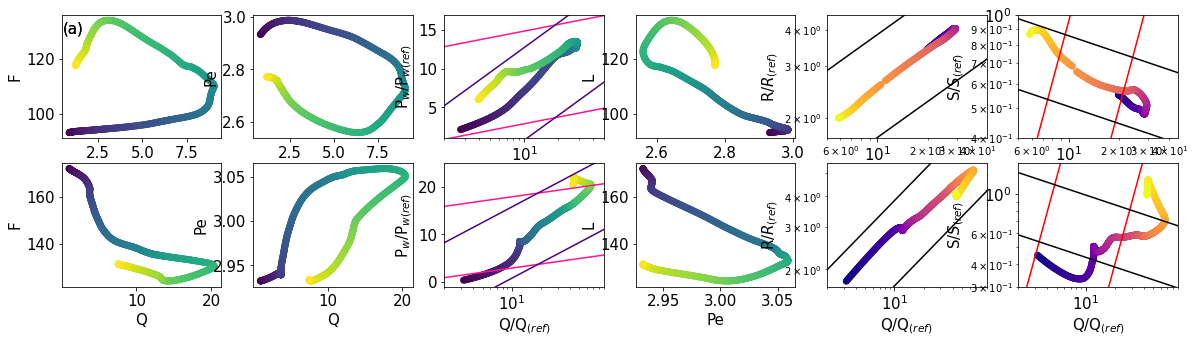

In [58]:
%matplotlib inline
fig, axs = plt.subplots(2, 6, figsize=(20,5))

axs[0][0].text(0.005, 0.85, '(a)', 
            color='k', 
            fontsize=15, 
            transform=axs[0][0].transAxes)

axs[0][0].scatter(df_filter_season_Q_L_melt21['Runoff'], df_filter_season_Q_L_melt21['L'], c=range(df_filter_season_Q_L_melt21.shape[0]), marker='o')
axs[0][0].set_xlabel('Q', fontsize=15)
axs[0][0].set_ylabel('F', fontsize=15)
axs[0][0].tick_params(labelsize=15)

axs[1][0].text(0.005, 0.85, '(a)', 
            color='k', 
            fontsize=15, 
            transform=axs[0][0].transAxes)

axs[1][0].scatter(df_filter_season_Q_L_melt22['Runoff'], df_filter_season_Q_L_melt22['L'], c=range(df_filter_season_Q_L_melt22.shape[0]), marker='o')
axs[1][0].set_xlabel('Q', fontsize=15)
axs[1][0].set_ylabel('F', fontsize=15)
axs[1][0].tick_params(labelsize=15)

axs[0][1].scatter(df_filter_season_Q_Pe_melt21['Runoff'], df_filter_season_Q_Pe_melt21['Pe'], c=range(df_filter_season_Q_Pe_melt21.shape[0]), marker='o')
axs[0][1].set_xlabel('Q', fontsize=15)
axs[0][1].set_ylabel('Pe', fontsize=15)
axs[0][1].tick_params(labelsize=15)

axs[1][1].scatter(df_filter_season_Q_Pe_melt22['Runoff'], df_filter_season_Q_Pe_melt22['Pe'], c=range(df_filter_season_Q_Pe_melt22.shape[0]), marker='o')
axs[1][1].set_xlabel('Q', fontsize=15)
axs[1][1].set_ylabel('Pe', fontsize=15)
axs[1][1].tick_params(labelsize=15)

#---------------------------------------------------------------------------------------------------------------------------------------


axs[0][2].scatter(df_filter_season_Q_P310_melt21['Runoff']/ref_Q, df_filter_season_Q_P310_melt21['P3_10']-P_ref_season, c=range(df_filter_season_Q_P310_melt21.shape[0]), marker='o')
axs[0][2].set_xlabel('Q', fontsize=15)
axs[0][2].set_ylabel('P$_w$/P$_{w(ref)}$', fontsize=15)
axs[0][2].set_xscale('log')
# axs[0][2].set_yscale('log')

axs[0][2].tick_params(labelsize=15)
axs[0][2].plot(curve_prop_P['Q'], curve_prop_P['P_5/4_Q'], 'deeppink')
# axs[0][2].plot(curve_prop_P['Q'], curve_prop_P['P_5/4_Q']-173, 'deeppink')
axs[0][2].plot(curve_prop_P['Q'], curve_prop_P['P_5/4_Q']+12, 'deeppink')


axs[0][2].plot(curve_prop_P['Q'], curve_prop_P['P_14/3_Q']-10, 'indigo')
# axs[0][2].plot(curve_prop_P['Q'], curve_prop_P['P_14/3_Q']-173, 'indigo')
axs[0][2].plot(curve_prop_P['Q'], curve_prop_P['P_14/3_Q']+2, 'indigo')
axs[0][2].set_ylim([1, 17])
axs[0][2].set_xlim([2, 50])

axs[1][2].scatter(df_filter_season_Q_P310_melt22['Runoff']/ref_Q, df_filter_season_Q_P310_melt22['P3_10']-P_ref_season, c=range(df_filter_season_Q_P310_melt22.shape[0]), marker='o')
axs[1][2].set_xlabel('Q/Q$_{(ref)}$', fontsize=15)
axs[1][2].set_ylabel('P$_w$/P$_{w(ref)}$', fontsize=15)
axs[1][2].set_xscale('log')
# axs[0][2].set_yscale('log')

axs[1][2].tick_params(labelsize=15)
axs[1][2].plot(curve_prop_P['Q'], curve_prop_P['P_5/4_Q'], 'deeppink')
# axs[0][2].plot(curve_prop_P['Q'], curve_prop_P['P_5/4_Q']-173, 'deeppink')
axs[1][2].plot(curve_prop_P['Q'], curve_prop_P['P_5/4_Q']+15, 'deeppink')


axs[1][2].plot(curve_prop_P['Q'], curve_prop_P['P_14/3_Q']-10, 'indigo')
# axs[0][2].plot(curve_prop_P['Q'], curve_prop_P['P_14/3_Q']-173, 'indigo')
axs[1][2].plot(curve_prop_P['Q'], curve_prop_P['P_14/3_Q']+5, 'indigo')
axs[1][2].set_ylim([-1, 25])
axs[1][2].set_xlim([2, 90])

#---------------------------------------------------------------------------------------------------------------------------------------

# axs[0][3].scatter(df_filter_season_Q_P3045_melt21['Runoff'], df_filter_season_Q_P3045_melt21['P30_45'], c=range(df_filter_season_Q_P3045_melt21.shape[0]), marker='o')
# axs[0][3].set_xlabel('Q', fontsize=15)
# axs[0][3].set_ylabel('P [30-45]', fontsize=15)
# axs[0][3].set_xscale('log')
# axs[0][3].tick_params(labelsize=15)


# axs[1][3].scatter(df_filter_season_Q_P3045_melt22['Runoff'], df_filter_season_Q_P3045_melt22['P30_45'], c=range(df_filter_season_Q_P3045_melt22.shape[0]), marker='o')
# axs[1][3].set_xlabel('Q', fontsize=15)
# axs[1][3].set_ylabel('P [30-45]', fontsize=15)
# axs[1][3].set_xscale('log')
# axs[1][3].tick_params(labelsize=15)

axs[0][3].scatter(df_filter_season_Pe_L_melt21['Pe'], df_filter_season_Pe_L_melt21['L'], c=range(df_filter_season_Pe_L_melt21.shape[0]), marker='o')
axs[0][3].set_xlabel('Pe', fontsize=15)
axs[0][3].set_ylabel('L', fontsize=15)
# axs[0][3].set_xscale('log')
axs[0][3].tick_params(labelsize=15)


axs[1][3].scatter(df_filter_season_Pe_L_melt22['Pe'], df_filter_season_Pe_L_melt22['L'], c=range(df_filter_season_Pe_L_melt22.shape[0]), marker='o')
axs[1][3].set_xlabel('Pe', fontsize=15)
axs[1][3].set_ylabel('L', fontsize=15)
# axs[1][3].set_xscale('log')
axs[1][3].tick_params(labelsize=15)


axs[0][4].scatter(df_filter_season_Q_R_melt21['Runoff']/ref_Q, df_filter_season_Q_R_melt21['R'], c=range(df_filter_season_Q_R_melt21.shape[0]), marker='o', cmap='plasma')
axs[0][4].set_xlabel('Q/Q$_{(ref)}$', fontsize=15)
axs[0][4].set_ylabel('R/$R_{(ref)}$', fontsize=15)
axs[0][4].set_xscale('log')
axs[0][4].set_yscale('log')
axs[0][4].set_ylim([1.7, 4.5])
axs[0][4].set_xlim([5, 45])
axs[0][4].plot(curve_prop_P['Q'], curve_prop_P['R_Q']*1.5, 'k')
axs[0][4].plot(curve_prop_P['Q'], curve_prop_P['R_Q']/1.5, 'k')
axs[0][4].tick_params(labelsize=15)


axs[1][4].scatter(df_filter_season_Q_R_melt22['Runoff']/ref_Q, df_filter_season_Q_R_melt22['R'], c=range(df_filter_season_Q_R_melt22.shape[0]), marker='o', cmap='plasma')
axs[1][4].set_xlabel('Q/Q$_{(ref)}$', fontsize=15)
axs[1][4].set_ylabel('R/$R_{(ref)}$', fontsize=15)
axs[1][4].set_xscale('log')
axs[1][4].set_yscale('log')
axs[1][4].set_ylim([1.7, 5.5])
axs[1][4].set_xlim([2, 90])
axs[1][4].plot(curve_prop_P['Q'], curve_prop_P['R_Q']*1.5, 'k')
axs[1][4].plot(curve_prop_P['Q'], curve_prop_P['R_Q']/1.5, 'k')
axs[1][4].tick_params(labelsize=15)

axs[0][5].scatter(df_filter_season_Q_S_melt21['Runoff']/ref_Q, df_filter_season_Q_S_melt21['S'], c=range(df_filter_season_Q_S_melt21.shape[0]), marker='o', cmap='plasma')
axs[0][5].set_xlabel('Q/Q$_{(ref)}$', fontsize=15)
axs[0][5].set_ylabel('S/$S_{(ref)}$', fontsize=15)
axs[0][5].tick_params(labelsize=15)
axs[0][5].set_xscale('log')
axs[0][5].set_yscale('log')
axs[0][5].plot(curve_prop_P['Q'], curve_prop_P['S_2_Q']/105, 'r')
axs[0][5].plot(curve_prop_P['Q'], curve_prop_P['S_2_Q']/800, 'r')
axs[0][5].plot(curve_prop_P['Q'], curve_prop_P['S_2/11_Q']/1.3, 'k')
axs[0][5].plot(curve_prop_P['Q'], curve_prop_P['S_2/11_Q']*1.3, 'k')
# axs[0][5].plot(curve_prop_P['Q'], curve_prop_P['S_2/11_Q']/1.7, 'k')
axs[0][5].set_xlim([5, 45])
axs[0][5].set_ylim([0.4, 1])
axs[0][5].tick_params(labelsize=15)

axs[1][5].scatter(df_filter_season_Q_S_melt22['Runoff']/ref_Q, df_filter_season_Q_S_melt22['S'], c=range(df_filter_season_Q_S_melt22.shape[0]), marker='o', cmap='plasma')
axs[1][5].set_xlabel('Q/Q$_{(ref)}$', fontsize=15)
axs[1][5].set_ylabel('S/$S_{(ref)}$', fontsize=15)
axs[1][5].tick_params(labelsize=15)
axs[1][5].set_xscale('log')
axs[1][5].set_yscale('log')
axs[1][5].plot(curve_prop_P['Q'], curve_prop_P['S_2_Q']/20, 'r')
axs[1][5].plot(curve_prop_P['Q'], curve_prop_P['S_2_Q']/1000, 'r')
# axs[1][5].plot(curve_prop_P['Q'], curve_prop_P['S_2/11_Q']*5, 'k')
axs[1][5].plot(curve_prop_P['Q'], curve_prop_P['S_2/11_Q']*1.5, 'k')
axs[1][5].plot(curve_prop_P['Q'], curve_prop_P['S_2/11_Q']/1.5, 'k')
axs[1][5].set_xlim([2, 90])
axs[1][5].set_ylim([0.3, 1.5])
axs[1][5].tick_params(labelsize=15)


# plt.subplots_adjust(0,0,,2)

plt.savefig(path_fig_export+'hysteresis_seasonal.svg', bbox_inches='tight')


In [59]:
df_filter_season_Q_S_melt22[50:80]

Runoff         S
TIMESTAMP                              
2022-05-31 06:00:00  2.452775  0.332365
2022-05-31 09:00:00  2.492039  0.331958
2022-05-31 12:00:00  2.531697  0.331623
2022-05-31 15:00:00  2.571802  0.331353
2022-05-31 18:00:00  2.612274  0.331151
2022-05-31 21:00:00  2.652963  0.331028
2022-06-01 00:00:00  2.693506  0.331011
2022-06-01 03:00:00  2.733409  0.331140
2022-06-01 06:00:00  2.772552  0.331422
2022-06-01 09:00:00  2.811175  0.331834
2022-06-01 12:00:00  2.849512  0.332351
2022-06-01 15:00:00  2.887304  0.332991
2022-06-01 18:00:00  2.923901  0.333798
2022-06-01 21:00:00  2.958886  0.334793
2022-06-02 00:00:00  2.991998  0.335979
2022-06-02 03:00:00  3.023202  0.337349
2022-06-02 06:00:00  3.052905  0.338872
2022-06-02 09:00:00  3.081706  0.340510
2022-06-02 12:00:00  3.110126  0.342224
2022-06-02 15:00:00  3.138503  0.343994
2022-06-02 18:00:00  3.166770  0.345823
2022-06-02 21:00:00  3.194359  0.347758
2022-06-03 00:00:00  3.220740  0.349844
2022-06-03 03:00:00  3.245836  0.352089
2022-06-03 06:00:00  3.269998  0.354470
2022-06-03 09:00:00  3.293742  0.356952
2022-06-03 12:00:00  3.317474  0.359498
2022-06-03 15:00:00  3.341375  0.362075
2022-06-03 18:00:00  3.365132  0.364688
2022-06-03 21:00:00  3.387988  0.367378

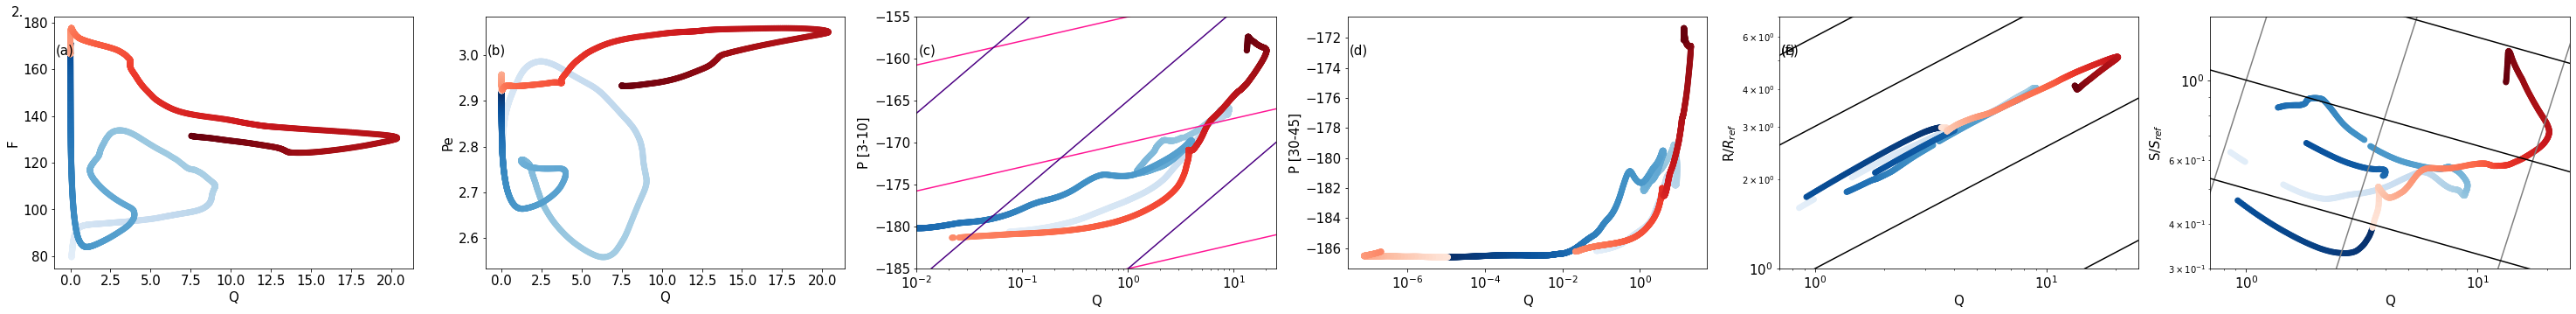

In [60]:
fig, axs = plt.subplots(1, 6, figsize=(10,1))

axs[0].text(-0.12, 1, '2.', 
            color='k', 
            fontsize=15, 
            transform=axs[0].transAxes)

axs[0].text(0.005, 0.85, '(a)', 
            color='k', 
            fontsize=15, 
            transform=axs[0].transAxes)

axs[1].text(0.005, 0.85, '(b)', 
            color='k', 
            fontsize=15, 
            transform=axs[1].transAxes)

axs[2].text(0.005, 0.85, '(c)', 
            color='k', 
            fontsize=15, 
            transform=axs[2].transAxes)

axs[3].text(0.005, 0.85, '(d)', 
            color='k', 
            fontsize=15, 
            transform=axs[3].transAxes)

axs[4].text(0.005, 0.85, '(e)', 
            color='k', 
            fontsize=15, 
            transform=axs[4].transAxes)


axs[5].text(0.005, 0.85, '(f)', 
            color='k', 
            fontsize=15, 
            transform=axs[4].transAxes)

axs[0].scatter(df_filter_season_Q_L['Runoff'], df_filter_season_Q_L['L'], c=range(df_filter_season_Q_L.shape[0]), marker='o', cmap=mymap)
axs[0].set_xlabel('Q', fontsize=15)
axs[0].set_ylabel('F', fontsize=15)
axs[0].tick_params(labelsize=15)


axs[1].scatter(df_filter_season_Q_Pe['Runoff'], df_filter_season_Q_Pe['Pe'], c=range(df_filter_season_Q_Pe.shape[0]), marker='o', cmap=mymap)
axs[1].set_xlabel('Q', fontsize=15)
axs[1].set_ylabel('Pe', fontsize=15)
axs[1].tick_params(labelsize=15)


axs[2].scatter(df_filter_season_Q_P310['Runoff'], df_filter_season_Q_P310['P3_10'], c=range(df_filter_season_Q_P310.shape[0]), marker='o', cmap=mymap_P310)
axs[2].set_xlabel('Q', fontsize=15)
axs[2].set_ylabel('P [3-10]', fontsize=15)
axs[2].set_xscale('log')
# axs[2].set_yscale('log')


axs[2].tick_params(labelsize=15)
# 'maroon', 'darkgreen', 'orange', 'darkgoldenrod', 'indigo', 'deeppink', 'b'

# axs[2].plot(curve_prop_P['Q'], curve_prop_P['P_5/4_Q']-145, 'grey')
axs[2].plot(curve_prop_P['Q'], curve_prop_P['P_5/4_Q']-185, 'deeppink')
axs[2].plot(curve_prop_P['Q'], curve_prop_P['P_5/4_Q']-170, 'deeppink')
# axs[2].plot(curve_prop_P['Q'], curve_prop_P['P_5/4_Q']-160, 'grey')
axs[2].plot(curve_prop_P['Q'], curve_prop_P['P_5/4_Q']-155, 'deeppink')
# axs[2].plot(curve_prop_P['Q'], curve_prop_P['P_5/4_Q']-150, 'grey')


axs[2].plot(curve_prop_P['Q'], curve_prop_P['P_14/3_Q']-185, 'indigo')
# axs[2].plot(curve_prop_P['Q'], curve_prop_P['P_14/3_Q']-160, 'r')
# axs[2].plot(curve_prop_P['Q'], curve_prop_P['P_14/3_Q']-170, 'k')
axs[2].plot(curve_prop_P['Q'], curve_prop_P['P_14/3_Q']-165, 'indigo')
# axs[2].plot(curve_prop_P['Q'], curve_prop_P['P_14/3_Q']-155, 'k',alpha=0.5)
axs[2].plot(curve_prop_P['Q'], curve_prop_P['P_14/3_Q']-145, 'indigo')

axs[2].set_ylim([-185, -155])
axs[2].set_xlim([0.01, 25])

axs[3].scatter(df_filter_season_Q_P3045['Runoff'], df_filter_season_Q_P3045['P30_45'], c=range(df_filter_season_Q_P3045.shape[0]), marker='o', cmap=mymap_P310)
axs[3].set_xlabel('Q', fontsize=15)
axs[3].set_ylabel('P [30-45]', fontsize=15)
axs[3].set_xscale('log')
axs[3].tick_params(labelsize=15)



# axs[3].scatter(df_filter_season_Q_P3045['Runoff'], df_filter_season_Q_P3045['P30_45'], c=range(df_filter_season_Q_P3045.shape[0]), marker='o', cmap=mymap_P310)
# axs[3].set_xlabel('Q')
# axs[3].set_ylabel('P [30-45]')
axs[4].scatter(df_filter_season_Q_R['Runoff'], df_filter_season_Q_R['R'], c=range(df_filter_season_Q_R.shape[0]), marker='o', cmap=mymap_P310)
axs[4].set_xlabel('Q', fontsize=15)
axs[4].set_ylabel('R/$R_{ref}$', fontsize=15)
axs[4].set_xscale('log')
axs[4].set_yscale('log')
axs[4].set_ylim([1, 7])
axs[4].set_xlim([0.7, 25])

# axs[3].plot(curve_prop_P['Q'], curve_prop_P['R_Q']+3, 'k')
axs[4].plot(curve_prop_P['Q'], curve_prop_P['R_Q']*3, 'k')
axs[4].plot(curve_prop_P['Q'], curve_prop_P['R_Q']*6, 'k')
axs[4].plot(curve_prop_P['Q'], curve_prop_P['R_Q']/3, 'k')
axs[4].plot(curve_prop_P['Q'], curve_prop_P['R_Q'], 'k')
# axs[3].plot(curve_prop_P['Q'], curve_prop_P['R_Q']+6, 'k')



# axs[3].plot(curve_prop_P['Q'], curve_prop_P['R_Q']+np.log(5), 'k')


axs[4].tick_params(labelsize=15)


axs[5].scatter(df_filter_season_Q_S['Runoff'], df_filter_season_Q_S['S'], c=range(df_filter_season_Q_S.shape[0]), marker='o', cmap=mymap_P310)
axs[5].set_xlabel('Q', fontsize=15)
axs[5].set_ylabel('S/$S_{ref}$', fontsize=15)
axs[5].tick_params(labelsize=15)
axs[5].set_xscale('log')
axs[5].set_yscale('log')
axs[5].plot(curve_prop_P['Q'], curve_prop_P['S_2_Q']/1, 'grey')
# as[4].plot(curve_prop_P['Q'], curve_prop_P['S_2_Q'], 'g')
axs[5].plot(curve_prop_P['Q'], curve_prop_P['S_2_Q']/20, 'grey')
axs[5].plot(curve_prop_P['Q'], curve_prop_P['S_2_Q']/500, 'grey')



axs[5].plot(curve_prop_P['Q'], curve_prop_P['S_2/11_Q']*2, 'k')
axs[5].plot(curve_prop_P['Q'], curve_prop_P['S_2/11_Q'], 'k')
axs[5].plot(curve_prop_P['Q'], curve_prop_P['S_2/11_Q']/2, 'k')



axs[5].set_xlim([0.7, 25])
axs[5].set_ylim([0.3, 1.5])
axs[5].tick_params(labelsize=15)

# 


# plt.tight_layout()
plt.subplots_adjust(0,0,4,4)
plt.savefig(path_fig_export+'hysteresis_seasonal.pdf', bbox_inches='tight')


In [61]:
df_filter_season_Runoff.loc[df_data['TIMESTAMP']=='2022-06-05 00:00:00']

TIMESTAMP    Runoff
2841 2022-06-05  3.538232

In [62]:
df_filter_season_Runoff.loc[df_data['TIMESTAMP']=='2022-08-18 00:00:00']

TIMESTAMP    Runoff
3433 2022-08-18  7.512824

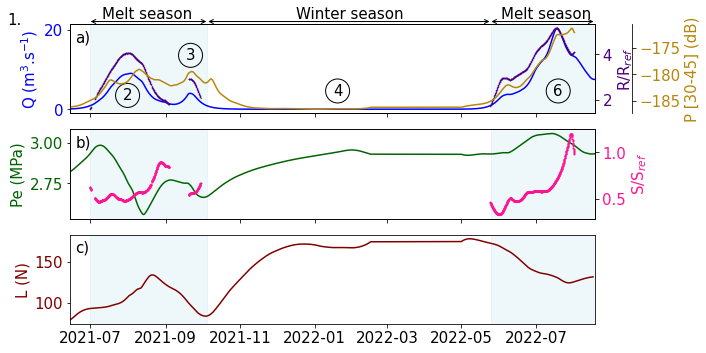

In [63]:
color = ['maroon', 'darkgreen', 'orange', 'darkgoldenrod', 'indigo', 'deeppink', 'b',]
label = ['L (N)', 'Pe (MPa)', 'P [3-10] (dB)', 'P [30-45 Hz] (dB)', 'R/R$_{ref}$', 'S/S$_{ref}$', 'Q (m$^3$.s$^{-1}$)']

fig, axs = plt.subplots(3, 1, figsize=(10, 5), sharex=True)

# for i in np.arange(2, df_data.shape[1]):
#     idx = np.isfinite(df_data[df_data.columns[i]])
#     data = globals()['filterbandpass_%s_seasonal'%df_data.columns[i]]+globals()['fit_%s'%df_data.columns[i]]
#     globals()[f'df_filter_season_{df_data.columns[i]}']=pd.DataFrame({'TIMESTAMP':df_data['TIMESTAMP'][idx], 
#                                                                       str(df_data.columns[i]):data/data.max()})
#     globals()[f'df_filter_season_{df_data.columns[i]}'].to_csv(path_df_export+f'seasonal_band_pass/df_filter_season_norm_{df_data.columns[i]}.csv')

axs[0].plot(df_filter_season_Runoff['TIMESTAMP'], filterbandpass_Runoff_seasonal, 'b')
ax2=axs[0].twinx()
ax2.scatter(df_filter_season_R['TIMESTAMP'], df_filter_season_R['R'], color='indigo', marker='o', s=0.1)
ax2.set_ylabel('R/R$_{ref}$', color='indigo', fontsize=15)
ax2.tick_params(axis='y', labelcolor='indigo',labelsize=15)

axs[0].set_ylabel('Q (m$^3$.s$^{-1}$)', color='b', fontsize=15)
axs[0].tick_params(axis='y', labelcolor='b', labelsize=15)

axs[0].axvspan(df_filter_season_Runoff['TIMESTAMP'][128], df_filter_season_Runoff['TIMESTAMP'][896], alpha=0.2, color='lightblue')
# axs[0].axvspan(df_filter_season_Runoff['TIMESTAMP'][720], df_filter_season_Runoff['TIMESTAMP'][872], alpha=0.2, color='lightblue')
axs[0].axvspan(df_filter_season_Runoff['TIMESTAMP'][2753], df_filter_season_Runoff['TIMESTAMP'][3433], alpha=0.2, color='lightblue')
# axs[0].axvspan(df_filter_season_Runoff['TIMESTAMP'][3105], df_filter_season_Runoff['TIMESTAMP'][3273], alpha=0.2, color='lightblue')

axs[0].annotate('', xy=(0.035, 1.03), va='center',
                ha='center', xytext=(0.263, 1.03), xycoords='axes fraction', horizontalalignment="center", 
                arrowprops=dict(arrowstyle="<->", color='k'))
axs[0].annotate('', xy=(0.259, 1.03), va='center',
                ha='center', xytext=(0.802, 1.03), xycoords='axes fraction', horizontalalignment="center", 
                arrowprops=dict(arrowstyle="<->", color='k'))

axs[0].annotate('', xy=(0.798, 1.03), va='center',
                ha='center', xytext=(1, 1.03), xycoords='axes fraction', horizontalalignment="center", 
                arrowprops=dict(arrowstyle="<->", color='k'))
axs[0].text(0.06, 1.06, 'Melt season', color='k', fontsize=15, transform=axs[0].transAxes)
axs[0].text(0.82, 1.06, 'Melt season', color='k', fontsize=15, transform=axs[0].transAxes)
axs[0].text(0.43, 1.06, 'Winter season', color='k', fontsize=15, transform=axs[0].transAxes)
axs[0].text(0.01, 0.8, 'a)', color='k', fontsize=15, transform=axs[0].transAxes)
axs[0].text(-0.12, 1, '1.', 
            color='k', 
            fontsize=15, 
            transform=axs[0].transAxes)


ax3=axs[0].twinx()
ax3.spines['right'].set_position(("axes", 1.07))
ax3.plot(df_filter_season_P3_10['TIMESTAMP'], filterbandpass_P30_45_seasonal, 'darkgoldenrod')
ax3.set_ylabel('P [30-45] (dB)', color='darkgoldenrod', fontsize=15)
ax3.tick_params(axis='y', labelcolor='darkgoldenrod', labelsize=15)
axs[0].margins(x=0)

axs[0].text(0.10, 0.15, '2', color='k', fontsize=15, transform=axs[0].transAxes, bbox = dict(boxstyle="circle", facecolor='none', edgecolor='k'))
axs[0].text(0.22, 0.6, '3', color='k', fontsize=15, transform=axs[0].transAxes, bbox = dict(boxstyle="circle", facecolor='none', edgecolor='k'))
axs[0].text(0.5, 0.2, '4', color='k', fontsize=15, transform=axs[0].transAxes, bbox = dict(boxstyle="circle", facecolor='none', edgecolor='k'))
axs[0].text(0.92, 0.2, '6', color='k', fontsize=15, transform=axs[0].transAxes, bbox = dict(boxstyle="circle", facecolor='none', edgecolor='k'))


# axs[1].plot(df_filter_season_P3_10['TIMESTAMP'], filterbandpass_P30_45_seasonal, 'orange')
# # ax1=axs[1].twinx()
# # ax1.plot(df_filter_season_P30_45['TIMESTAMP'], filterbandpass_P30_45_seasonal, 'darkgoldenrod')

# axs[1].set_ylabel('P [30-45] (dB)', color='orange')
# axs[1].tick_params(axis='y', labelcolor='orange')
# ax1.set_ylabel('P [30-45] (dB)', color='darkgoldenrod')
# ax1.tick_params(axis='y', labelcolor='darkgoldenrod')


axs[1].axvspan(df_filter_season_Runoff['TIMESTAMP'][128], df_filter_season_Runoff['TIMESTAMP'][896], alpha=0.2, color='lightblue')
# axs[1].axvspan(df_filter_season_Runoff['TIMESTAMP'][720], df_filter_season_Runoff['TIMESTAMP'][872], alpha=0.2, color='lightblue')
axs[1].axvspan(df_filter_season_Runoff['TIMESTAMP'][2753], df_filter_season_Runoff['TIMESTAMP'][3433], alpha=0.2, color='lightblue')
# axs[1].axvspan(df_filter_season_Runoff['TIMESTAMP'][3105], df_filter_season_Runoff['TIMESTAMP'][3273], alpha=0.2, color='lightblue')
axs[1].margins(x=0)

axs[1].plot(df_filter_season_Pe['TIMESTAMP'], filterbandpass_Pe_seasonal, 'darkgreen')
axs[1].set_ylabel('Pe (MPa)', color='darkgreen', fontsize=15)
axs[1].tick_params(axis='y', labelcolor='darkgreen', labelsize=15)
axs[1].margins(x=0)
axs[1].text(0.01, 0.8, 'b)', color='k', fontsize=15, transform=axs[1].transAxes)


ax3=axs[1].twinx()
ax3.scatter(df_filter_season_S['TIMESTAMP'], df_filter_season_S['S'], color='deeppink', marker='o', s=1)
ax3.set_ylabel('S/S$_{ref}$', color='deeppink', fontsize=15)
ax3.tick_params(axis='y', labelcolor='deeppink', labelsize=15)
# ax2.set_ylabel('R/R$_{ref}$', color='indigo')
# ax2.tick_params(axis='y', labelcolor='indigo')

axs[2].plot(df_filter_season_L['TIMESTAMP'], filterbandpass_L_seasonal, 'maroon')
# ax3=axs[3].twinx()
# ax2.plot(df_filter_season_S['TIMESTAMP'], df_filter_season_S['S'], 'deeppink')
# ax2.set_ylabel('S/S$_{ref}$', color='deeppink')
# ax2.tick_params(axis='y', labelcolor='deeppink')



axs[2].set_ylabel('L (N)', color='maroon', fontsize=15)
axs[2].tick_params(axis='y', labelcolor='maroon', labelsize=15)
axs[2].tick_params(axis='x', labelsize=15)

# ax3.set_ylabel('S/S$_{ref}$', color='deeppink')
# ax3.tick_params(axis='y', labelcolor='deeppink')

axs[2].axvspan(df_filter_season_Runoff['TIMESTAMP'][128], df_filter_season_Runoff['TIMESTAMP'][896], alpha=0.2, color='lightblue')
# axs[2].axvspan(df_filter_season_Runoff['TIMESTAMP'][720], df_filter_season_Runoff['TIMESTAMP'][872], alpha=0.2, color='lightblue')
axs[2].axvspan(df_filter_season_Runoff['TIMESTAMP'][2753], df_filter_season_Runoff['TIMESTAMP'][3433], alpha=0.2, color='lightblue')
# axs[3].axvspan(df_filter_season_Runoff['TIMESTAMP'][3105], df_filter_season_Runoff['TIMESTAMP'][3273], alpha=0.2, color='lightblue')
axs[2].margins(x=0)
axs[2].text(0.01, 0.8, 'c)', color='k', fontsize=15, transform=axs[2].transAxes)


plt.tight_layout()

plt.savefig(path_fig_export+'bandpass_seasonal_analysis.pdf', bbox_inches='tight')
# globals()[f'df_filter_season_{df_data.columns[i]}'].to_csv(path_df_export+'seasonal_band_pass/df_filter_season_norm.csv')

In [64]:
filterbandpass_Pe_seasonal[1800:2558]

array([2.95346617, 2.95362483, 2.95378148, 2.95393618, 2.95408896,
       2.95423979, 2.9543885 , 2.95453483, 2.95467849, 2.95481926,
       2.95495691, 2.95509118, 2.95522187, 2.95534897, 2.95547255,
       2.95559272, 2.95570957, 2.95582315, 2.95593348, 2.95604061,
       2.95614473, 2.95624605, 2.95634443, 2.95643926, 2.95652975,
       2.95661524, 2.95669529, 2.95676968, 2.95683833, 2.95690134,
       2.95695882, 2.95701096, 2.95705797, 2.9571    , 2.95713719,
       2.95716963, 2.95719744, 2.95722076, 2.95723969, 2.95725438,
       2.95726498, 2.95727162, 2.95727443, 2.95727351, 2.95726891,
       2.95726063, 2.95724858, 2.9572326 , 2.95721246, 2.95718802,
       2.9571592 , 2.95712596, 2.95708824, 2.95704583, 2.9569984 ,
       2.95694555, 2.95688675, 2.95682137, 2.95674894, 2.95666925,
       2.95658171, 2.95648491, 2.956378  , 2.95626143, 2.95613636,
       2.95600413, 2.95586625, 2.95572423, 2.9555792 , 2.95543224,
       2.95528491, 2.95513822, 2.95499248, 2.95484864, 2.95470

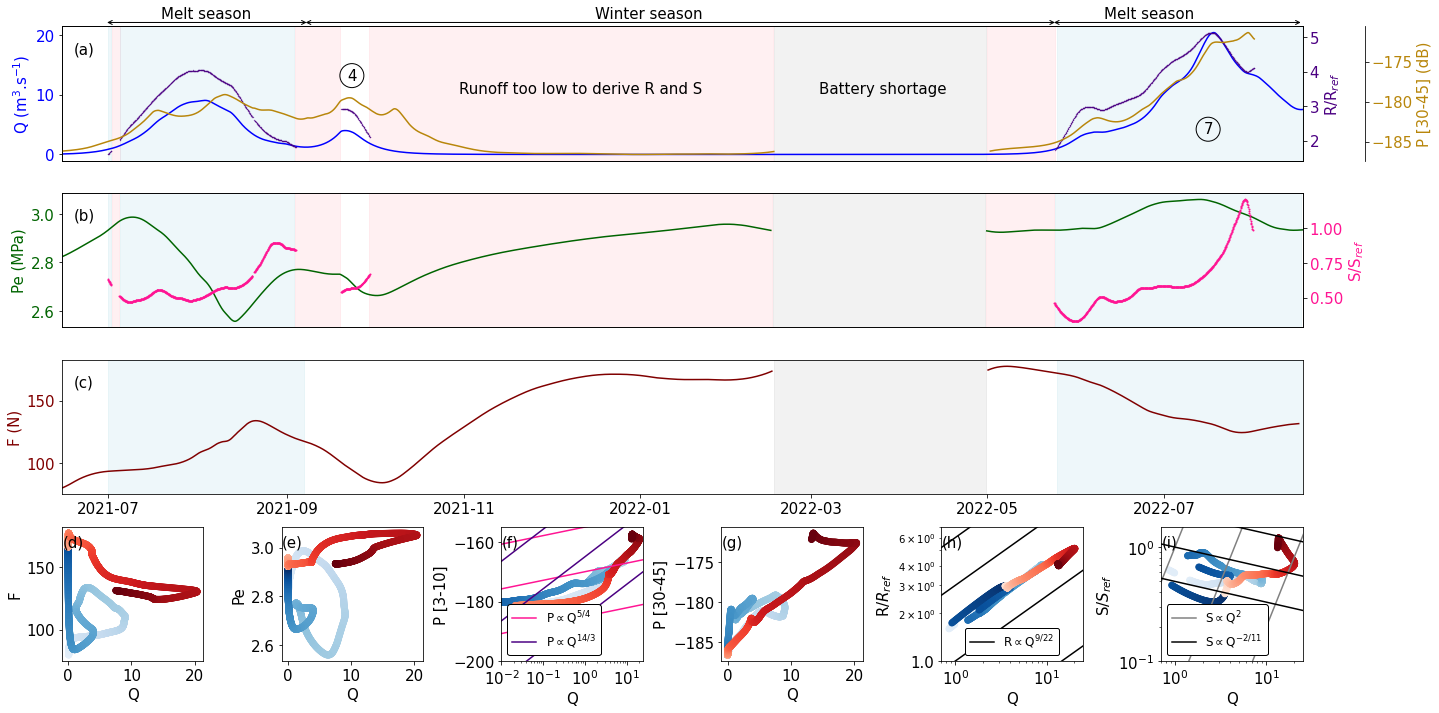

In [65]:
fig = plt.figure(figsize=(20,10))

# plt.subplots_adjust(wspace= 0.25, hspace= 0.25)

# Create second axes, the top-left plot with orange plot
sub1 = fig.add_subplot(4, 6,(1,6)) # two rows, two columns, second cell
# plt.annotate('sub2', xy = (0.5, 0.5), va = 'center', ha = 'center',  weight='bold', fontsize = 15)
sub1.plot(df_filter_season_Runoff['TIMESTAMP'], filterbandpass_Runoff_seasonal, 'b')
ax2=sub1.twinx()
ax2.scatter(df_filter_season_R['TIMESTAMP'], df_filter_season_R['R'], color='indigo', marker='o', s=0.1)
ax2.set_ylabel('R/R$_{ref}$', color='indigo', fontsize=15)
ax2.tick_params(axis='y', labelcolor='indigo',labelsize=15)

sub1.set_ylabel('Q (m$^3$.s$^{-1}$)', color='b', fontsize=15)
sub1.tick_params(axis='y', labelcolor='b', labelsize=15)

sub1.axvspan(df_filter_season_Runoff['TIMESTAMP'][138], df_filter_season_Runoff['TIMESTAMP'][160], color='lightpink', alpha=0.2)
sub1.axvspan(df_filter_season_Runoff['TIMESTAMP'][645], df_filter_season_Runoff['TIMESTAMP'][770], color='lightpink', alpha=0.2)
sub1.axvspan(df_filter_season_Runoff['TIMESTAMP'][850], df_filter_season_Runoff['TIMESTAMP'][1968], color='lightpink', alpha=0.2)
sub1.axvspan(df_filter_season_Runoff['TIMESTAMP'][2560], df_filter_season_Runoff['TIMESTAMP'][2750], color='lightpink', alpha=0.2)
sub1.axvspan(df_filter_season_Runoff['TIMESTAMP'][128], df_filter_season_Runoff['TIMESTAMP'][136], alpha=0.2, color='lightblue')
sub1.axvspan(df_filter_season_Runoff['TIMESTAMP'][162], df_filter_season_Runoff['TIMESTAMP'][643], alpha=0.2, color='lightblue')
sub1.axvspan(df_filter_season_Runoff['TIMESTAMP'][2753], df_filter_season_Runoff['TIMESTAMP'][3433], alpha=0.2, color='lightblue')
sub1.axvspan(df_filter_season_Runoff['TIMESTAMP'][1971], df_filter_season_Runoff['TIMESTAMP'][2558], alpha=0.1, color='grey')


sub1.annotate('', xy=(0.035, 1.03), va='center',
                ha='center', xytext=(0.199, 1.03), xycoords='axes fraction', horizontalalignment="center", 
                arrowprops=dict(arrowstyle="<->", color='k'))
sub1.annotate('', xy=(0.195, 1.03), va='center',
                ha='center', xytext=(0.802, 1.03), xycoords='axes fraction', horizontalalignment="center", 
                arrowprops=dict(arrowstyle="<->", color='k'))

sub1.annotate('', xy=(0.798, 1.03), va='center',
                ha='center', xytext=(1, 1.03), xycoords='axes fraction', horizontalalignment="center", 
                arrowprops=dict(arrowstyle="<->", color='k'))
sub1.text(0.08, 1.06, 'Melt season', color='k', fontsize=15, transform=sub1.transAxes)
sub1.text(0.84, 1.06, 'Melt season', color='k', fontsize=15, transform=sub1.transAxes)
sub1.text(0.43, 1.06, 'Winter season', color='k', fontsize=15, transform=sub1.transAxes)
sub1.text(0.01, 0.8, '(a)', color='k', fontsize=15, transform=sub1.transAxes)
sub1.text(0.32, 0.5, 'Runoff too low to derive R and S', color='k', fontsize=15, transform=sub1.transAxes)
sub1.text(0.61, 0.5, 'Battery shortage', color='k', fontsize=15, transform=sub1.transAxes)


# sub1.text(-0.02, 1, '1.', 
#             color='k', 
#             fontsize=15, 
#             transform=sub1.transAxes)


ax3=sub1.twinx()
ax3.spines['right'].set_position(("axes", 1.05))
ax3.plot(df_filter_season_P3_10['TIMESTAMP'][:1965], filterbandpass_P30_45_seasonal[:1965], 'darkgoldenrod')
ax3.plot(df_filter_season_P3_10['TIMESTAMP'][1971:], filterbandpass_P30_45_seasonal[1971:], 'darkgoldenrod')
ax3.set_ylabel('P [30-45] (dB)', color='darkgoldenrod', fontsize=15)
ax3.tick_params(axis='y', labelcolor='darkgoldenrod', labelsize=15)
sub1.margins(x=0)


# sub1.text(0.10, 0.15, '2', color='k', fontsize=15, transform=sub1.transAxes, bbox = dict(boxstyle="circle", facecolor='none', edgecolor='k'))
sub1.text(0.23, 0.6, '4', color='k', fontsize=15, transform=sub1.transAxes, bbox = dict(boxstyle="circle", facecolor='none', edgecolor='k'))
# sub1.text(0.5, 0.2, '4', color='k', fontsize=15, transform=sub1.transAxes, bbox = dict(boxstyle="circle", facecolor='none', edgecolor='k'))
sub1.text(0.92, 0.2, '7', color='k', fontsize=15, transform=sub1.transAxes, bbox = dict(boxstyle="circle", facecolor='none', edgecolor='k'))
sub1.axes.get_xaxis().set_ticks([])

#--------------------------------------------------------------------------------------------------------------------------------*---------

# Create second axes, the top-left plot with orange plot
sub2 = fig.add_subplot(4, 6,(7,12)) # two rows, two columns, second cell
sub2.axvspan(df_filter_season_Runoff['TIMESTAMP'][128], df_filter_season_Runoff['TIMESTAMP'][136], alpha=0.2, color='lightblue')
sub2.axvspan(df_filter_season_Runoff['TIMESTAMP'][162], df_filter_season_Runoff['TIMESTAMP'][643], alpha=0.2, color='lightblue')
# axs[1].axvspan(df_filter_season_Runoff['TIMESTAMP'][720], df_filter_season_Runoff['TIMESTAMP'][872], alpha=0.2, color='lightblue')
sub2.axvspan(df_filter_season_Runoff['TIMESTAMP'][2753], df_filter_season_Runoff['TIMESTAMP'][3433], alpha=0.2, color='lightblue')
# axs[1].axvspan(df_filter_season_Runoff['TIMESTAMP'][3105], df_filter_season_Runoff['TIMESTAMP'][3273], alpha=0.2, color='lightblue')
sub2.margins(x=0)

sub2.plot(df_filter_season_Pe['TIMESTAMP'][:1965], filterbandpass_Pe_seasonal[:1965], 'darkgreen')
sub2.plot(df_filter_season_Pe['TIMESTAMP'][1971:], filterbandpass_Pe_seasonal[1971:], 'darkgreen')
sub2.set_ylabel('Pe (MPa)', color='darkgreen', fontsize=15)
sub2.tick_params(axis='y', labelcolor='darkgreen', labelsize=15)
sub2.margins(x=0)
sub2.text(0.01, 0.8, '(b)', color='k', fontsize=15, transform=sub2.transAxes)
sub2.axvspan(df_filter_season_Runoff['TIMESTAMP'][1971], df_filter_season_Runoff['TIMESTAMP'][2558], alpha=0.1, color='grey')

sub2.axvspan(df_filter_season_Runoff['TIMESTAMP'][138], df_filter_season_Runoff['TIMESTAMP'][160], color='lightpink', alpha=0.2)
sub2.axvspan(df_filter_season_Runoff['TIMESTAMP'][645], df_filter_season_Runoff['TIMESTAMP'][770], color='lightpink', alpha=0.2)
sub2.axvspan(df_filter_season_Runoff['TIMESTAMP'][850], df_filter_season_Runoff['TIMESTAMP'][1968], color='lightpink', alpha=0.2)
sub2.axvspan(df_filter_season_Runoff['TIMESTAMP'][2560], df_filter_season_Runoff['TIMESTAMP'][2750], color='lightpink', alpha=0.2)


ax3=sub2.twinx()
ax3.scatter(df_filter_season_S['TIMESTAMP'], df_filter_season_S['S'], color='deeppink', marker='o', s=1)
ax3.set_ylabel('S/S$_{ref}$', color='deeppink', fontsize=15)
ax3.tick_params(axis='y', labelcolor='deeppink', labelsize=15)

sub2.axes.get_xaxis().set_ticks([])


#--------------------------------------------------------------------------------------------------------------------------------------
# Create second axes, the top-left plot with orange plot
sub3 = fig.add_subplot(4, 6,(13,18)) # two rows, two columns, second cell
sub3.plot(df_filter_season_L['TIMESTAMP'][:1965], filterbandpass_L_seasonal[:1965], 'maroon')
sub3.plot(df_filter_season_L['TIMESTAMP'][1971:], filterbandpass_L_seasonal[1971:], 'maroon')
# ax3=axs[3].twinx()
# ax2.plot(df_filter_season_S['TIMESTAMP'], df_filter_season_S['S'], 'deeppink')
# ax2.set_ylabel('S/S$_{ref}$', color='deeppink')
# ax2.tick_params(axis='y', labelcolor='deeppink')



sub3.set_ylabel('F (N)', color='maroon', fontsize=15)
sub3.tick_params(axis='y', labelcolor='maroon', labelsize=15)
sub3.tick_params(axis='x', labelsize=15)

# ax3.set_ylabel('S/S$_{ref}$', color='deeppink')
# ax3.tick_params(axis='y', labelcolor='deeppink')

sub3.axvspan(df_filter_season_Runoff['TIMESTAMP'][128], df_filter_season_Runoff['TIMESTAMP'][670], alpha=0.2, color='lightblue')
# axs[2].axvspan(df_filter_season_Runoff['TIMESTAMP'][720], df_filter_season_Runoff['TIMESTAMP'][872], alpha=0.2, color='lightblue')
sub3.axvspan(df_filter_season_Runoff['TIMESTAMP'][2753], df_filter_season_Runoff['TIMESTAMP'][3433], alpha=0.2, color='lightblue')
sub3.axvspan(df_filter_season_Runoff['TIMESTAMP'][1971], df_filter_season_Runoff['TIMESTAMP'][2558], alpha=0.1, color='grey')

# axs[3].axvspan(df_filter_season_Runoff['TIMESTAMP'][3105], df_filter_season_Runoff['TIMESTAMP'][3273], alpha=0.2, color='lightblue')
sub3.margins(x=0)
sub3.text(0.01, 0.8, '(c)', color='k', fontsize=15, transform=sub3.transAxes)

#-----------------------------------------------------------------------------------------------------------------------------------
sub4 = fig.add_subplot(4, 6,19) # two rows, two columns, fist cell

# sub4.text(-0.15, 1, '2.', 
#             color='k', 
#             fontsize=15, 
#             transform=sub4.transAxes)

sub4.text(0.005, 0.85, '(d)', 
            color='k', 
            fontsize=15, 
            transform=sub4.transAxes)


sub4.scatter(df_filter_season_Q_L['Runoff'], df_filter_season_Q_L['L'], c=range(df_filter_season_Q_L.shape[0]), marker='o', cmap=mymap)
sub4.set_xlabel('Q', fontsize=15)
sub4.set_ylabel('F', fontsize=15)
sub4.tick_params(labelsize=15)

sub5 = fig.add_subplot(4, 6,20) # two rows, two columns, second cell


sub5.scatter(df_filter_season_Q_Pe['Runoff'], df_filter_season_Q_Pe['Pe'], c=range(df_filter_season_Q_Pe.shape[0]), marker='o', cmap=mymap)
sub5.set_xlabel('Q', fontsize=15)
sub5.set_ylabel('Pe', fontsize=15)
sub5.tick_params(labelsize=15)

sub6 = fig.add_subplot(4, 6,21) # two rows, two columns, second cell

sub6.scatter(df_filter_season_Q_P310['Runoff'], df_filter_season_Q_P310['P3_10'], c=range(df_filter_season_Q_P310.shape[0]), marker='o', cmap=mymap_P310)
sub6.set_xlabel('Q', fontsize=15)
sub6.set_ylabel('P [3-10]', fontsize=15)
sub6.tick_params(labelsize=15)
sub6.set_xscale('log')
sub6.plot(curve_prop_P['Q'], curve_prop_P['P_5/4_Q']-185, 'deeppink', label='P$\propto$Q$^{5/4}$')
sub6.plot(curve_prop_P['Q'], curve_prop_P['P_5/4_Q']-170, 'deeppink')
sub6.plot(curve_prop_P['Q'], curve_prop_P['P_5/4_Q']-155, 'deeppink')
sub6.plot(curve_prop_P['Q'], curve_prop_P['P_14/3_Q']-185, 'indigo',label='P$\propto$Q$^{14/3}$')
sub6.plot(curve_prop_P['Q'], curve_prop_P['P_14/3_Q']-165, 'indigo')
sub6.plot(curve_prop_P['Q'], curve_prop_P['P_14/3_Q']-145, 'indigo')
sub6.set_ylim([-200, -155])
sub6.set_xlim([0.01, 25])
sub6.legend(fontsize=12, facecolor="white", framealpha=1, edgecolor='k')

sub7 = fig.add_subplot(4, 6,22)

sub7.scatter(df_filter_season_Q_P3045['Runoff'], df_filter_season_Q_P3045['P30_45'], c=range(df_filter_season_Q_P3045.shape[0]), marker='o', cmap=mymap_P310)
sub7.set_xlabel('Q', fontsize=15)
sub7.set_ylabel('P [30-45]', fontsize=15)
sub7.tick_params(labelsize=15)


# axs[3].scatter(df_filter_season_Q_P3045['Runoff'], df_filter_season_Q_P3045['P30_45'], c=range(df_filter_season_Q_P3045.shape[0]), marker='o', cmap=mymap_P310)
# axs[3].set_xlabel('Q')
# axs[3].set_ylabel('P [30-45]')
sub8 = fig.add_subplot(4, 6, 23) 
sub8.scatter(df_filter_season_Q_R['Runoff'], df_filter_season_Q_R['R'], c=range(df_filter_season_Q_R.shape[0]), marker='o', cmap=mymap_P310)
sub8.set_xlabel('Q', fontsize=15)
sub8.set_ylabel('R/$R_{ref}$', fontsize=15)
sub8.tick_params(labelsize=15)
sub8.set_xscale('log')
sub8.set_yscale('log')
sub8.set_ylim([1, 7])
sub8.set_xlim([0.7, 25])
sub8.plot(curve_prop_P['Q'], curve_prop_P['R_Q']*3, 'k', label='R$\propto$Q$^{9/22}$')
sub8.plot(curve_prop_P['Q'], curve_prop_P['R_Q']*6, 'k')
sub8.plot(curve_prop_P['Q'], curve_prop_P['R_Q']/3, 'k')
sub8.plot(curve_prop_P['Q'], curve_prop_P['R_Q'], 'k')
sub8.legend(fontsize=12, facecolor="white", framealpha=1, edgecolor='k')
from matplotlib.ticker import ScalarFormatter
sub8.yaxis.set_major_formatter(ScalarFormatter())


sub9 = fig.add_subplot(4, 6, 24) # two rows, two columns, second cell
sub9.scatter(df_filter_season_Q_S['Runoff'], df_filter_season_Q_S['S'], c=range(df_filter_season_Q_S.shape[0]), marker='o', cmap=mymap_P310)
sub9.set_xlabel('Q', fontsize=15)
sub9.set_ylabel('S/$S_{ref}$', fontsize=15)
sub9.tick_params(labelsize=15)
sub9.set_xscale('log')
sub9.set_yscale('log')
sub9.plot(curve_prop_P['Q'], curve_prop_P['S_2_Q']/1, 'grey', label='S$\propto$Q$^{2}$')
sub9.plot(curve_prop_P['Q'], curve_prop_P['S_2_Q']/20, 'grey')
sub9.plot(curve_prop_P['Q'], curve_prop_P['S_2_Q']/500, 'grey')
sub9.plot(curve_prop_P['Q'], curve_prop_P['S_2/11_Q']*2, 'k', label='S$\propto$Q$^{-2/11}$')
sub9.plot(curve_prop_P['Q'], curve_prop_P['S_2/11_Q'], 'k')
sub9.plot(curve_prop_P['Q'], curve_prop_P['S_2/11_Q']/2, 'k')
sub9.set_xlim([0.7, 25])
sub9.set_ylim([0.1, 1.5])
sub9.legend(fontsize=12, facecolor="white", framealpha=1, edgecolor='k')

sub5.text(0.005, 0.85, '(e)', 
            color='k', 
            fontsize=15, 
            transform=sub5.transAxes)

sub6.text(0.005, 0.85, '(f)', 
            color='k', 
            fontsize=15, 
            transform=sub6.transAxes)

sub7.text(0.005, 0.85, '(g)', 
            color='k', 
            fontsize=15, 
            transform=sub7.transAxes)

sub8.text(0.005, 0.85, '(h)', 
            color='k', 
            fontsize=15, 
            transform=sub8.transAxes)



sub9.text(0.005, 0.85, '(i)', 
            color='k', 
            fontsize=15, 
            transform=sub9.transAxes)

plt.tight_layout()
plt.savefig(path_fig_export+'bandpass_seasonal_analysis_hysteresis.svg', bbox_inches='tight')

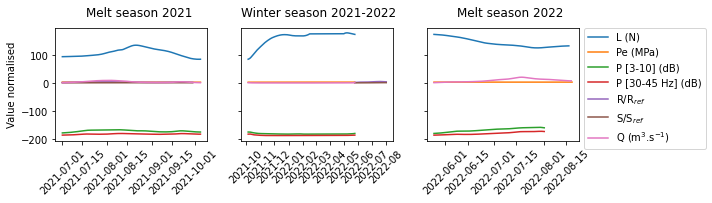

In [66]:
fig, axs = plt.subplots(1, 3, figsize=(10,3), sharey=True)
start = [128, 896, 2753]
end = [896, 2753, 3438]

for i in np.arange(2, df_data.shape[1]):
    idx1=[]
    idx2=[]
    idx3=[]
    
    for j in globals()[f'df_filter_season_{df_data.columns[i]}'].index:
        if (j>=128) & (j<=896):
            idx1.append(j)
    
        if (j>=896) & (j<=2753):
            idx2.append(j)

        if (j>=2753) & (j<=3438):
            idx3.append(j)
            
    axs[0].plot(globals()[f'df_filter_season_{df_data.columns[i]}']['TIMESTAMP'][idx1],
                globals()[f'df_filter_season_{df_data.columns[i]}'][df_data.columns[i]][idx1])
    axs[0].tick_params('x', rotation=45)
    axs[0].set_ylabel('Value normalised')

    axs[1].plot(globals()[f'df_filter_season_{df_data.columns[i]}']['TIMESTAMP'][idx2],
                globals()[f'df_filter_season_{df_data.columns[i]}'][df_data.columns[i]][idx2])
    axs[1].tick_params('x', rotation=45)

    axs[2].plot(globals()[f'df_filter_season_{df_data.columns[i]}']['TIMESTAMP'][idx3],
                globals()[f'df_filter_season_{df_data.columns[i]}'][df_data.columns[i]][idx3], label=label[i-2])
    axs[2].tick_params('x', rotation=45)
    axs[2].legend(bbox_to_anchor=(1, 1.04))

axs[0].text(0.2, 1.1, 'Melt season 2021', 
        color='k', 
        fontsize=12, 
        transform=axs[0].transAxes)
axs[1].text(0, 1.1, 'Winter season 2021-2022', 
        color='k', 
        fontsize=12, 
        transform=axs[1].transAxes)
axs[2].text(0.2, 1.1, 'Melt season 2022', 
        color='k', 
        fontsize=12, 
        transform=axs[2].transAxes)

plt.tight_layout()
plt.savefig(path_fig_export+'bandpass_seasonal_3season.pdf', bbox_inches='tight')

# Band pass filter of the data between 2 and 5 days

In [67]:
df_melt_2021

Time           TIMESTAMP          L        Pe       P3_10      P30_45  \
128   16.000 2021-07-01 00:00:00  95.343681  2.910845 -176.429602 -184.669361   
129   16.125 2021-07-01 03:00:00  95.327061  2.913258 -176.929432 -184.786684   
130   16.250 2021-07-01 06:00:00  95.255476  2.915607 -177.186138 -184.835858   
131   16.375 2021-07-01 09:00:00  95.201321  2.917524 -176.918924 -184.832795   
132   16.500 2021-07-01 12:00:00  95.146242  2.919731 -177.006568 -184.806039   
..       ...                 ...        ...       ...         ...         ...   
891  111.375 2021-10-04 09:00:00  72.668144  2.618755 -177.875939 -185.376275   
892  111.500 2021-10-04 12:00:00  72.848286  2.620269 -177.888632 -185.594885   
893  111.625 2021-10-04 15:00:00  72.622734  2.621790 -176.810488 -184.604488   
894  111.750 2021-10-04 18:00:00  72.511203  2.623406 -176.106772 -185.045972   
895  111.875 2021-10-04 21:00:00  72.865749  2.625247 -176.933639 -185.020343   

            R         S    Runoff  
128       NaN       NaN  0.449876  
129  2.780367  0.355130  0.821738  
130  3.746705  0.223936  1.682886  
131  4.296542  0.179636  1.770574  
132  4.080946  0.191817  1.233248  
..        ...       ...       ...  
891       NaN       NaN  0.173252  
892       NaN       NaN  0.157165  
893       NaN       NaN  0.154683  
894       NaN       NaN  0.158233  
895       NaN       NaN  0.151036  

[768 rows x 9 columns]

In [68]:
df = [df_melt_2021, df_melt_2022]
name = ['melt_2021', 'melt_2022']
for d in np.arange(0, len(df)):
    df_temp = df[d]

    for i in np.arange(2, df_temp.shape[1]):
        idx = np.isfinite(df_temp[df_temp.columns[i]])
        fit= np.polyfit(np.arange(df_temp.index[idx].shape[0]), df_temp[df_temp.columns[i]][idx], deg=1)
        function= np.poly1d(fit)
        globals()[f'fit_%s_{name[d]}'%df_temp.columns[i]]=function(df_temp.index[idx].shape[0])

In [69]:
b = signal.butter(3, [1/5, 1/2]/fs, 'band')[0]
a = signal.butter(3, [1/5, 1/2]/fs, 'band')[1]

In [70]:
df = [df_melt_2021, df_melt_2022]
name = ['melt_2021', 'melt_2022']
for d in np.arange(0, len(df)):
    df_temp = df[d]
    for i in np.arange(2, df_temp.shape[1]):
        idx = np.isfinite(df_temp[df_temp.columns[i]])
        globals()[f'filterbandpass_%s_3D_{name[d]}'%df_temp.columns[i]]=signal.filtfilt(b, a, df_temp[df_temp.columns[i]][idx])

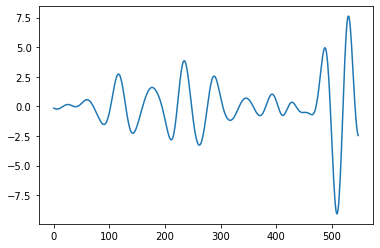

In [71]:
fig, ax = plt.subplots()
plt.plot(filterbandpass_P3_10_3D_melt_2022)

In [72]:
df_melt_2021['L'][128]

95.34368051751484

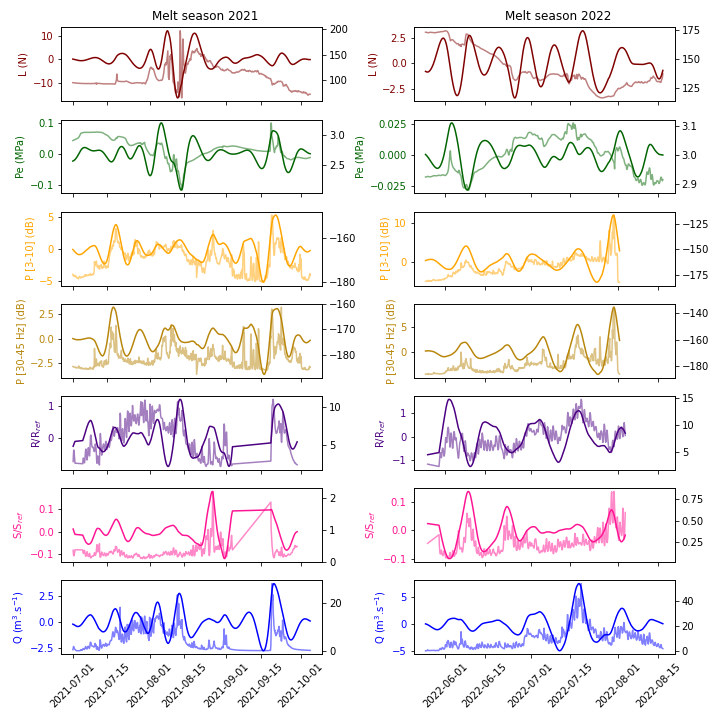

In [73]:
%matplotlib widget
b = signal.butter(1, [1/8, 1/4]/fs, 'band')[0]
a = signal.butter(1, [1/8, 1/4]/fs, 'band')[1]

# b = signal.butter(1, 1/20/fs, 'low')[0]
# a = signal.butter(1, 1/20/fs, 'low')[1]

df = [df_melt_2021, df_melt_2022]
name = ['melt_2021', 'melt_2022']
for d in np.arange(0, len(df)):
    df_temp = df[d]
    for i in np.arange(2, df_temp.shape[1]):
        idx = np.isfinite(df_temp[df_temp.columns[i]])
        globals()[f'filterbandpass_%s_3D_{name[d]}'%df_temp.columns[i]]=signal.filtfilt(b, a, df_temp[df_temp.columns[i]][idx])


color = ['maroon', 'darkgreen', 'orange', 'darkgoldenrod', 'indigo', 'deeppink', 'b',]
# label = ['L (N)', 'Pe (MPa)', 'P [3-10] (dB)', 'P [30-45 Hz] (dB)', 'R/R$_{ref}$', 'S/S$_{ref}$', 'Q (m$^3$.s$^{-1}$)']
# df = [df_melt_2021, df_melt_2022]
# name = ['melt_2021', 'melt_2022']
date = ['2021-06-24 00:00:00', '2021-07-01 00:00:00']

fig, axs = plt.subplots(df_data.shape[1]-2, 2, figsize=(10, 10), sharex='col')

for d in np.arange(0, len(df)):
    df_temp = df[d]
    
    for i in np.arange(2, df_temp.shape[1]):
        # print(df_temp.columns[i])

        idx = np.isfinite(df_temp[df_temp.columns[i]])

        data = globals()[f'filterbandpass_%s_3D_{name[d]}'%df_temp.columns[i]]

        
        globals()[f'df_filter_3D_{df_temp.columns[i]}_{name[d]}']=pd.DataFrame({'TIMESTAMP':df_temp['TIMESTAMP'][idx], 
                                                                          str(df_temp.columns[i]):data})
        globals()[f'df_filter_3D_{df_temp.columns[i]}_{name[d]}'].to_csv(path_df_export+f'3D_band_pass/df_filter_3D_norm_{df_temp.columns[i]}_{name[d]}.csv')
        axs[i-2][d].plot(df_temp['TIMESTAMP'][idx], data, color[i-2])
        axs[i-2][d].set_ylabel(label[i-2], color=color[i-2])
        axs[i-2][d].tick_params(axis='y', labelcolor=color[i-2])
        axs[i-2][d].tick_params(axis='x', rotation=45)

        ax1=axs[i-2][d].twinx()
        ax1.plot(df_temp['TIMESTAMP'][idx], df_temp[df_temp.columns[i]][idx], color[i-2], alpha=0.5)
            
    globals()[f'df_filter_3D_{df_temp.columns[i]}_{name[d]}'].to_csv(path_df_export+f'3D_band_pass/df_filter_3D_norm_{name[d]}.csv')
    
#     for i in [2, 3, 4, 5, 8, 6, 7]:
#         idx = np.isfinite(df_temp[df_temp.columns[i]])
#         # data = globals()[f'filterbandpass_%s_seasonal'%df_data.columns[i]]+globals()[f'fit_%s'%df_data.columns[i]]
#         data = globals()[f'filterbandpass_%s_3D_{name[d]}'%df_temp.columns[i]]


#         if (df_temp.columns[i]!= 'R') & (df_temp.columns[i]!= 'S'):

#             globals()[f'df_filter_3D_{df_temp.columns[i]}_{name[d]}']=pd.DataFrame({'TIMESTAMP':df_temp['TIMESTAMP'][idx], 
#                                                                               str(df_temp.columns[i]):data})
#             globals()[f'df_filter_3D_{df_temp.columns[i]}_{name[d]}'].to_csv(path_df_export+f'3D_band_pass/df_filter_3D_norm_{df_temp.columns[i]}_{name[d]}.csv')
#             axs[i-2][d].plot(df_temp['TIMESTAMP'][idx], data, color[i-2])
#             axs[i-2][d].set_ylabel(label[i-2], color=color[i-2])
#             axs[i-2][d].tick_params(axis='y', labelcolor=color[i-2])
#             axs[i-2][d].tick_params(axis='x', rotation=45)

#             ax1=axs[i-2][d].twinx()
#             ax1.plot(df_temp['TIMESTAMP'][idx], df_temp[df_temp.columns[i]][idx], color[i-2], alpha=0.5)
#             # ax1.set_ylabel(label_raw[i-2], color=color[i-2])
#             # ax1.tick_params(axis='y', labelcolor=color[i-2])

#         else:

#             Q_3D = pd.DataFrame({'TIMESTAMP': globals()[f'df_filter_3D_Runoff_{name[d]}']['TIMESTAMP'], 'Q_3D':globals()[f'filterbandpass_Runoff_3D_{name[d]}']})
#             P_3D = pd.DataFrame({'TIMESTAMP': globals()[f'df_filter_3D_P3_10_{name[d]}']['TIMESTAMP'], 'P_3D':10**(globals()[f'filterbandpass_P3_10_3D_{name[d]}']/10)})
            
#             Q_min=abs(Q_3D['Q_3D'].min())
#             P_min=abs(P_3D['P_3D'].min())
            
#             for i in Q_3D['Q_3D'].index:
#                 Q_3D['Q_3D'][i]=Q_3D['Q_3D'][i]+Q_min
                
#             for i in P_3D['P_3D'].index:
#                 P_3D['P_3D'][i]=P_3D['P_3D'][i]+P_min
            
            
#             # print(P_3D)
#             Q_P_3D = pd.concat([Q_3D.set_index('TIMESTAMP'), P_3D.set_index('TIMESTAMP')], axis=1, join='inner')
#             Q_P_3D.reset_index(inplace=True)
            
            

#             ref_P = Q_P_3D.loc[Q_P_season['TIMESTAMP']==date[d]]['P_3D'].values[0]
#             ref_Q = Q_P_3D.loc[Q_P_season['TIMESTAMP']==date[d]]['Q_3D'].values[0]


#             S = ((Q_P_3D['P_3D'])/ref_P)**(24/41)*(Q_P_3D['Q_3D']/ref_Q)**(-30/41)
#             R = ((Q_P_3D['P_3D'])/ref_P)**(-9/82)*(Q_P_3D['Q_3D']/ref_Q)**(21/41)
            
#             # Smin = ((P_min)/ref_P)**(24/41)*(Q_min/ref_Q)**(-30/41)
#             # Rmin = ((P_min)/ref_P)**(-9/82)*(Q_min/ref_Q)**(21/41)


#             globals()[f'df_filter_3D_S_{name[d]}'] = pd.DataFrame({'TIMESTAMP':Q_P_3D['TIMESTAMP'], 'S':S})
#             globals()[f'df_filter_3D_R_{name[d]}']= pd.DataFrame({'TIMESTAMP':Q_P_3D['TIMESTAMP'], 'R': R})

#             print(globals()[f'df_filter_3D_S_{name[d]}'].index)
            
#             x = np.arange(128, 138)
#             y = np.arange(160, 645)
#             z = np.arange(770, 850)
#             m = np.arange(2150, 2701)
#             idx_R_S = list(itertools.chain(x,y,z, m)) 
#             # print(df_filter_season_S['S'][idx_R_S].values)

#             # globals()[f'df_filter_3D_S_{name[d]}'] = globals()[f'df_filter_3D_S_{name[d]}'].loc[idx_R_S]
#             # globals()[f'df_filter_3D_R_{name[d]}']= globals()[f'df_filter_3D_R_{name[d]}'].loc[idx_R_S]


#             axs[4][d].plot(Q_P_3D['TIMESTAMP'], globals()[f'df_filter_3D_R_{name[d]}']['R'], color=color[4])
#             axs[4][d].set_ylabel(label[4], color=color[4])
#             axs[4][d].tick_params(axis='y', labelcolor=color[4])
#             # axs[4][d].set_ylim([0, 10])

#             ax1=axs[4][d].twinx()
#             ax1.plot(df_temp['TIMESTAMP'][idx], df_temp['R'][idx], color=color[4], alpha=0.5)
#             ax1.set_ylabel(label_raw[4], color=color[4])
#             ax1.tick_params(axis='y', labelcolor=color[4])


#             axs[5][d].plot(Q_P_3D['TIMESTAMP'], globals()[f'df_filter_3D_S_{name[d]}']['S'], color=color[5])
#             axs[5][d].set_ylabel(label[5], color=color[5])
#             axs[5][d].tick_params(axis='y', labelcolor=color[5])
#             axs[5][d].set_ylim([0, 2])

#             ax1=axs[5][d].twinx()
#             ax1.plot(df_temp['TIMESTAMP'][idx], df_temp['S'][idx], color=color[5], alpha=0.5)
#             ax1.set_ylabel(label_raw[5], color=color[5])
#             ax1.tick_params(axis='y', labelcolor=color[5])
#             ax1.set_ylim([0, 1])
        
#         axs[4].axvspan(Q_P_season['TIMESTAMP'][0], Q_P_season['TIMESTAMP'][128], color='lightpink', alpha=0.2)
#         axs[4].axvspan(Q_P_season['TIMESTAMP'][138], Q_P_season['TIMESTAMP'][160], color='lightpink', alpha=0.2)
#         axs[4].axvspan(Q_P_season['TIMESTAMP'][645], Q_P_season['TIMESTAMP'][770], color='lightpink', alpha=0.2)
#         axs[4].axvspan(Q_P_season['TIMESTAMP'][850], Q_P_season['TIMESTAMP'][2150], color='lightpink', alpha=0.2)
        
#         axs[5].axvspan(Q_P_season['TIMESTAMP'][0], Q_P_season['TIMESTAMP'][128], color='lightpink', alpha=0.2)
#         axs[5].axvspan(Q_P_season['TIMESTAMP'][138], Q_P_season['TIMESTAMP'][160], color='lightpink', alpha=0.2)
#         axs[5].axvspan(Q_P_season['TIMESTAMP'][645], Q_P_season['TIMESTAMP'][770], color='lightpink', alpha=0.2)
#         axs[5].axvspan(Q_P_season['TIMESTAMP'][850], Q_P_season['TIMESTAMP'][2150], color='lightpink', alpha=0.2)

#         axs[5].set_ylim([0.3, 1])
               
    
axs[0][0].text(0.35, 1.1, 'Melt season 2021', 
    color='k', 
    fontsize=12, 
    transform=axs[0][0].transAxes)
axs[0][1].text(0.35, 1.1, 'Melt season 2022', 
    color='k', 
    fontsize=12, 
    transform=axs[0][1].transAxes)

plt.tight_layout()
plt.savefig(path_fig_export+'bandpass_3D.pdf', bbox_inches='tight')


In [74]:
test = pd.concat([df_filter_3D_S_melt_2021, df_melt_2021], axis=1)
test2=test.iloc[:, [3,1]]
test2

TIMESTAMP         S
128 2021-07-01 00:00:00       NaN
129 2021-07-01 03:00:00  0.012353
130 2021-07-01 06:00:00  0.007727
131 2021-07-01 09:00:00  0.003307
132 2021-07-01 12:00:00 -0.000778
..                  ...       ...
891 2021-10-04 09:00:00       NaN
892 2021-10-04 12:00:00       NaN
893 2021-10-04 15:00:00       NaN
894 2021-10-04 18:00:00       NaN
895 2021-10-04 21:00:00       NaN

[768 rows x 2 columns]

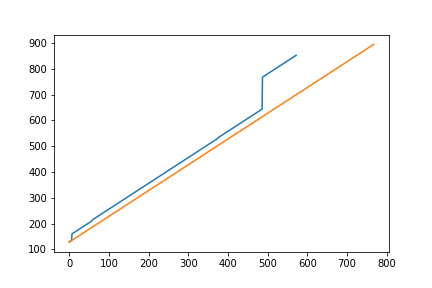

In [75]:
fig, ax = plt.subplots()
ax.plot(df_filter_3D_S_melt_2021.index)
ax.plot(test2.index)

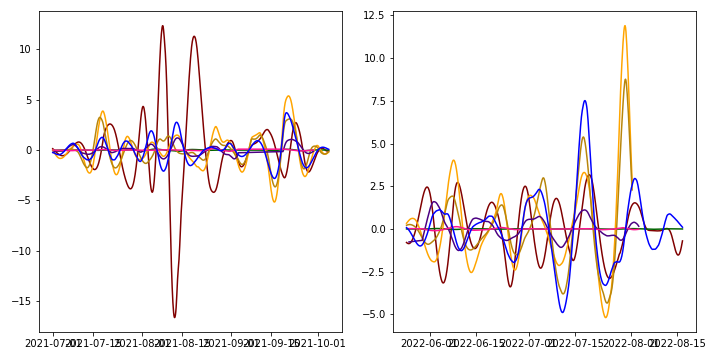

In [76]:
fig, axs = plt.subplots(1, 2, figsize=(10,5))
for d in np.arange(0, len(df)):   
    df_temp=df[d]
    for i in np.arange(2, df_temp.shape[1]):
        # print(globals()[f'df_filter_3D_{df_temp.columns[i]}_{name[d]}']['TIMESTAMP'])
        # print(idx)
        axs[d].plot(globals()[f'df_filter_3D_{df_temp.columns[i]}_{name[d]}']['TIMESTAMP'],
                    globals()[f'df_filter_3D_{df_temp.columns[i]}_{name[d]}'][df_temp.columns[i]],
                   color=color[i-2])
plt.tight_layout()
plt.savefig(path_fig_export+'bandpass_3D_comp.pdf', bbox_inches='tight')

In [77]:
df_filter_3D_S_melt_2021

TIMESTAMP         S
129 2021-07-01 03:00:00  0.012353
130 2021-07-01 06:00:00  0.007727
131 2021-07-01 09:00:00  0.003307
132 2021-07-01 12:00:00 -0.000778
133 2021-07-01 15:00:00 -0.004541
..                  ...       ...
849 2021-09-29 03:00:00 -0.003240
850 2021-09-29 06:00:00 -0.002048
851 2021-09-29 09:00:00 -0.001117
852 2021-09-29 12:00:00 -0.000402
853 2021-09-29 15:00:00  0.000124

[573 rows x 2 columns]

## Handpicking index where there is multi-day variations

### Give same index value to all dataframe based on df_melt

In [78]:
for d in np.arange(0, len(df)):   
    df_temp=df[d]
    
    for i in np.arange(2, df_temp.shape[1]):
        df_temp_value=globals()[f'df_filter_3D_{df_temp.columns[i]}_{name[d]}']
        globals()[f'df_filter_3D_{df_temp.columns[i]}_{name[d]}']=pd.concat([df_temp_value, df_temp], axis=1).iloc[:, [3,1]]

## Melt 2021

### Reindex dataframe

In [79]:
df_filter_3D_L_melt_2021.reset_index(inplace=True, drop=True)
df_filter_3D_Pe_melt_2021.reset_index(inplace=True, drop=True)
df_filter_3D_P3_10_melt_2021.reset_index(inplace=True, drop=True)
df_filter_3D_P30_45_melt_2021.reset_index(inplace=True, drop=True)
df_filter_3D_R_melt_2021.reset_index(inplace=True, drop=True)
df_filter_3D_S_melt_2021.reset_index(inplace=True, drop=True)
df_filter_3D_Runoff_melt_2021.reset_index(inplace=True, drop=True)

### Force

In [80]:
idx1 = df_filter_3D_L_melt_2021.loc[df_filter_3D_L_melt_2021['TIMESTAMP']=='2021-07-27 21:00:00']
idx2 = df_filter_3D_L_melt_2021.loc[df_filter_3D_L_melt_2021['TIMESTAMP']=='2021-08-26 00:00:00']

idx3 = df_filter_3D_L_melt_2021.loc[df_filter_3D_L_melt_2021['TIMESTAMP']=='2021-09-04 21:00:00']
idx4 = df_filter_3D_L_melt_2021.loc[df_filter_3D_L_melt_2021['TIMESTAMP']=='2021-09-27 00:00:00']

idx_L1 = np.arange(idx1.index.values[0], idx2.index.values[0])
idx_L2 = np.arange(idx3.index.values[0], idx4.index.values[0])
idx_L=np.append(idx_L1, idx_L2)

### Pe

In [81]:
idx1 = df_filter_3D_Pe_melt_2021.loc[df_filter_3D_Pe_melt_2021['TIMESTAMP']=='2021-07-01 00:00:00']
idx2 = df_filter_3D_Pe_melt_2021.loc[df_filter_3D_Pe_melt_2021['TIMESTAMP']=='2021-08-18 12:00:00']

idx3 = df_filter_3D_Pe_melt_2021.loc[df_filter_3D_Pe_melt_2021['TIMESTAMP']=='2021-09-15 21:00:00']
idx4 = df_filter_3D_Pe_melt_2021.loc[df_filter_3D_Pe_melt_2021['TIMESTAMP']=='2021-09-25 21:00:00']

idx_Pe1 = np.arange(idx1.index.values[0], idx2.index.values[0])
idx_Pe2 = np.arange(idx3.index.values[0], idx4.index.values[0])
idx_Pe=np.append(idx_Pe1, idx_Pe2)

### P [30-45]

In [82]:
idx1 = df_filter_3D_P30_45_melt_2021.loc[df_filter_3D_P30_45_melt_2021['TIMESTAMP']=='2021-07-02 00:00:00']
idx2 = df_filter_3D_P30_45_melt_2021.loc[df_filter_3D_P30_45_melt_2021['TIMESTAMP']=='2021-07-22 12:00:00']

idx3 = df_filter_3D_P30_45_melt_2021.loc[df_filter_3D_P30_45_melt_2021['TIMESTAMP']=='2021-08-02 21:00:00']
idx4 = df_filter_3D_P30_45_melt_2021.loc[df_filter_3D_P30_45_melt_2021['TIMESTAMP']=='2021-10-02 21:00:00']

idx_P1 = np.arange(idx1.index.values[0], idx2.index.values[0])
idx_P2 = np.arange(idx3.index.values[0], idx4.index.values[0])
idx_P=np.append(idx_P1, idx_P2)

## Runoff 

In [83]:
idx1 = df_filter_3D_Runoff_melt_2021.loc[df_filter_3D_Runoff_melt_2021['TIMESTAMP']=='2021-07-03 03:00:00']
idx2 = df_filter_3D_Runoff_melt_2021.loc[df_filter_3D_Runoff_melt_2021['TIMESTAMP']=='2021-08-17 12:00:00']

idx3 = df_filter_3D_Runoff_melt_2021.loc[df_filter_3D_Runoff_melt_2021['TIMESTAMP']=='2021-08-28 00:00:00']
idx4 = df_filter_3D_Runoff_melt_2021.loc[df_filter_3D_Runoff_melt_2021['TIMESTAMP']=='2021-09-04 15:00:00']

idx5 = df_filter_3D_Runoff_melt_2021.loc[df_filter_3D_Runoff_melt_2021['TIMESTAMP']=='2021-09-16 21:00:00']
idx6 = df_filter_3D_Runoff_melt_2021.loc[df_filter_3D_Runoff_melt_2021['TIMESTAMP']=='2021-09-26 21:00:00']

idx_Q1 = np.arange(idx1.index.values[0], idx2.index.values[0])
idx_Q2 = np.arange(idx3.index.values[0], idx4.index.values[0])
idx_Q3 = np.arange(idx5.index.values[0], idx6.index.values[0])

idx_Q=np.append(idx_Q1, idx_Q2)
idx_Q=np.append(idx_Q, idx_Q3)

### R

In [84]:
idx1 = df_filter_3D_R_melt_2021.loc[df_filter_3D_R_melt_2021['TIMESTAMP']=='2021-07-05 00:00:00']
idx2 = df_filter_3D_R_melt_2021.loc[df_filter_3D_R_melt_2021['TIMESTAMP']=='2021-09-01 12:00:00']

idx3 = df_filter_3D_R_melt_2021.loc[df_filter_3D_R_melt_2021['TIMESTAMP']=='2021-09-19 21:00:00']
idx4 = df_filter_3D_R_melt_2021.loc[df_filter_3D_R_melt_2021['TIMESTAMP']=='2021-09-29 15:00:00']

idx_R1_21 = np.arange(idx1.index.values[0], idx2.index.values[0])
idx_R2_21 = np.arange(idx3.index.values[0], idx4.index.values[0])
# idx_R3_21 = np.arange(idx5.index.values[0], idx6.index.values[0])

idx_R=np.append(idx_R1_21, idx_R2_21)
# idx_R=np.append(idx_R, idx_R3_21)

## S

In [85]:
idx1 = df_filter_3D_S_melt_2021.loc[df_filter_3D_S_melt_2021['TIMESTAMP']=='2021-07-05 00:00:00']
idx2 = df_filter_3D_S_melt_2021.loc[df_filter_3D_S_melt_2021['TIMESTAMP']=='2021-08-14 12:00:00']

idx3 = df_filter_3D_S_melt_2021.loc[df_filter_3D_S_melt_2021['TIMESTAMP']=='2021-08-20 21:00:00']
idx4 = df_filter_3D_S_melt_2021.loc[df_filter_3D_S_melt_2021['TIMESTAMP']=='2021-09-03 12:00:00']

idx5 = df_filter_3D_S_melt_2021.loc[df_filter_3D_S_melt_2021['TIMESTAMP']=='2021-09-19 21:00:00']
idx6 = df_filter_3D_S_melt_2021.loc[df_filter_3D_S_melt_2021['TIMESTAMP']=='2021-09-27 15:00:00']

idx_S1_21 = np.arange(idx1.index.values[0], idx2.index.values[0])
idx_S2_21 = np.arange(idx3.index.values[0], idx4.index.values[0])
idx_S3_21 = np.arange(idx5.index.values[0], idx6.index.values[0])

idx_S=np.append(idx_S1_21, idx_S2_21)
idx_S=np.append(idx_S, idx_S3_21)

## Melt 2022

In [86]:
df_filter_3D_L_melt_2022.reset_index(inplace=True, drop=True)
df_filter_3D_Pe_melt_2022.reset_index(inplace=True, drop=True)
df_filter_3D_P3_10_melt_2022.reset_index(inplace=True, drop=True)
df_filter_3D_P30_45_melt_2022.reset_index(inplace=True, drop=True)
df_filter_3D_R_melt_2022.reset_index(inplace=True, drop=True)
df_filter_3D_S_melt_2022.reset_index(inplace=True, drop=True)
df_filter_3D_Runoff_melt_2022.reset_index(inplace=True, drop=True)

In [87]:
df_filter_3D_P30_45_melt_2022.index

RangeIndex(start=0, stop=670, step=1)

### Force

In [88]:
idx1 = df_filter_3D_L_melt_2022.loc[df_filter_3D_L_melt_2022['TIMESTAMP']=='2022-05-31 21:00:00']
idx2 = df_filter_3D_L_melt_2022.loc[df_filter_3D_L_melt_2022['TIMESTAMP']=='2022-06-09 00:00:00']

idx3 = df_filter_3D_L_melt_2022.loc[df_filter_3D_L_melt_2022['TIMESTAMP']=='2022-06-20 21:00:00']
idx4 = df_filter_3D_L_melt_2022.loc[df_filter_3D_L_melt_2022['TIMESTAMP']=='2022-06-30 00:00:00']

idx5 = df_filter_3D_L_melt_2022.loc[df_filter_3D_L_melt_2022['TIMESTAMP']=='2022-07-14 21:00:00']
idx6 = df_filter_3D_L_melt_2022.loc[df_filter_3D_L_melt_2022['TIMESTAMP']=='2022-08-06 00:00:00']

idx7 = df_filter_3D_L_melt_2022.loc[df_filter_3D_L_melt_2022['TIMESTAMP']=='2022-08-13 21:00:00']
idx8 = df_filter_3D_L_melt_2022.loc[df_filter_3D_L_melt_2022['TIMESTAMP']=='2022-08-16 15:00:00']

idx_L1_22 = np.arange(idx1.index.values[0], idx2.index.values[0])
idx_L2_22 = np.arange(idx3.index.values[0], idx4.index.values[0])
idx_L3_22 = np.arange(idx5.index.values[0], idx6.index.values[0])
idx_L4_22 = np.arange(idx7.index.values[0], idx8.index.values[0])

idx_L_221=np.append(idx_L1_22, idx_L2_22)
idx_L_222=np.append(idx_L_221, idx_L3_22)
idx_L_22=np.append(idx_L_222, idx_L4_22)

### Pe

In [89]:
idx1 = df_filter_3D_Pe_melt_2022.loc[df_filter_3D_Pe_melt_2022['TIMESTAMP']=='2022-05-28 21:00:00']
idx2 = df_filter_3D_Pe_melt_2022.loc[df_filter_3D_Pe_melt_2022['TIMESTAMP']=='2022-06-14 18:00:00']

idx3 = df_filter_3D_Pe_melt_2022.loc[df_filter_3D_Pe_melt_2022['TIMESTAMP']=='2022-06-21 12:00:00']
idx4 = df_filter_3D_Pe_melt_2022.loc[df_filter_3D_Pe_melt_2022['TIMESTAMP']=='2022-08-16 15:00:00']

idx_Pe1_22 = np.arange(idx1.index.values[0], idx2.index.values[0])
idx_Pe2_22 = np.arange(idx3.index.values[0], idx4.index.values[0])
idx_Pe_22=np.append(idx_Pe1_22, idx_Pe2_22)

### P [3-10]

In [90]:
idx1 = df_filter_3D_P3_10_melt_2022.loc[df_filter_3D_P3_10_melt_2022['TIMESTAMP']=='2022-06-02 21:00:00']
idx2 = df_filter_3D_P3_10_melt_2022.loc[df_filter_3D_P3_10_melt_2022['TIMESTAMP']=='2022-07-01 18:00:00']

idx3 = df_filter_3D_P3_10_melt_2022.loc[df_filter_3D_P3_10_melt_2022['TIMESTAMP']=='2022-07-24 12:00:00']
idx4 = df_filter_3D_P3_10_melt_2022.loc[df_filter_3D_P3_10_melt_2022['TIMESTAMP']=='2022-08-01 09:00:00']

idx_P_1_3_10_22 = np.arange(idx1.index.values[0], idx2.index.values[0])
idx_P_2_3_10_22 = np.arange(idx3.index.values[0], idx4.index.values[0])
idx_P310_22=np.append(idx_P_1_3_10_22, idx_P_2_3_10_22)

### P [30-45]

In [91]:
idx1 = df_filter_3D_P30_45_melt_2022.loc[df_filter_3D_P30_45_melt_2022['TIMESTAMP']=='2022-06-02 21:00:00']
idx2 = df_filter_3D_P30_45_melt_2022.loc[df_filter_3D_P30_45_melt_2022['TIMESTAMP']=='2022-08-01 09:00:00']

idx_P3045_22=np.arange(idx1.index.values[0], idx2.index.values[0])

### Runoff

In [92]:
idx1 = df_filter_3D_Runoff_melt_2022.loc[df_filter_3D_Runoff_melt_2022['TIMESTAMP']=='2022-05-29 00:00:00']
idx2 = df_filter_3D_Runoff_melt_2022.loc[df_filter_3D_Runoff_melt_2022['TIMESTAMP']=='2022-06-10 12:00:00']

idx3 = df_filter_3D_Runoff_melt_2022.loc[df_filter_3D_Runoff_melt_2022['TIMESTAMP']=='2022-06-26 21:00:00']
idx4 = df_filter_3D_Runoff_melt_2022.loc[df_filter_3D_Runoff_melt_2022['TIMESTAMP']=='2022-08-07 15:00:00']

idx_Q1_22 = np.arange(idx1.index.values[0], idx2.index.values[0])
idx_Q2_22 = np.arange(idx3.index.values[0], idx4.index.values[0])

idx_Q_22=np.append(idx_Q1_22, idx_Q2_22)

### R

In [93]:
idx1 = df_filter_3D_R_melt_2022.loc[df_filter_3D_R_melt_2022['TIMESTAMP']=='2022-05-30 00:00:00']
idx2 = df_filter_3D_R_melt_2022.loc[df_filter_3D_R_melt_2022['TIMESTAMP']=='2022-08-03 09:00:00']

idx_R_22 = np.arange(idx1.index.values[0], idx2.index.values[0])

### S

In [94]:
idx1 = df_filter_3D_S_melt_2022.loc[df_filter_3D_S_melt_2022['TIMESTAMP']=='2022-05-30 00:00:00']
idx2 = df_filter_3D_S_melt_2022.loc[df_filter_3D_S_melt_2022['TIMESTAMP']=='2022-08-03 09:00:00']

idx_S_22 = np.arange(idx1.index.values[0], idx2.index.values[0])

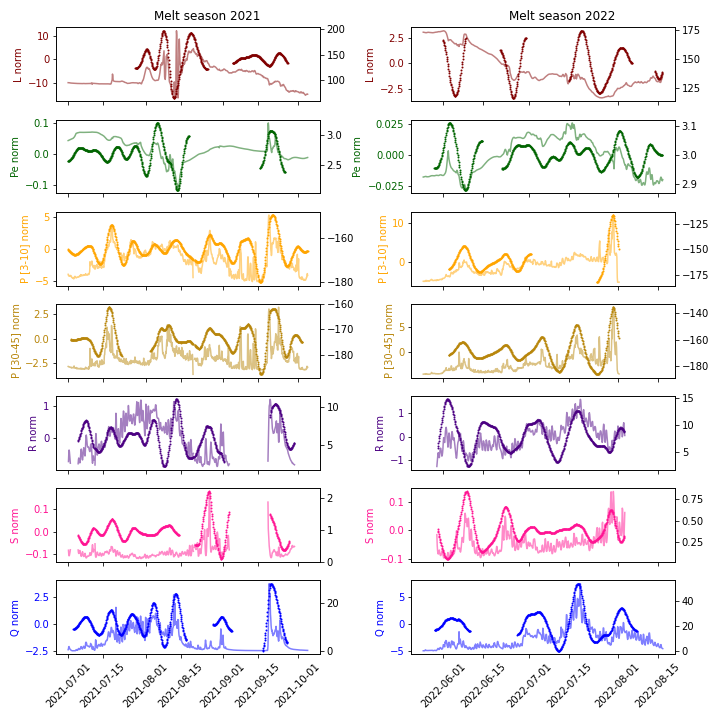

In [95]:
color = ['maroon', 'darkgreen', 'orange', 'darkgoldenrod', 'indigo', 'deeppink', 'b',]
label = ['L (N)', 'Pe (MPa)', 'P [3-10] (dB)', 'P [30-45 Hz] (dB)', 'R/R$_{ref}$', 'S/S$_{ref}$', 'Q (m$^3$.s$^{-1}$)']

fig, axs = plt.subplots(7, 2, figsize=(10,10), sharex='col')
axs[0][0].scatter(df_filter_3D_L_melt_2021['TIMESTAMP'][idx_L], df_filter_3D_L_melt_2021['L'][idx_L], color='maroon', marker='o', s=1)
axs[0][0].set_ylabel('L norm', color='maroon')
axs[0][0].tick_params(axis='y', labelcolor='maroon')
axs[0][0].tick_params(axis='x', rotation=45)
ax1=axs[0][0].twinx()
ax1.plot(df_melt_2021['TIMESTAMP'], df_melt_2021['L'], color='maroon', alpha=0.5)

axs[1][0].scatter(df_filter_3D_Pe_melt_2021['TIMESTAMP'][idx_Pe], df_filter_3D_Pe_melt_2021['Pe'][idx_Pe], color='darkgreen', marker='o', s=1)
axs[1][0].set_ylabel('Pe norm', color='darkgreen')
axs[1][0].tick_params(axis='y', labelcolor='darkgreen')
axs[1][0].tick_params(axis='x', rotation=45)
ax2=axs[1][0].twinx()
ax2.plot(df_melt_2021['TIMESTAMP'], df_melt_2021['Pe'], 'darkgreen', alpha=0.5)

axs[2][0].scatter(df_filter_3D_P3_10_melt_2021['TIMESTAMP'], df_filter_3D_P3_10_melt_2021['P3_10'], color='orange', marker='o', s=1)
axs[2][0].set_ylabel('P [3-10] norm', color='orange')
axs[2][0].tick_params(axis='y', labelcolor='orange')
axs[2][0].tick_params(axis='x', rotation=45)
ax3=axs[2][0].twinx()
ax3.plot(df_melt_2021['TIMESTAMP'], df_melt_2021['P3_10'], 'orange', alpha=0.5)

axs[3][0].scatter(df_filter_3D_P30_45_melt_2021['TIMESTAMP'][idx_P], df_filter_3D_P30_45_melt_2021['P30_45'][idx_P], color='darkgoldenrod', marker='o', s=1)
axs[3][0].set_ylabel('P [30-45] norm', color='darkgoldenrod')
axs[3][0].tick_params(axis='y', labelcolor='darkgoldenrod')
axs[3][0].tick_params(axis='x', rotation=45)
ax4=axs[3][0].twinx()
ax4.plot(df_melt_2021['TIMESTAMP'], df_melt_2021['P30_45'], 'darkgoldenrod', alpha=0.5)

axs[4][0].scatter(df_filter_3D_R_melt_2021['TIMESTAMP'][idx_R], df_filter_3D_R_melt_2021['R'][idx_R], color='indigo', marker='o', s=1)
axs[4][0].set_ylabel('R norm', color='indigo')
axs[4][0].tick_params(axis='y', labelcolor='indigo')
axs[4][0].tick_params(axis='x', rotation=45)
ax4=axs[4][0].twinx()
ax4.plot(df_melt_2021['TIMESTAMP'], df_melt_2021['R'], 'indigo', alpha=0.5)

axs[5][0].scatter(df_filter_3D_S_melt_2021['TIMESTAMP'][idx_S], df_filter_3D_S_melt_2021['S'][idx_S], color='deeppink', marker='o', s=1)
axs[5][0].set_ylabel('S norm', color='deeppink')
axs[5][0].tick_params(axis='y', labelcolor='deeppink')
axs[5][0].tick_params(axis='x', rotation=45)
ax4=axs[5][0].twinx()
ax4.plot(df_melt_2021['TIMESTAMP'], df_melt_2021['S'], 'deeppink', alpha=0.5)


axs[6][0].scatter(df_filter_3D_Runoff_melt_2021['TIMESTAMP'][idx_Q], df_filter_3D_Runoff_melt_2021['Runoff'][idx_Q], color='b', marker='o', s=1)
axs[6][0].set_ylabel('Q norm', color='b')
axs[6][0].tick_params(axis='y', labelcolor='b')
axs[6][0].tick_params(axis='x', rotation=45)
ax7=axs[6][0].twinx()
ax7.plot(df_melt_2021['TIMESTAMP'], df_melt_2021['Runoff'], 'b', alpha=0.5)

#------------------------------------------------------------------------------------------------------------------------------------

axs[0][1].scatter(df_filter_3D_L_melt_2022['TIMESTAMP'][idx_L_22], df_filter_3D_L_melt_2022['L'][idx_L_22], color='maroon', marker='o', s=1)
axs[0][1].set_ylabel('L norm', color='maroon')
axs[0][1].tick_params(axis='y', labelcolor='maroon')
axs[0][1].tick_params(axis='x', rotation=45)
ax1=axs[0][1].twinx()
ax1.plot(df_melt_2022['TIMESTAMP'], df_melt_2022['L'], color='maroon', alpha=0.5)

axs[1][1].scatter(df_filter_3D_Pe_melt_2022['TIMESTAMP'][idx_Pe_22], df_filter_3D_Pe_melt_2022['Pe'][idx_Pe_22], color='darkgreen', marker='o', s=1)
axs[1][1].set_ylabel('Pe norm', color='darkgreen')
axs[1][1].tick_params(axis='y', labelcolor='darkgreen')
axs[1][1].tick_params(axis='x', rotation=45)
ax2=axs[1][1].twinx()
ax2.plot(df_melt_2022['TIMESTAMP'], df_melt_2022['Pe'], 'darkgreen', alpha=0.5)

axs[2][1].scatter(df_filter_3D_P3_10_melt_2022['TIMESTAMP'][idx_P310_22], df_filter_3D_P3_10_melt_2022['P3_10'][idx_P310_22], color='orange', marker='o', s=1)
axs[2][1].set_ylabel('P [3-10] norm', color='orange')
axs[2][1].tick_params(axis='y', labelcolor='orange')
axs[2][1].tick_params(axis='x', rotation=45)
ax3=axs[2][1].twinx()
ax3.plot(df_melt_2022['TIMESTAMP'], df_melt_2022['P3_10'], 'orange', alpha=0.5)

axs[3][1].scatter(df_filter_3D_P30_45_melt_2022['TIMESTAMP'][idx_P3045_22], df_filter_3D_P30_45_melt_2022['P30_45'][idx_P3045_22], color='darkgoldenrod', marker='o', s=1)
axs[3][1].set_ylabel('P [30-45] norm', color='darkgoldenrod')
axs[3][1].tick_params(axis='y', labelcolor='darkgoldenrod')
axs[3][1].tick_params(axis='x', rotation=45)
ax4=axs[3][1].twinx()
ax4.plot(df_melt_2022['TIMESTAMP'], df_melt_2022['P30_45'], 'darkgoldenrod', alpha=0.5)

axs[4][1].scatter(df_filter_3D_R_melt_2022['TIMESTAMP'][idx_R_22], df_filter_3D_R_melt_2022['R'][idx_R_22], color='indigo', marker='o', s=1)
axs[4][1].set_ylabel('R norm', color='indigo')
axs[4][1].tick_params(axis='y', labelcolor='indigo')
axs[4][1].tick_params(axis='x', rotation=45)
ax4=axs[4][1].twinx()
ax4.plot(df_melt_2022['TIMESTAMP'], df_melt_2022['R'], 'indigo', alpha=0.5)

axs[5][1].scatter(df_filter_3D_S_melt_2022['TIMESTAMP'][idx_S_22], df_filter_3D_S_melt_2022['S'][idx_S_22], color='deeppink', marker='o', s=1)
axs[5][1].set_ylabel('S norm', color='deeppink')
axs[5][1].tick_params(axis='y', labelcolor='deeppink')
axs[5][1].tick_params(axis='x', rotation=45)
ax4=axs[5][1].twinx()
ax4.plot(df_melt_2022['TIMESTAMP'], df_melt_2022['S'], 'deeppink', alpha=0.5)

axs[6][1].scatter(df_filter_3D_Runoff_melt_2022['TIMESTAMP'][idx_Q_22], df_filter_3D_Runoff_melt_2022['Runoff'][idx_Q_22], color='b', marker='o', s=1)
axs[6][1].set_ylabel('Q norm', color='b')
axs[6][1].tick_params(axis='y', labelcolor='b')
axs[6][1].tick_params(axis='x', rotation=45)
ax7=axs[6][1].twinx()
ax7.plot(df_melt_2022['TIMESTAMP'], df_melt_2022['Runoff'], 'b', alpha=0.5)

axs[0][0].text(0.37, 1.1, 'Melt season 2021', 
    color='k', 
    fontsize=12, 
    transform=axs[0][0].transAxes)

axs[0][1].text(0.37, 1.1, 'Melt season 2022', 
    color='k', 
    fontsize=12, 
    transform=axs[0][1].transAxes)

plt.tight_layout()
plt.savefig(path_fig_export+'bandpass_3D_filtered.pdf', bbox_inches='tight')

## Establish prediction/stability at a multi-day scale

In [96]:
df_melt_2021['P3_10'].mean()

-170.19515271712058

In [97]:
df_filter_3D_P3_10_melt_2021['P3_10']+df_melt_2021['P3_10'].mean()

0     -170.213323
1     -170.272230
2     -170.330812
3     -170.388504
4     -170.445309
          ...    
763   -170.517484
764   -170.487170
765   -170.454840
766   -170.422415
767   -170.391091
Name: P3_10, Length: 768, dtype: float64

In [98]:
df_filter_3D_P3_10_melt_2021['P3_10 trend']=df_filter_3D_P3_10_melt_2021['P3_10']+df_melt_2021['P3_10'].mean()
df_filter_3D_Runoff_melt_2021['Runoff trend']=df_filter_3D_Runoff_melt_2021['Runoff']+df_melt_2021['Runoff'].mean()
df_filter_3D_R_melt_2021['R trend']=df_filter_3D_R_melt_2021['R']+df_melt_2021['R'].mean()
df_filter_3D_S_melt_2021['S trend']=df_filter_3D_S_melt_2021['S']+df_melt_2021['S'].mean()

df_filter_3D_P3_10_melt_2022['P3_10 trend']=df_filter_3D_P3_10_melt_2022['P3_10']+df_melt_2022['P3_10'].mean()
df_filter_3D_Runoff_melt_2022['Runoff trend']=df_filter_3D_Runoff_melt_2022['Runoff']+df_melt_2022['Runoff'].mean()
df_filter_3D_R_melt_2022['R trend']=df_filter_3D_R_melt_2022['R']+df_melt_2022['R'].mean()
df_filter_3D_S_melt_2022['S trend']=df_filter_3D_S_melt_2022['S']+df_melt_2022['S'].mean()

P_ref_3D=df_filter_3D_P3_10_melt_2021['P3_10 trend'][0]
Q_ref_3D=df_filter_3D_Runoff_melt_2021['Runoff trend'][0]

In [99]:
df_filter_3D_Runoff_melt_2021

TIMESTAMP    Runoff  Runoff trend
0   2021-07-01 00:00:00 -0.227692      3.904267
1   2021-07-01 03:00:00 -0.239892      3.892068
2   2021-07-01 06:00:00 -0.253082      3.878878
3   2021-07-01 09:00:00 -0.268535      3.863424
4   2021-07-01 12:00:00 -0.286487      3.845472
..                  ...       ...           ...
763 2021-10-04 09:00:00  0.143586      4.275545
764 2021-10-04 12:00:00  0.126476      4.258435
765 2021-10-04 15:00:00  0.109661      4.241620
766 2021-10-04 18:00:00  0.093357      4.225316
767 2021-10-04 21:00:00  0.077765      4.209724

[768 rows x 3 columns]

In [100]:
P_Q_1=[]
P_Q_2=[]
R=[]
S_Q_1=[]
S_Q_2=[]
shift=[]
Q_P =[]



for i in np.arange(0.1, 100, 0.1):
    # print('la')
    P_Q_1.append(1.25*np.log(i))
    P_Q_2.append(14/3*np.log(i))
    # R.append(np.log(i)**(9/22))
    R.append(i**(9/22))
    S_Q_1.append(i**(-2/11))
    S_Q_2.append(i**2)
    
        
    # R.append((9/22*np.log(i)))
    # S_Q_1.append(i**(-2/11))
    # S_Q_2.append(i**2)

In [101]:
curve_prop_P_3D=pd.DataFrame({'Q':np.arange(0.1,100, 0.1), 'P_5/4_Q':P_Q_1, 'P_14/3_Q':P_Q_2,
                          'R_Q':R, 'S_2/11_Q':S_Q_1, 'S_2_Q':S_Q_2})

In [102]:
idx_Q_L21 = np.sort(list(set(idx_Q.tolist()) & set(idx_L.tolist())))
idx_Q_Pe21 = np.sort(list(set(idx_Q.tolist()) & set(idx_Pe.tolist())))
idx_Q_P21 = np.sort(list(set(idx_Q.tolist()) & set(idx_P.tolist())))
idx_Q_R21 = np.sort(list(set(idx_Q.tolist()) & set(idx_R.tolist())))
idx_Q_S21 = np.sort(list(set(idx_Q.tolist()) & set(idx_S.tolist())))

In [103]:
idx_Q_L22 = np.sort(list(set(idx_Q_22.tolist()) & set(idx_L_22.tolist())))
idx_Q_Pe22 = np.sort(list(set(idx_Q_22.tolist()) & set(idx_Pe_22.tolist())))
idx_Q_P22 = np.sort(list(set(idx_Q_22.tolist()) & set(idx_P310_22.tolist())))
idx_Q_R22 = np.sort(list(set(idx_Q_22.tolist()) & set(idx_R_22.tolist())))
idx_Q_S22 = np.sort(list(set(idx_Q_22.tolist()) & set(idx_S_22.tolist())))

<AxesSubplot:>

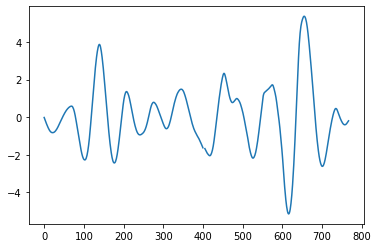

In [104]:
%matplotlib inline
df_filter_3D_P3_10_melt_2021['P3_10'].plot()

In [105]:
P_ref_3D

-170.2133228790101

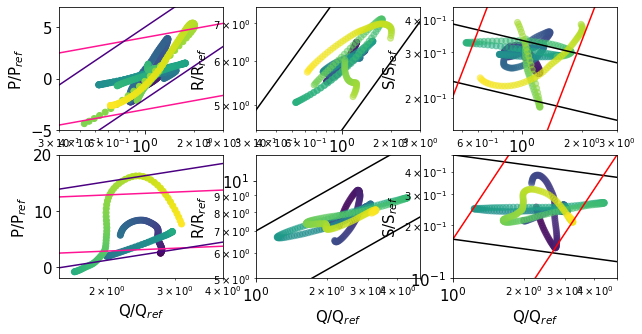

In [106]:
fig, axs = plt.subplots(2, 3, figsize=(10,5))
# axs[0][0].scatter(df_filter_3D_Runoff_melt_2021['Runoff'][idx_Q_P21]-df_filter_3D_Runoff_melt_2021['Runoff'][idx_Q_P21].min()
#                   , df_filter_3D_P3_10_melt_2021['P3_10'][idx_Q_P21]-df_filter_3D_P3_10_melt_2021['P3_10'][idx_Q_P21].min()
#                   , c=range(len(idx_Q_P21)), marker='o')
axs[0][0].scatter(df_filter_3D_Runoff_melt_2021['Runoff trend'][idx_Q_P21]/Q_ref_3D
                  , (df_filter_3D_P3_10_melt_2021['P3_10 trend'][idx_Q_P21])-P_ref_3D
                  , c=range(len(idx_Q_P21)), marker='o')
axs[0][0].set_xlabel('Q/', fontsize=15)
axs[0][0].set_ylabel('P/P$_{ref}$', fontsize=15)
axs[0][0].set_xscale('log')
axs[0][0].tick_params(labelsize=15)
axs[0][0].plot(curve_prop_P_3D['Q'], curve_prop_P_3D['P_5/4_Q']-3, 'deeppink')
axs[0][0].plot(curve_prop_P_3D['Q'], curve_prop_P_3D['P_5/4_Q']+4, 'deeppink')

axs[0][0].plot(curve_prop_P_3D['Q'], curve_prop_P_3D['P_14/3_Q']+5, 'indigo')
axs[0][0].plot(curve_prop_P_3D['Q'], curve_prop_P_3D['P_14/3_Q']-2, 'indigo')

axs[0][0].set_ylim([-5, 7])
axs[0][0].set_xlim([0.3, 3])

axs[0][1].scatter(df_filter_3D_Runoff_melt_2021['Runoff trend'][idx_Q_R21]/Q_ref_3D, df_filter_3D_R_melt_2021['R trend'][idx_Q_R21], c=range(len(idx_Q_R21)), marker='o', alpha=0.5)
axs[0][1].set_xlabel('Q', fontsize=15)
axs[0][1].set_ylabel('R/R$_{ref}$', fontsize=15)
axs[0][1].tick_params(labelsize=15)
axs[0][1].plot(curve_prop_P_3D['Q'], curve_prop_P_3D['R_Q']*4.5, 'k')
axs[0][1].plot(curve_prop_P_3D['Q'], curve_prop_P_3D['R_Q']*8, 'k')

axs[0][1].set_xlim([0.3, 3])
axs[0][1].set_ylim([4.5, 7.5])
axs[0][1].set_xscale('log')
axs[0][1].set_yscale('log')

axs[0][2].scatter(df_filter_3D_Runoff_melt_2021['Runoff trend'][idx_Q_S21]/Q_ref_3D, df_filter_3D_S_melt_2021['S trend'][idx_Q_S21], c=range(len(idx_Q_S21)), marker='o', alpha=0.5)
axs[0][2].set_xlabel('Q', fontsize=15)
axs[0][2].set_ylabel('S/S$_{ref}$', fontsize=15)
axs[0][2].tick_params(labelsize=15)
axs[0][2].plot(curve_prop_P_3D['Q'], curve_prop_P_3D['S_2/11_Q']/5, 'k')
axs[0][2].plot(curve_prop_P_3D['Q'], curve_prop_P_3D['S_2/11_Q']/3, 'k')

axs[0][2].plot(curve_prop_P_3D['Q'], curve_prop_P_3D['S_2_Q']/1, 'r')
axs[0][2].plot(curve_prop_P_3D['Q'], curve_prop_P_3D['S_2_Q']/12, 'r')

axs[0][2].set_xlim([0.45, 3])
axs[0][2].set_ylim([0.15, 0.45])
axs[0][2].set_xscale('log')
axs[0][2].set_yscale('log')
# #-------------------------------------------------------------------------------------------------------------------------------------
axs[1][0].scatter(df_filter_3D_Runoff_melt_2022['Runoff trend'][idx_Q_P22]/Q_ref_3D
                  , (df_filter_3D_P3_10_melt_2022['P3_10 trend'][idx_Q_P22])-P_ref_3D
                  , c=range(len(idx_Q_P22)), marker='o')
axs[1][0].set_xlabel('Q/Q$_{ref}$', fontsize=15)
axs[1][0].set_ylabel('P/P$_{ref}$', fontsize=15)
axs[1][0].tick_params(labelsize=15)
axs[1][0].plot(curve_prop_P_3D['Q'], curve_prop_P_3D['P_5/4_Q']+2, 'deeppink')
axs[1][0].plot(curve_prop_P_3D['Q'], curve_prop_P_3D['P_5/4_Q']+12, 'deeppink')

axs[1][0].plot(curve_prop_P_3D['Q'], curve_prop_P_3D['P_14/3_Q']+12, 'indigo')
axs[1][0].plot(curve_prop_P_3D['Q'], curve_prop_P_3D['P_14/3_Q']-2, 'indigo')

# axs[1][0].set_yscale('log')
axs[1][0].set_xscale('log')
axs[1][0].set_ylim([-2, 20])
axs[1][0].set_xlim([1.5, 4])

axs[1][1].scatter(df_filter_3D_Runoff_melt_2022['Runoff trend'][idx_Q_R22]/Q_ref_3D, df_filter_3D_R_melt_2022['R trend'][idx_Q_R22], c=range(len(idx_Q_R22)), marker='o', alpha=0.5)
axs[1][1].set_xlabel('Q/Q$_{ref}$', fontsize=15)
axs[1][1].set_ylabel('R/R$_{ref}$', fontsize=15)
axs[1][1].tick_params(labelsize=15)
axs[1][1].plot(curve_prop_P_3D['Q'], curve_prop_P_3D['R_Q']*7, 'k')
axs[1][1].plot(curve_prop_P_3D['Q'], curve_prop_P_3D['R_Q']*4, 'k')

axs[1][1].set_yscale('log')
axs[1][1].set_xscale('log')
axs[1][1].set_xlim([1, 5])
axs[1][1].set_ylim([5, 12])

axs[1][2].scatter(df_filter_3D_Runoff_melt_2022['Runoff trend'][idx_Q_S22]/Q_ref_3D, df_filter_3D_S_melt_2022['S trend'][idx_Q_S22], c=range(len(idx_Q_S22)), marker='o', alpha=0.5)
axs[1][2].set_xlabel('Q/Q$_{ref}$', fontsize=15)
axs[1][2].set_ylabel('S/S$_{ref}$', fontsize=15)
axs[1][2].tick_params(labelsize=15)
axs[1][2].plot(curve_prop_P_3D['Q'], curve_prop_P_3D['S_2/11_Q']/6, 'k')
axs[1][2].plot(curve_prop_P_3D['Q'], curve_prop_P_3D['S_2/11_Q']/2, 'k')

axs[1][2].plot(curve_prop_P_3D['Q'], curve_prop_P_3D['S_2_Q']/6, 'r')
axs[1][2].plot(curve_prop_P_3D['Q'], curve_prop_P_3D['S_2_Q']/50, 'r')

axs[1][2].set_xscale('log')
axs[1][2].set_yscale('log')
axs[1][2].set_xlim([1, 5])
axs[1][2].set_ylim([0.1, 0.5])
plt.savefig(path_fig_export+'hysteresis_3D.svg', bbox_inches='tight')


In [107]:
path_fig_export

'/home/colili/Documents/PhD/ploughmeter_project/processing_2122/Figure/Figure_clean_paper/band_pass_season_3D/'

## Redefine dataframe

In [108]:
# df_filter_3D_L_melt_2021 = df_filter_3D_L_melt_2021.loc[idx_L]
# df_filter_3D_L_melt_2022 = df_filter_3D_L_melt_2022.loc[idx_L_22]

# df_filter_3D_Pe_melt_2021 = df_filter_3D_Pe_melt_2021.loc[idx_Pe]
# df_filter_3D_Pe_melt_2022 = df_filter_3D_Pe_melt_2022.loc[idx_Pe_22]

# df_filter_3D_P3_10_melt_2021 = pd.DataFrame({'TIMESTAMP':df_filter_3D_P3_10_melt_2021['TIMESTAMP'], 'P3_10':filterbandpass_P3_10_3D_melt_2021})
# df_filter_3D_P3_10_melt_2022 = pd.DataFrame({'TIMESTAMP':df_filter_3D_P3_10_melt_2022['TIMESTAMP'][idx_P310_22], 'P3_10':filterbandpass_P3_10_3D_melt_2022[idx_P310_22]})

# df_filter_3D_P30_45_melt_2021 = pd.DataFrame({'TIMESTAMP':df_filter_3D_P30_45_melt_2021['TIMESTAMP'][idx_P], 'P3_10':filterbandpass_P30_45_3D_melt_2021[idx_P]})
# df_filter_3D_P30_45_melt_2022 = pd.DataFrame({'TIMESTAMP':df_filter_3D_P30_45_melt_2022['TIMESTAMP'][idx_P3045_22], 'P30_45':filterbandpass_P30_45_3D_melt_2022[idx_P3045_22]})

# df_filter_3D_R_melt_2021 = df_filter_3D_R_melt_2021.loc[idx_R_S]
# df_filter_3D_R_melt_2022 = df_filter_3D_R_melt_2022.loc[idx_R_S_22]

# df_filter_3D_S_melt_2021 = df_filter_3D_S_melt_2021.loc[idx_R_S]
# df_filter_3D_S_melt_2022 = df_filter_3D_S_melt_2022.loc[idx_R_S_22]

# df_filter_3D_Runoff_melt_2021 = df_filter_3D_Runoff_melt_2021.loc[idx_Q]
# df_filter_3D_Runoff_melt_2022 = df_filter_3D_Runoff_melt_2022.loc[idx_Q_22]

## Derive derivatives and select index to find cycles to find the cycles according to Runoff variations

In [109]:
df_filter_3D_L_melt_2021['L']

0      0.139605
1      0.105646
2      0.070760
3      0.035093
4     -0.001192
         ...   
763   -0.089739
764   -0.090129
765   -0.088077
766   -0.083467
767   -0.076374
Name: L, Length: 768, dtype: float64

In [110]:
# original value filter (61,8)
for d in np.arange(0, len(df)):
    df_temp = df[d]
    globals()[f'filterbandpass_Runoff_smooth_{name[d]}'] = scipy.signal.savgol_filter(globals()[f'df_filter_3D_Runoff_{name[d]}']['Runoff'],
                                                                                     101,
                                                                                     6)
    # globals()[f'filterbandpass_Runoff_smooth_{name[d]}'] = globals()[f'df_filter_3D_Runoff_{name[d]}']['Runoff']
    globals()[f'filterbandpass_Runoff_1der_{name[d]}'] = np.gradient(globals()[f'filterbandpass_Runoff_smooth_{name[d]}'])
    
    globals()[f'filterbandpass_Runoff_01_{name[d]}']=[]
    
    for j in np.arange(0, globals()[f'filterbandpass_Runoff_1der_{name[d]}'].shape[0]):
        
        if globals()[f'filterbandpass_Runoff_1der_{name[d]}'][j]>0:
            globals()[f'filterbandpass_Runoff_01_{name[d]}'].append(1)
        else:
            globals()[f'filterbandpass_Runoff_01_{name[d]}'].append(-1)
            
    globals()[f'filterbandpass_Runoff_2der_{name[d]}'] = np.gradient(globals()[f'filterbandpass_Runoff_01_{name[d]}'])
    globals()[f'ii_down_Runoff_3D_{name[d]}'] = np.where(globals()[f'filterbandpass_Runoff_2der_{name[d]}']==-1)[0][0::2] #To take only one element out of 2
    globals()[f'ii_up_Runoff_3D_{name[d]}'] = np.where(globals()[f'filterbandpass_Runoff_2der_{name[d]}']==1)[0][0::2]

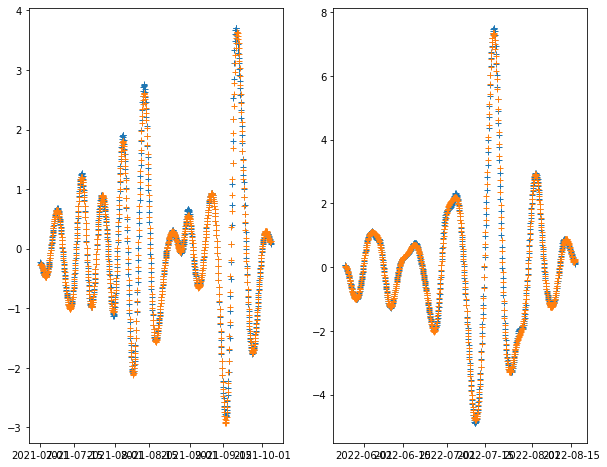

In [111]:
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(10,8))
ax1.plot(df_filter_3D_Runoff_melt_2021['TIMESTAMP'], df_filter_3D_Runoff_melt_2021['Runoff'], '+')
ax1.plot(df_filter_3D_Runoff_melt_2021['TIMESTAMP'], filterbandpass_Runoff_smooth_melt_2021, '+')

ax2.plot(df_filter_3D_Runoff_melt_2022['TIMESTAMP'], df_filter_3D_Runoff_melt_2022['Runoff'], '+')
ax2.plot(df_filter_3D_Runoff_melt_2022['TIMESTAMP'], filterbandpass_Runoff_smooth_melt_2022, '+')

In [112]:
ii_up_Runoff_3D_melt_2021

array([ 17,  98, 169, 241, 308, 383, 464, 525, 615, 705, 764])

In [113]:
for d in np.arange(0, len(df)):
    df_temp = df[d]
    df_temp.reset_index(inplace=True)
    globals()[f'index_Runoff_3D_{name[d]}'] = []
    
    globals()[f'ii_up_Runoff_3D_{name[d]}'] = np.insert(globals()[f'ii_up_Runoff_3D_{name[d]}'], 0, globals()[f'df_filter_3D_Runoff_{name[d]}'].index[0])
    globals()[f'index_Runoff_3D_{name[d]}'] = np.append(globals()[f'ii_up_Runoff_3D_{name[d]}'], globals()[f'df_filter_3D_Runoff_{name[d]}'].index[-1])
    
    
    
    # if globals()[f'ii_down_Runoff_3D_{name[d]}'][0] > globals()[f'ii_up_Runoff_3D_{name[d]}'][0]:
    #     globals()[f'i_up_Runoff_3D_{name[d]}'] = np.append(globals()[f'ii_up_Runoff_3D_{name[d]}'], df_temp.index[-1])
    #     globals()[f'index_Runoff_3D_{name[d]}'] = np.insert(globals()[f'i_up_Runoff_3D_{name[d]}'], 0, 0)
    # else:
    #     globals()[f'i_down_Runoff_3D_{name[d]}'] = np.append(globals()[f'ii_down_Runoff_3D_{name[d]}'], df_temp.index[-1])
    #     globals()[f'index_Runoff_3D_{name[d]}'] = np.insert(globals()[f'i_down_Runoff_3D_{name[d]}'], 0, 0)


In [114]:
df_filter_3D_Runoff_melt_2021

TIMESTAMP    Runoff  Runoff trend
0   2021-07-01 00:00:00 -0.227692      3.904267
1   2021-07-01 03:00:00 -0.239892      3.892068
2   2021-07-01 06:00:00 -0.253082      3.878878
3   2021-07-01 09:00:00 -0.268535      3.863424
4   2021-07-01 12:00:00 -0.286487      3.845472
..                  ...       ...           ...
763 2021-10-04 09:00:00  0.143586      4.275545
764 2021-10-04 12:00:00  0.126476      4.258435
765 2021-10-04 15:00:00  0.109661      4.241620
766 2021-10-04 18:00:00  0.093357      4.225316
767 2021-10-04 21:00:00  0.077765      4.209724

[768 rows x 3 columns]

In [115]:
index_Runoff_3D_melt_2021

array([  0,  17,  98, 169, 241, 308, 383, 464, 525, 615, 705, 764, 767])

In [116]:
# for i in index_Runoff_3D_melt_2021.tolist():
#     time_event_2021=[]
#     y_2021 = []
#     time_event_2021.append(df_filter_3D_Runoff_melt_2021['TIMESTAMP'][i])
#     y_2021.append(0)

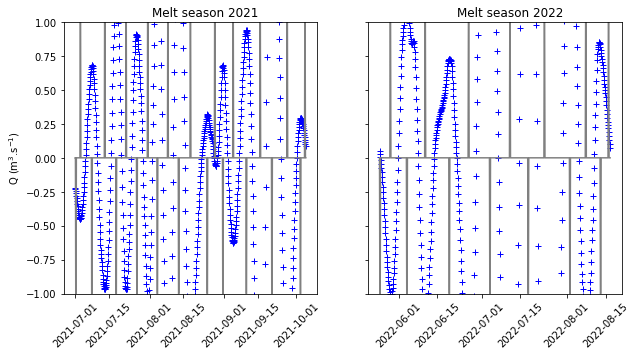

In [117]:
# %matplotlib widget
fig, axs = plt.subplots(1, 2, figsize=(10,5), sharey=True)
axs[0].plot(df_filter_3D_Runoff_melt_2021['TIMESTAMP'], 
            df_filter_3D_Runoff_melt_2021['Runoff']-df_filter_3D_Runoff_melt_2021['Runoff'].mean(), 'b+')
axs[0].plot(df_filter_3D_Runoff_melt_2021['TIMESTAMP'],filterbandpass_Runoff_2der_melt_2021, 'grey')
axs[0].tick_params('x', rotation=45)
axs[0].set_ylabel('Q (m$^3$.s$^{-1}$)')
axs[0].set_ylim([-1, 1])


axs[1].plot(df_filter_3D_Runoff_melt_2022['TIMESTAMP'],
            df_filter_3D_Runoff_melt_2022['Runoff']-df_filter_3D_Runoff_melt_2022['Runoff'].mean(), 'b+')
axs[1].plot(df_filter_3D_Runoff_melt_2022['TIMESTAMP'],filterbandpass_Runoff_2der_melt_2022, 'grey')
axs[1].tick_params('x', rotation=45)
axs[1].set_ylim([-1, 1])


axs[0].text(0.35, 1.02, 'Melt season 2021', 
    color='k', 
    fontsize=12, 
    transform=axs[0].transAxes)
axs[1].text(0.35, 1.02, 'Melt season 2022', 
    color='k', 
    fontsize=12, 
    transform=axs[1].transAxes)

plt.savefig(path_fig_export+'event_runoff.pdf', bbox_inches='tight')

In [118]:
filterbandpass_Runoff_2der_melt_2021

array([ 0.,  0., -1., -1.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,
        0.,  0.,  0.,  0.,  1.,  1.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,
        0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,
        0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,
        0.,  0.,  0., -1., -1.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,
        0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,
        0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,
        0.,  0.,  0.,  0.,  0.,  0.,  0.,  1.,  1.,  0.,  0.,  0.,  0.,
        0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,
        0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,
        0.,  0.,  0.,  0.,  0.,  0., -1., -1.,  0.,  0.,  0.,  0.,  0.,
        0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,
        0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,
        1.,  1.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0

In [119]:
index_Runoff_3D_melt_2021

array([  0,  17,  98, 169, 241, 308, 383, 464, 525, 615, 705, 764, 767])

In [120]:
ii_up_Runoff_3D_melt_2021

array([  0,  17,  98, 169, 241, 308, 383, 464, 525, 615, 705, 764])

# Create a dataframe to save every event

## Create a dataframe to save time of every event

In [121]:
df_melt_2021

index     Time           TIMESTAMP          L        Pe       P3_10  \
0      128   16.000 2021-07-01 00:00:00  95.343681  2.910845 -176.429602   
1      129   16.125 2021-07-01 03:00:00  95.327061  2.913258 -176.929432   
2      130   16.250 2021-07-01 06:00:00  95.255476  2.915607 -177.186138   
3      131   16.375 2021-07-01 09:00:00  95.201321  2.917524 -176.918924   
4      132   16.500 2021-07-01 12:00:00  95.146242  2.919731 -177.006568   
..     ...      ...                 ...        ...       ...         ...   
763    891  111.375 2021-10-04 09:00:00  72.668144  2.618755 -177.875939   
764    892  111.500 2021-10-04 12:00:00  72.848286  2.620269 -177.888632   
765    893  111.625 2021-10-04 15:00:00  72.622734  2.621790 -176.810488   
766    894  111.750 2021-10-04 18:00:00  72.511203  2.623406 -176.106772   
767    895  111.875 2021-10-04 21:00:00  72.865749  2.625247 -176.933639   

         P30_45         R         S    Runoff  
0   -184.669361       NaN       NaN  0.449876  
1   -184.786684  2.780367  0.355130  0.821738  
2   -184.835858  3.746705  0.223936  1.682886  
3   -184.832795  4.296542  0.179636  1.770574  
4   -184.806039  4.080946  0.191817  1.233248  
..          ...       ...       ...       ...  
763 -185.376275       NaN       NaN  0.173252  
764 -185.594885       NaN       NaN  0.157165  
765 -184.604488       NaN       NaN  0.154683  
766 -185.045972       NaN       NaN  0.158233  
767 -185.020343       NaN       NaN  0.151036  

[768 rows x 10 columns]

In [122]:
ii_up_Runoff_3D_melt_2021

array([  0,  17,  98, 169, 241, 308, 383, 464, 525, 615, 705, 764])

In [123]:
index_Runoff_3D_melt_2021

array([  0,  17,  98, 169, 241, 308, 383, 464, 525, 615, 705, 764, 767])

In [124]:
df=[df_melt_2021, df_melt_2022]
for d in np.arange(0, len(name)):
    df_temp=df[d]
    dt=[]
    start=[]
    stop=[]

    for i in np.arange(0, len(globals()[f'index_Runoff_3D_{name[d]}'])-1):
        # print(globals()[f'index_Runoff_3D_{name[d]}'][i])
        start.append(df_temp['TIMESTAMP'][globals()[f'index_Runoff_3D_{name[d]}'][i]])
        stop.append(df_temp['TIMESTAMP'][globals()[f'index_Runoff_3D_{name[d]}'][i+1]])
        dt.append(df_temp['TIMESTAMP'][globals()[f'index_Runoff_3D_{name[d]}'][i+1]]-
                  df_temp['TIMESTAMP'][globals()[f'index_Runoff_3D_{name[d]}'][i]])

    globals()[f'df_event_time_{name[d]}']=pd.DataFrame({'Event': np.arange(0,len(globals()[f'index_Runoff_3D_{name[d]}'])-1),'Start':start, 'Stop':stop, 'Duration':dt})

In [125]:
for d in np.arange(0, len(name)):
    globals()[f'df_event_time_{name[d]}'].to_csv(path_df_export+f'/Event_3D/{name[d]}/df_event_time_{name[d]}.csv')

# Calculate metrics for every events

## Coeff variations

In [126]:
for d in np.arange(0, len(name)):
    
    for j in np.arange(3, len(df_melt_2021.columns)):
        
        df_temp=globals()[f'df_filter_3D_{df_melt_2021.columns[j]}_{name[d]}']
        globals()[f'cv_{df_temp.columns[1]}_{name[d]}']=[]
            
        for i in np.arange(0, len(globals()[f'index_Runoff_3D_{name[d]}'])-1):

            idx1 = globals()[f'index_Runoff_3D_{name[d]}'][i]
            idx2 = globals()[f'index_Runoff_3D_{name[d]}'][i+1]

            std = np.std(df_temp[df_temp.columns[1]][idx1:idx2])
            mean = np.mean(df_temp[df_temp.columns[1]][idx1:idx2])
            
            globals()[f'cv_{df_temp.columns[1]}_{name[d]}'].append(std/mean)
            

## Uniform length of event and normalise data to calculate hysteresis

In [127]:
for d in np.arange(0, len(df)):
    for j in np.arange(3, len(df_melt_2021.columns)):
        globals()[f'df_filter_3D_{df_melt_2021.columns[j]}_{name[d]}'].reset_index(inplace=True)

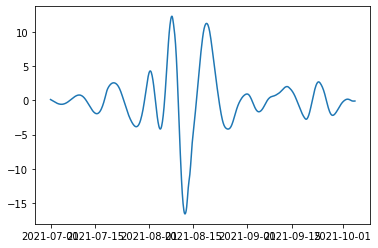

In [128]:
fig, ax = plt.subplots()
ax.plot(df_filter_3D_L_melt_2021['TIMESTAMP'], df_filter_3D_L_melt_2021['L'])

### Uniform length

In [129]:
f = int(np.ceil(10))
a=f -1 if f % 2 == 0 else f
a

9

In [130]:
df=[df_melt_2021, df_melt_2022]
x_int=50

for d in np.arange(0, len(df)):
    df_temp = df[d]
    
    for j in np.arange(3, len(df_temp.columns)):
        df_temp_3D_runoff=globals()[f'df_filter_3D_Runoff_{name[d]}']
        df_temp_3D=globals()[f'df_filter_3D_{df_temp.columns[j]}_{name[d]}']
        
        # df_temp_3D_runoff.reset_index(inplace=True)
        # df_temp_3D.reset_index(inplace=True)

        
        for i in np.arange(0, len(globals()[f'index_Runoff_3D_{name[d]}'])-1):
            idx1=globals()[f'index_Runoff_3D_{name[d]}'][i]
            idx2=globals()[f'index_Runoff_3D_{name[d]}'][i+1]
            
            globals()[f'event_Runoff_{name[d]}_{i}']=[]
            globals()[f'event_{df_temp_3D.columns[2]}_{name[d]}_{i}']=[]
            
            globals()[f'event_Runoff_{name[d]}_orig_{i}']=[]
            globals()[f'event_{df_temp_3D.columns[2]}_{name[d]}_orig_{i}']=[]
            
            # print(idx1, idx2)
            # print(df_temp_3D.columns[2])

            x=np.arange(idx1, idx2)
            y=df_temp_3D_runoff['Runoff'][idx1:idx2]
            y2=df_temp_3D[df_temp_3D.columns[2]][idx1:idx2]
            # f=sp.interp1d(x, y, kind='cubic', fill_value='extrapolate')
            f = signal.resample(y, x_int)
            # print(len(y2))
            if len(y2)!=0:
                f2= signal.resample(y2, x_int)
            else:
                f2=np.nan
            # print(len(y), len(y2))
            # print(len(y), len(y2))

            
            if len(y)== len(y2):
                
                window=len(f) -1 if len(f) % 2 == 0 else len(f)
                window2=len(f2) -1 if len(f) % 2 == 0 else len(f2)
                
                
                
                globals()[f'event_Runoff_{name[d]}_orig_{i}'].append(y)
                globals()[f'event_{df_temp_3D.columns[2]}_{name[d]}_orig_{i}'].append(y2)

                globals()[f'event_Runoff_{name[d]}_{i}'].append(scipy.signal.savgol_filter(f, window, 6))
                globals()[f'event_{df_temp_3D.columns[2]}_{name[d]}_{i}'].append(scipy.signal.savgol_filter(f2, window2, 6))
            
            # globals()[f'df_event_{name[d]}_{i}']=pd.DataFrame({'Runoff':globals()[f'event_Runoff_{name[d]}_{i}'][0]})
#             var = pd.DataFrame({str(df_temp_3D.columns[2]):globals()[f'event_{df_temp_3D.columns[2]}_{name[d]}_{i}']})
            
#             globals()[f'df_event_{name[d]}_{i}'] = pd.concat([globals()[f'df_event_{name[d]}_{i}'], var], axis=1)
            
            

In [131]:
len(event_Runoff_melt_2021_0[0])

50

In [132]:
# fig, axs = plt.subplots(1, 2)
# L=scipy.signal.savgol_filter(event_R_melt_2022_5[0], 15, 2)
# Runoff=scipy.signal.savgol_filter(event_Runoff_melt_2022_5[0], 15, 2)

# print(len(L))
# print(len(Runoff))

# ax.plot(np.arange(0, len(event_L_melt_2022_orig_10[0])), event_Runoff_melt_2022_orig_10[0], 'r')
# axs[0].plot(np.arange(0, len(event_Pe_melt_2022_15[0])), event_Runoff_melt_2022_15[0], 'k')
# ax1=axs[0].twinx()
# ax1.plot(np.arange(0, len(event_Pe_melt_2022_15[0])), event_Pe_melt_2022_15[0], 'r')

# axs[1].plot(np.arange(0, len(event_Pe_melt_2022_orig_15[0])), event_Runoff_melt_2022_orig_15[0], 'k')
# ax1=axs[1].twinx()
# ax1.plot(np.arange(0, len(event_Pe_melt_2022_orig_15[0])), event_Pe_melt_2022_orig_15[0], 'r')
# plt.tight_layout()

In [133]:
df=[df_melt_2021, df_melt_2022]

for d in np.arange(0, len(df)):
    df_temp = df[d]
    
    for i in np.arange(0, len(globals()[f'index_Runoff_3D_{name[d]}'])-1):
        # globals()[f'df_event_{name[d]}_{i}']=pd.DataFrame({'Runoff':globals()[f'event_Runoff_{name[d]}_{i}'][0]})
        globals()[f'df_event_{name[d]}_{i}']=pd.DataFrame()
        
        for j in np.arange(3, len(df_temp.columns)):
            # print(i, df_temp.columns[j])
            
                # print(i, df_temp.columns[j])
            if len(globals()[f'event_{df_temp.columns[j]}_{name[d]}_{i}'])>0:
                l=globals()[f'event_{df_temp.columns[j]}_{name[d]}_{i}'][0]
                var = pd.DataFrame({str(df_temp.columns[j]):pd.Series(l)})
                globals()[f'df_event_{name[d]}_{i}']=pd.concat([globals()[f'df_event_{name[d]}_{i}'],var], axis=1)
            else:
                n=pd.DataFrame({str(df_temp.columns[j]):np.repeat(np.nan, len(globals()[f'index_Runoff_3D_{name[d]}'])-1)})
                
                # print(n)
                globals()[f'df_event_{name[d]}_{i}']=pd.concat([globals()[f'df_event_{name[d]}_{i}'],n], axis=1)

### Normalise data

In [134]:
# df_event_melt_2021_13

In [135]:
for d in np.arange(0, len(df)):
    
    for i in np.arange(0, len(globals()[f'index_Runoff_3D_{name[d]}'])-1):
        df_temp = globals()[f'df_event_{name[d]}_{i}']
        
        globals()[f'df_event_{name[d]}_norm_{i}']=pd.DataFrame()
        
        for k in np.arange(0, len(df_temp.columns)):
            globals()[f'event_{df_temp.columns[k]}_{name[d]}_norm_{i}']=[]
            
            for j in np.arange(0,x_int):
                # print(i, df_temp.columns[k], j)
                # print(df_temp[df_temp.columns[k]])
                globals()[f'event_{df_temp.columns[k]}_{name[d]}_norm_{i}'].append((df_temp[df_temp.columns[k]][j]
                                                                                    -np.nanmin(df_temp[df_temp.columns[k]]))
                                                                                    /(np.nanmax(df_temp[df_temp.columns[k]])
                                                                                    -np.nanmin(df_temp[df_temp.columns[k]])))
            # print(globals()[f'event_{df_temp.columns[k]}_{name[d]}_norm_{i}'])
            var = pd.DataFrame({str(df_temp.columns[k]):pd.Series(globals()[f'event_{df_temp.columns[k]}_{name[d]}_norm_{i}'])})
            # print(var)
            globals()[f'df_event_{name[d]}_norm_{i}']=pd.concat([globals()[f'df_event_{name[d]}_norm_{i}'], var], axis=1)
            globals()[f'df_event_{name[d]}_norm_{i}'].to_csv(path_df_export+f'Event_3D/{name[d]}/normalise_length/df_event_{name[d]}_norm_{i}.csv')

<ipython-input-135-6718d2342da9>:15: RuntimeWarning: All-NaN axis encountered
  -np.nanmin(df_temp[df_temp.columns[k]]))
<ipython-input-135-6718d2342da9>:16: RuntimeWarning: All-NaN axis encountered
  /(np.nanmax(df_temp[df_temp.columns[k]])
<ipython-input-135-6718d2342da9>:17: RuntimeWarning: All-NaN axis encountered
  -np.nanmin(df_temp[df_temp.columns[k]])))


## Calculate hysteresis

In [136]:
# df_event_melt_2022_norm_26=df_event_melt_2022_norm_26.replace('NaN', np.nan)

In [137]:
for d in np.arange(0, len(df)):
    
    for j in np.arange(0, len(df_temp.columns)-1):
        globals()[f'theta_{name[d]}_{df_temp.columns[j]}']=[]

        for i in np.arange(0, len(globals()[f'index_Runoff_3D_{name[d]}'])-1):
        # for i in np.arange(0, 1):
            # print(i)
            df_temp = globals()[f'df_event_{name[d]}_norm_{i}']


            max_x_r=df_temp['Runoff'].idxmax()
            max_x_v=df_temp.shape[0]
            

            if max_x_r is np.nan:
                
                globals()[f'theta_{name[d]}_{df_temp.columns[j]}'].append(np.nan)

            else:
                sample2=df_temp[df_temp.columns[j]][max_x_r:max_x_v]
                
                if max_x_r!=0:
                    sample1=df_temp[df_temp.columns[j]][0:max_x_r]
                    rising=np.nanmean(sample1)
                    falling=np.nanmean(sample2)

                else:
                    rising=df_temp[df_temp.columns[j]][0]
                    falling=np.nanmean(sample2)
            
                globals()[f'theta_{name[d]}_{df_temp.columns[j]}'].append((rising-falling)/falling)

<ipython-input-137-f82d27a7f0d9>:25: RuntimeWarning: Mean of empty slice
  rising=np.nanmean(sample1)
<ipython-input-137-f82d27a7f0d9>:26: RuntimeWarning: Mean of empty slice
  falling=np.nanmean(sample2)
<ipython-input-137-f82d27a7f0d9>:30: RuntimeWarning: Mean of empty slice
  falling=np.nanmean(sample2)


In [138]:
theta_melt_2021_L

[1.2406352150657318,
 -0.7054026651995071,
 -0.8504847039055291,
 1.8339949230243395,
 -0.24735168820215428,
 -0.05813021514304515,
 21.69176569926614,
 -0.04891225280124083,
 -0.5725054127218018,
 -0.6565173869617457,
 -0.47797099366158646,
 -0.8518855823783811]

# Create dataframe metrics

In [139]:
df_melt_2021

index     Time           TIMESTAMP          L        Pe       P3_10  \
0      128   16.000 2021-07-01 00:00:00  95.343681  2.910845 -176.429602   
1      129   16.125 2021-07-01 03:00:00  95.327061  2.913258 -176.929432   
2      130   16.250 2021-07-01 06:00:00  95.255476  2.915607 -177.186138   
3      131   16.375 2021-07-01 09:00:00  95.201321  2.917524 -176.918924   
4      132   16.500 2021-07-01 12:00:00  95.146242  2.919731 -177.006568   
..     ...      ...                 ...        ...       ...         ...   
763    891  111.375 2021-10-04 09:00:00  72.668144  2.618755 -177.875939   
764    892  111.500 2021-10-04 12:00:00  72.848286  2.620269 -177.888632   
765    893  111.625 2021-10-04 15:00:00  72.622734  2.621790 -176.810488   
766    894  111.750 2021-10-04 18:00:00  72.511203  2.623406 -176.106772   
767    895  111.875 2021-10-04 21:00:00  72.865749  2.625247 -176.933639   

         P30_45         R         S    Runoff  
0   -184.669361       NaN       NaN  0.449876  
1   -184.786684  2.780367  0.355130  0.821738  
2   -184.835858  3.746705  0.223936  1.682886  
3   -184.832795  4.296542  0.179636  1.770574  
4   -184.806039  4.080946  0.191817  1.233248  
..          ...       ...       ...       ...  
763 -185.376275       NaN       NaN  0.173252  
764 -185.594885       NaN       NaN  0.157165  
765 -184.604488       NaN       NaN  0.154683  
766 -185.045972       NaN       NaN  0.158233  
767 -185.020343       NaN       NaN  0.151036  

[768 rows x 10 columns]

In [140]:
for d in np.arange(0, len(df)):
    len(theta_melt_2021_L)
    
    globals()[f'df_cv_{name[d]}']=pd.DataFrame({'Event':np.arange(0, len(globals()[f'theta_{name[d]}_L']))})
    globals()[f'df_theta_{name[d]}']=pd.DataFrame({'Event':np.arange(0, len(globals()[f'theta_{name[d]}_L']))})

    df_temp=df[d]
    for j in np.arange(3, len(df_temp.columns)-1):
        
        cv = globals()[f'cv_{df_temp.columns[j]}_{name[d]}']
        df_cv = pd.DataFrame({str(df_temp.columns[j]):cv})
        
        theta = globals()[f'theta_{name[d]}_{df_temp.columns[j]}']
        
        df_theta = pd.DataFrame({str(df_temp.columns[j]):theta})
        
        
        globals()[f'df_cv_{name[d]}']=pd.concat([globals()[f'df_cv_{name[d]}'], df_cv], axis=1)
        globals()[f'df_theta_{name[d]}']=pd.concat([globals()[f'df_theta_{name[d]}'], df_theta], axis=1)
    
    theta = globals()[f'df_theta_{name[d]}'][['L', 'Pe', 'P3_10', 'P30_45','R', 'S']]
    globals()[f'df_metrics_{name[d]}']=pd.concat([globals()[f'df_cv_{name[d]}'], theta], axis=1)
    
    globals()[f'df_cv_{name[d]}'].to_csv(path_df_export+f'/Event_3D/{name[d]}/df_event_cv_{name[d]}.csv')
    globals()[f'df_theta_{name[d]}'].to_csv(path_df_export+f'/Event_3D/{name[d]}/df_event_theta_{name[d]}.csv')
    globals()[f'df_metrics_{name[d]}'].to_csv(path_df_export+f'/Event_3D/{name[d]}/df_event_metrics_{name[d]}.csv')

In [141]:
df_metrics_melt_2022

Event         L         Pe      P3_10     P30_45          R          S  \
0      0 -1.372430  -0.689943   0.280041   0.838004  -0.000000   0.000000   
1      1  7.132864  -9.653700   4.575865   3.670954   3.508175 -25.425775   
2      2 -7.740563  14.384453  -3.275190  -4.707172 -11.016369 -11.083177   
3      3  7.998839   8.613599  -6.484867  -9.025209  37.187330  -1.673630   
4      4  3.915712   1.046195  11.335139  11.270611   2.648694 -11.004044   
5      5 -3.093374 -11.918667   2.238268   3.343738  -1.691296  22.810307   
6      6 -1.297986  -6.105975        NaN        NaN        NaN        NaN   
7      7 -0.151007   0.373524        NaN        NaN        NaN        NaN   

          L        Pe     P3_10    P30_45         R         S  
0 -0.955283  1.150119 -0.430234  0.278978       NaN       NaN  
1  0.572305  0.732956 -0.828113 -0.905839       NaN       NaN  
2  0.150555  1.532856 -0.628055 -0.695050  0.608319 -0.651361  
3  0.323396  2.825105  0.413424 -0.169421  0.348128 -0.076975  
4 -0.584153  0.112652  0.194235  0.075811 -0.179892  0.615115  
5       NaN       NaN       NaN       NaN       NaN       NaN  
6  1.446961 -0.395939       NaN       NaN       NaN       NaN  
7 -0.819245  1.080160       NaN       NaN       NaN       NaN

## Normalise CV and theta to compare them

In [142]:
np.max(df_theta_melt_2021['L'][np.isfinite(df_theta_melt_2021['L'])])

21.69176569926614

In [143]:
for d in np.arange(0, len(df)):
    df_temp_cv=globals()[f'df_cv_{name[d]}']
    df_temp_theta=globals()[f'df_theta_{name[d]}']
    
    globals()[f'df_theta_norm_{name[d]}']=pd.DataFrame()
    globals()[f'df_cv_norm_{name[d]}']=pd.DataFrame()
    
    for j in np.arange(1, len(df_temp_theta.columns)):
        globals()[f'theta_{df_temp_theta.columns[j]}_{name[d]}_norm']=[]
        globals()[f'cv_{df_temp_cv.columns[j]}_{name[d]}_norm']=[]
        
        for i in np.arange(0, df_temp_theta.shape[0]):
            globals()[f'theta_{df_temp_theta.columns[j]}_{name[d]}_norm'].append(df_temp_theta[df_temp_theta.columns[j]][i]
                                                              /df_temp_theta[df_temp_theta.columns[j]]
                                                                                 [np.isfinite(df_temp_theta[df_temp_theta.columns[j]])].max())
            # print(globals()[f'theta_{df_temp_theta.columns[j]}_{name[d]}_norm']-df_temp_theta[df_temp_theta.columns[j]])
            globals()[f'cv_{df_temp_cv.columns[j]}_{name[d]}_norm'].append((df_temp_cv[df_temp_cv.columns[j]][i]-df_temp_cv[df_temp_cv.columns[j]]
                                                                                 [np.isfinite(df_temp_cv[df_temp_cv.columns[j]])].min())
                                                              /(df_temp_cv[df_temp_cv.columns[j]]
                                                                                 [np.isfinite(df_temp_cv[df_temp_cv.columns[j]])].max()-
                                                                df_temp_cv[df_temp_cv.columns[j]]
                                                                                 [np.isfinite(df_temp_cv[df_temp_cv.columns[j]])].min()))
        # print(globals()[f'theta_{df_temp_theta.columns[j]}_{name[d]}_norm'])
        # t = pd.Series(globals()[f'theta_{df_temp_theta.columns[j]}_{name[d]}_norm'])
        theta = pd.DataFrame({str(df_temp_theta.columns[j]):globals()[f'theta_{df_temp_theta.columns[j]}_{name[d]}_norm']})
        cv = pd.DataFrame({str(df_temp_cv.columns[j]):globals()[f'cv_{df_temp_cv.columns[j]}_{name[d]}_norm']})
        
        globals()[f'df_theta_norm_{name[d]}']=pd.concat([globals()[f'df_theta_norm_{name[d]}'], theta], axis=1)
        globals()[f'df_cv_norm_{name[d]}']=pd.concat([globals()[f'df_cv_norm_{name[d]}'], cv], axis=1)
    
    theta_norm = globals()[f'df_theta_norm_{name[d]}'][['L', 'Pe', 'P3_10', 'P30_45',
       'R', 'S']]
    globals()[f'df_metrics_norm_{name[d]}']=pd.concat([globals()[f'df_cv_norm_{name[d]}'], theta_norm], axis=1)
    
    globals()[f'df_cv_norm_{name[d]}'].to_csv(path_df_export+f'/Event_3D/{name[d]}/df_event_cv_norm_{name[d]}.csv')
    globals()[f'df_theta_norm_{name[d]}'].to_csv(path_df_export+f'/Event_3D/{name[d]}/df_event_theta_norm_{name[d]}.csv')
    globals()[f'df_metrics_norm_{name[d]}'].to_csv(path_df_export+f'/Event_3D/{name[d]}/df_event_metrics_norm_{name[d]}.csv')

In [144]:
df_theta_norm_melt_2022

L        Pe     P3_10    P30_45         R         S
0 -0.660200  0.407107 -1.040661  1.000000       NaN       NaN
1  0.395522  0.259444 -2.003061 -3.246991       NaN       NaN
2  0.104049  0.542584 -1.519156 -2.491413  1.000000 -1.058926
3  0.223500  1.000000  1.000000 -0.607291  0.572279 -0.125139
4 -0.403710  0.039875  0.469821  0.271746 -0.295719  1.000000
5       NaN       NaN       NaN       NaN       NaN       NaN
6  1.000000 -0.140150       NaN       NaN       NaN       NaN
7 -0.566183  0.382343       NaN       NaN       NaN       NaN

In [145]:
for d in np.arange(0, len(df)):
    
    globals()[f'df_theta_norm_{name[d]}'].index = globals()[f'df_event_time_{name[d]}']['Start'] 
    globals()[f'df_cv_norm_{name[d]}'].index = globals()[f'df_event_time_{name[d]}']['Start'] 


In [146]:
for d in np.arange(0, len(df)):
    globals()[f'df_theta_norm_{name[d]}'].index=globals()[f'df_theta_norm_{name[d]}'].index.format(formatter=lambda x: x.strftime('%d-%m-%Y'))
    globals()[f'df_cv_norm_{name[d]}'].index=globals()[f'df_cv_norm_{name[d]}'].index.format(formatter=lambda x: x.strftime('%d-%m-%Y'))


In [147]:
df_theta_melt_2022

Event         L        Pe     P3_10    P30_45         R         S
0      0 -0.955283  1.150119 -0.430234  0.278978       NaN       NaN
1      1  0.572305  0.732956 -0.828113 -0.905839       NaN       NaN
2      2  0.150555  1.532856 -0.628055 -0.695050  0.608319 -0.651361
3      3  0.323396  2.825105  0.413424 -0.169421  0.348128 -0.076975
4      4 -0.584153  0.112652  0.194235  0.075811 -0.179892  0.615115
5      5       NaN       NaN       NaN       NaN       NaN       NaN
6      6  1.446961 -0.395939       NaN       NaN       NaN       NaN
7      7 -0.819245  1.080160       NaN       NaN       NaN       NaN

# Plot event/ hysteresis with metrics

In [148]:
df_theta_melt_2022

Event         L        Pe     P3_10    P30_45         R         S
0      0 -0.955283  1.150119 -0.430234  0.278978       NaN       NaN
1      1  0.572305  0.732956 -0.828113 -0.905839       NaN       NaN
2      2  0.150555  1.532856 -0.628055 -0.695050  0.608319 -0.651361
3      3  0.323396  2.825105  0.413424 -0.169421  0.348128 -0.076975
4      4 -0.584153  0.112652  0.194235  0.075811 -0.179892  0.615115
5      5       NaN       NaN       NaN       NaN       NaN       NaN
6      6  1.446961 -0.395939       NaN       NaN       NaN       NaN
7      7 -0.819245  1.080160       NaN       NaN       NaN       NaN

In [149]:
path_df_export

'/home/colili/Documents/PhD/ploughmeter_project/processing_2122/Dataframe_produced/Dataframe_clean/season_3D/'

# Plot every event

In [150]:
color = ['maroon', 'darkgreen', 'orange', 'darkgoldenrod', 'indigo', 'deeppink', 'b',]
label = ['L (N)', 'Pe (MPa)', 'P [3-10] (dB)', 'P [30-45 Hz] (dB)', 'R/R$_{ref}$', 'S/S$_{ref}$', 'Q (m$^3$.s$^{-1}$)']
for d in np.arange(0, len(df)):
    globals()[f'df_sum_{name[d]}']=pd.DataFrame()
    globals()[f'df_slope_{name[d]}']=pd.DataFrame()

    
    
    for i in np.arange(0, len(globals()[f'index_Runoff_3D_{name[d]}'])-1):
    # for i in np.arange(0, 1):
        fig, axs = plt.subplots(2, 6, figsize=(20,4), sharey=True)
        
        df_temp_theta = globals()[f'df_theta_{name[d]}']
        df_temp_cv = globals()[f'df_cv_{name[d]}']
        
        globals()[f's_{i}']=pd.DataFrame()
        globals()[f'm_{i}']=pd.DataFrame()

        
        for j in np.arange(1, len(df_temp_theta.columns)):
            # print(j, df_temp_theta.columns[j])
            df_event=globals()[f'df_event_{name[d]}_norm_{i}']
            
            axs[0][j-1].plot(np.arange(0, x_int), df_event['Runoff'], color='b')
            axs[0][j-1].set_ylabel('Runoff')
            ax1=axs[0][j-1].twinx()
            ax1.plot(np.arange(0, x_int), df_event[str(df_temp_theta.columns[j])], color=color[j-1])
            axs[0][j-1].set_ylabel(str(df_temp_theta.columns[j]))
            
            theta = round(df_temp_theta[str(df_temp_theta.columns[j])][i], 2)
            cv = round(df_temp_cv[str(df_temp_cv.columns[j])][i], 4)
            area=round(np.sum(df_event[str(df_temp_theta.columns[j])]-df_event['Runoff']), 2)
            
            axs[0][j-1].text(0.35, 1.1, f'Theta:{theta}, CV:{cv}', color='k', transform=axs[0][j-1].transAxes)
            
            p, res, _, _, _=np.polyfit(df_event['Runoff'], df_event[str(df_temp_theta.columns[j])], 1, full=True)
            
            s, inter = np.poly1d(np.polyfit(df_event['Runoff'], df_event[str(df_temp_theta.columns[j])], 1))
            axs[1][j-1].scatter(df_event['Runoff'], df_event[str(df_temp_theta.columns[j])], cmap='viridis', c=range(x_int))
            axs[1][j-1].plot(np.unique(df_event['Runoff']), 
                             np.poly1d(np.polyfit(df_event['Runoff'],
                                                  df_event[str(df_temp_theta.columns[j])], 1))(np.unique(df_event['Runoff'])), 'k')
            axs[1][j-1].set_xlabel('Runoff')
            axs[1][j-1].set_ylabel(str(df_temp_theta.columns[j]))
            axs[1][j-1].text(0.35, 1.1, f'Slope:{round(s, 2)}, Sum:{round(res[0], 2)}', color='k', transform=axs[1][j-1].transAxes)
            
            # print(s)
            s_temp = pd.DataFrame({str(df_temp_theta.columns[j]):round(res[0], 2)}, index=[i])
            slope_temp=pd.DataFrame({str(df_temp_theta.columns[j]):round(s, 2)}, index=[i])
            globals()[f's_{i}']=pd.concat([globals()[f's_{i}'], s_temp], axis=1)
            globals()[f'm_{i}']=pd.concat([globals()[f'm_{i}'], slope_temp], axis=1)

        
        globals()[f'df_sum_{name[d]}']=pd.concat([globals()[f'df_sum_{name[d]}'], globals()[f's_{i}']])
        globals()[f'df_sum_{name[d]}'].to_csv(path_df_export+f'Event_3D/{name[d]}/df_sum_{name[d]}.csv')
        
        globals()[f'df_slope_{name[d]}']=pd.concat([globals()[f'df_slope_{name[d]}'], globals()[f'm_{i}']])
        globals()[f'df_slope_{name[d]}'].to_csv(path_df_export+f'Event_3D/{name[d]}/df_slope_{name[d]}.csv')
        
        plt.tight_layout()    
        plt.savefig(path_fig_export+f'event_3D/{name[d]}/event_{i}.svg', bbox_inches='tight')
        plt.close()

In [151]:
df_sum_melt_2022

L    Pe  P3_10  P30_45     R     S
0  0.79  0.01   3.64    1.35   NaN   NaN
1  1.88  2.56   5.79    6.70   NaN   NaN
2  2.71  5.37   5.39    5.16  1.45  4.48
3  4.96  6.48   1.02    1.04  0.09  2.59
4  3.50  3.22   0.86    0.25  0.21  2.72
5   NaN   NaN    NaN     NaN   NaN   NaN
6  5.06  0.28    NaN     NaN   NaN   NaN
7  0.02  0.00    NaN     NaN   NaN   NaN

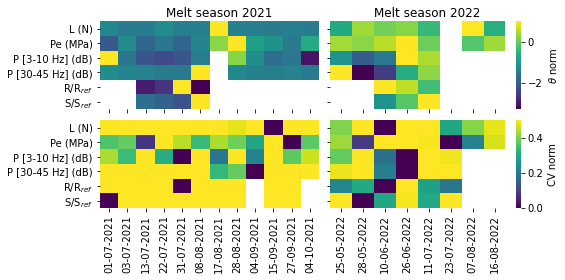

In [152]:
w, h = figaspect(.5)
fig, axs = plt.subplots(2, 2, figsize=(w, h), sharey=True)
y_axis_labels = ['L (N)', 'Pe (MPa)', 'P [3-10 Hz] (dB)', 'P [30-45 Hz] (dB)', 'R/R$_{ref}$', 'S/S$_{ref}$']
x_axis_labels = ['', '', '', '', '', '']


df_theta_norm_melt_2021_p = df_theta_norm_melt_2021[['L', 'Pe', 'P3_10', 'P30_45',
       'R', 'S']]

df_theta_norm_melt_2022_p = df_theta_norm_melt_2022[['L', 'Pe', 'P3_10', 'P30_45',
       'R', 'S']]

df_cv_norm_melt_2021_p = df_cv_norm_melt_2021[['L', 'Pe', 'P3_10', 'P30_45', 'R', 'S']]
df_cv_norm_melt_2022_p = df_cv_norm_melt_2022[['L', 'Pe', 'P3_10', 'P30_45', 'R', 'S']]


g1=sns.heatmap(df_theta_norm_melt_2021_p.T, cmap='viridis', ax=axs[0][0], vmax=1, yticklabels=y_axis_labels, cbar=False)
g2=sns.heatmap(df_cv_norm_melt_2021_p.T, cmap='viridis', ax=axs[1][0], vmin=0, vmax=0.5, yticklabels=y_axis_labels, cbar=False)

g3=sns.heatmap(df_theta_norm_melt_2022_p.T, cmap='viridis', ax=axs[0][1], vmax=1, yticklabels=y_axis_labels, cbar_kws={'label': r'$\theta$ norm'})
g4=sns.heatmap(df_cv_norm_melt_2022_p.T, cmap='viridis', ax=axs[1][1], vmin=0, vmax=0.5, yticklabels=y_axis_labels, cbar_kws={'label': r'CV norm'})

g1.set(xticklabels=[])
g3.set(xticklabels=[])



axs[0][0].text(0.3, 1.05, 'Melt season 2021', 
    color='k', 
    fontsize=12, 
    transform=axs[0][0].transAxes)
axs[0][1].text(0.25, 1.05, 'Melt season 2022', 
    color='k', 
    fontsize=12, 
    transform=axs[0][1].transAxes)

plt.tight_layout()
plt.savefig(path_fig_export+f'theta_cv.pdf', bbox_inches='tight')

# Make classes based on hysteresis values

In [153]:
for d in np.arange(0, len(df)):
    for n in globals()[f'df_theta_norm_{name[d]}'].columns:
        print(n)

L
Pe
P3_10
P30_45
R
S
L
Pe
P3_10
P30_45
R
S


In [154]:
for d in np.arange(0, len(df)):
    globals()[f'df_theta_norm_{name[d]}'].reset_index(inplace=True, drop=True)
    globals()[f'df_cv_norm_{name[d]}'].reset_index(inplace=True, drop=True)
    
    
    globals()[f'df_theta_norm_{name[d]}']['TIMESTAMP'] = globals()[f'df_event_time_{name[d]}']['Start'] 
    globals()[f'df_cv_norm_{name[d]}']['TIMESTAMP'] = globals()[f'df_event_time_{name[d]}']['Start'] 

In [155]:
df_theta_norm_melt_2022

L        Pe     P3_10    P30_45         R         S  \
0 -0.660200  0.407107 -1.040661  1.000000       NaN       NaN   
1  0.395522  0.259444 -2.003061 -3.246991       NaN       NaN   
2  0.104049  0.542584 -1.519156 -2.491413  1.000000 -1.058926   
3  0.223500  1.000000  1.000000 -0.607291  0.572279 -0.125139   
4 -0.403710  0.039875  0.469821  0.271746 -0.295719  1.000000   
5       NaN       NaN       NaN       NaN       NaN       NaN   
6  1.000000 -0.140150       NaN       NaN       NaN       NaN   
7 -0.566183  0.382343       NaN       NaN       NaN       NaN   

            TIMESTAMP  
0 2022-05-25 00:00:00  
1 2022-05-28 21:00:00  
2 2022-06-10 12:00:00  
3 2022-06-26 06:00:00  
4 2022-07-11 06:00:00  
5 2022-07-23 18:00:00  
6 2022-08-07 18:00:00  
7 2022-08-16 00:00:00

In [156]:
for d in np.arange(0, len(df)):
    df_temp=globals()[f'df_theta_norm_{name[d]}']
    df_temp_sum=globals()[f'df_sum_{name[d]}']
    df_temp_slope=globals()[f'df_slope_{name[d]}']


    
    for n in df_temp.columns[0:6]:
        # print(n)
        globals()[f'classI_{n}_{name[d]}_i'] = []
        globals()[f'classII_{n}_{name[d]}_i'] = []
        globals()[f'classIII_{n}_{name[d]}_i'] = []
        globals()[f'classIV_{n}_{name[d]}_i'] = []
        
        for i in np.arange(0, df_temp.shape[0]):

#             if df_temp[n][i]>0.1 :
#                 globals()[f'classI_{n}_{name[d]}_i'].append(df_temp['TIMESTAMP'][i])

#             elif (df_temp[n][i]<0.1) & (df_temp[n][i]>0):
#                 globals()[f'classII_{n}_{name[d]}_i'].append(df_temp['TIMESTAMP'][i])

#             elif df_temp[n][i]< -0.1:
#                 globals()[f'classIII_{n}_{name[d]}_i'].append(df_temp['TIMESTAMP'][i])

#             elif (df_temp[n][i]> -0.1) & (df_temp[n][i]<0):
#                 globals()[f'classIV_{n}_{name[d]}_i'].append(df_temp['TIMESTAMP'][i])
                              
            if (df_temp[n][i]>0) & (df_temp_sum[n][i]>2) :
                globals()[f'classI_{n}_{name[d]}_i'].append(df_temp['TIMESTAMP'][i])

            elif (df_temp[n][i]<0) & (df_temp_sum[n][i]>2):
                globals()[f'classII_{n}_{name[d]}_i'].append(df_temp['TIMESTAMP'][i])

            elif (df_temp_slope[n][i]>0) & (df_temp_sum[n][i]<2):
                globals()[f'classIII_{n}_{name[d]}_i'].append(df_temp['TIMESTAMP'][i])

            elif (df_temp_slope[n][i]< 0) & (df_temp_sum[n][i]<2):
                globals()[f'classIV_{n}_{name[d]}_i'].append(df_temp['TIMESTAMP'][i])

In [157]:
classII_L_melt_2021_i

[Timestamp('2021-07-03 03:00:00'),
 Timestamp('2021-07-13 06:00:00'),
 Timestamp('2021-09-04 15:00:00'),
 Timestamp('2021-09-15 21:00:00')]

In [158]:
df_event_time_melt_2021.shape[0]

12

In [159]:
for d in np.arange(0, len(df)):
    df_temp=globals()[f'df_theta_norm_{name[d]}']
    df_temp_time=globals()[f'df_event_time_{name[d]}']
    
    for n in df_temp.columns[0:6]:
        # print(n)
        globals()[f'classI_{n}_{name[d]}'] = []
        globals()[f'classII_{n}_{name[d]}'] = []
        globals()[f'classIII_{n}_{name[d]}'] = []
        globals()[f'classIV_{n}_{name[d]}'] = []

        for i in np.arange(0, len(globals()[f'classI_{n}_{name[d]}_i'])):
            for j in np.arange(0, df_temp_time.shape[0]):
                if df_temp_time['Start'][j]==globals()[f'classI_{n}_{name[d]}_i'][i]:
                    # print(True)
                    globals()[f'classI_{n}_{name[d]}'].append(df_temp_time['Event'][j])

        for i in np.arange(0, len(globals()[f'classII_{n}_{name[d]}_i'])):
            for j in np.arange(0, df_temp_time.shape[0]):
                if df_temp_time['Start'][j]==globals()[f'classII_{n}_{name[d]}_i'][i]:
                    globals()[f'classII_{n}_{name[d]}'].append(df_temp_time['Event'][j])

        for i in np.arange(0, len(globals()[f'classIII_{n}_{name[d]}_i'])):
            for j in np.arange(0, df_temp_time.shape[0]):
                if df_temp_time['Start'][j]==globals()[f'classIII_{n}_{name[d]}_i'][i]:
                    globals()[f'classIII_{n}_{name[d]}'].append(df_temp_time['Event'][j])

        for i in np.arange(0, len(globals()[f'classIV_{n}_{name[d]}_i'])):
            for j in np.arange(0, df_temp_time.shape[0]):            
                if df_temp_time['Start'][j]==globals()[f'classIV_{n}_{name[d]}_i'][i]:
                    globals()[f'classIV_{n}_{name[d]}'].append(df_temp_time['Event'][j])
        

In [160]:
classI_L_melt_2021

[]

# Plot classes

In [161]:
df_filter_3D_L_melt_2021

index           TIMESTAMP         L
0        0 2021-07-01 00:00:00  0.139605
1        1 2021-07-01 03:00:00  0.105646
2        2 2021-07-01 06:00:00  0.070760
3        3 2021-07-01 09:00:00  0.035093
4        4 2021-07-01 12:00:00 -0.001192
..     ...                 ...       ...
763    763 2021-10-04 09:00:00 -0.089739
764    764 2021-10-04 12:00:00 -0.090129
765    765 2021-10-04 15:00:00 -0.088077
766    766 2021-10-04 18:00:00 -0.083467
767    767 2021-10-04 21:00:00 -0.076374

[768 rows x 3 columns]

In [162]:
classes=['I', 'II', 'III', 'IV']


for d in np.arange(0, len(df)): 

    for c in range(len(classes)):
        
        for n in df_temp.columns[0:6]:
            
            globals()[f'df_class{classes[c]}_{n}_{name[d]}']=pd.DataFrame()
            globals()[f'df_class{classes[c]}_{n}_Runoff_{name[d]}']=pd.DataFrame()

            # globals()[f'df_classII_{n}']=pd.DataFrame()
            # globals()[f'df_classIII_{n}']=pd.DataFrame()
            # globals()[f'df_classIV_{n}']=pd.DataFrame()

            for i in globals()[f'class{classes[c]}_{n}_{name[d]}']:
                globals()[f'df_data_{classes[c]}_{n}_{name[d]}_{i}'] = pd.read_table(path_df_export+'Event_3D/'+str(name[d])+
                                                                                     '/normalise_length/df_event_'+str(name[d])+'_norm_'+str(i)+'.csv'
                                                                                     , sep=',', index_col=[0], header=[0])
                globals()[f'df_class{classes[c]}_{n}_{name[d]}']=pd.concat([globals()[f'df_class{classes[c]}_{n}_{name[d]}'],
                                                                            globals()[f'df_data_{classes[c]}_{n}_{name[d]}_{i}'][n]], axis=1)
                globals()[f'df_class{classes[c]}_{n}_Runoff_{name[d]}']=pd.concat([globals()[f'df_class{classes[c]}_{n}_Runoff_{name[d]}'], 
                                                                              globals()[f'df_data_{classes[c]}_{n}_{name[d]}_{i}']['Runoff']], axis=1)

In [163]:
df_classI_L_Runoff_melt_2021.shape[1]

0

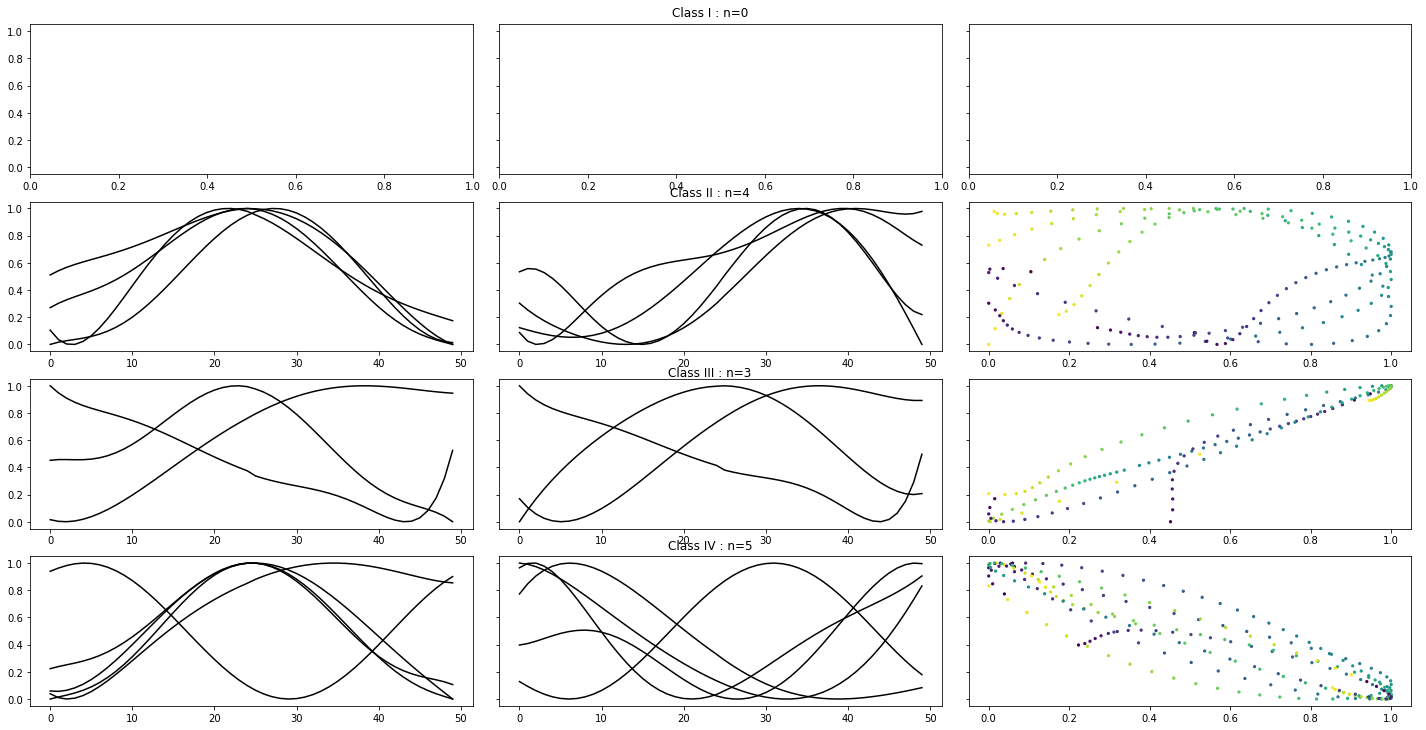

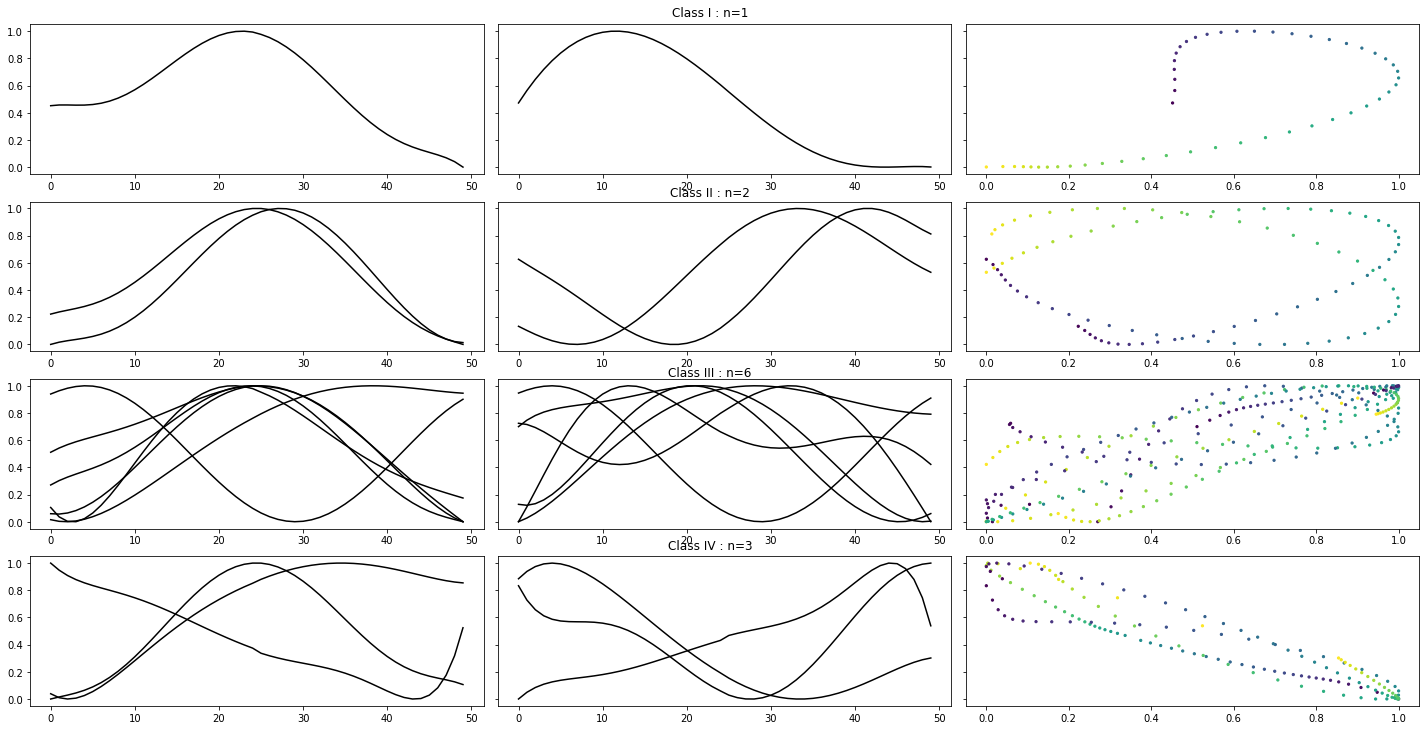

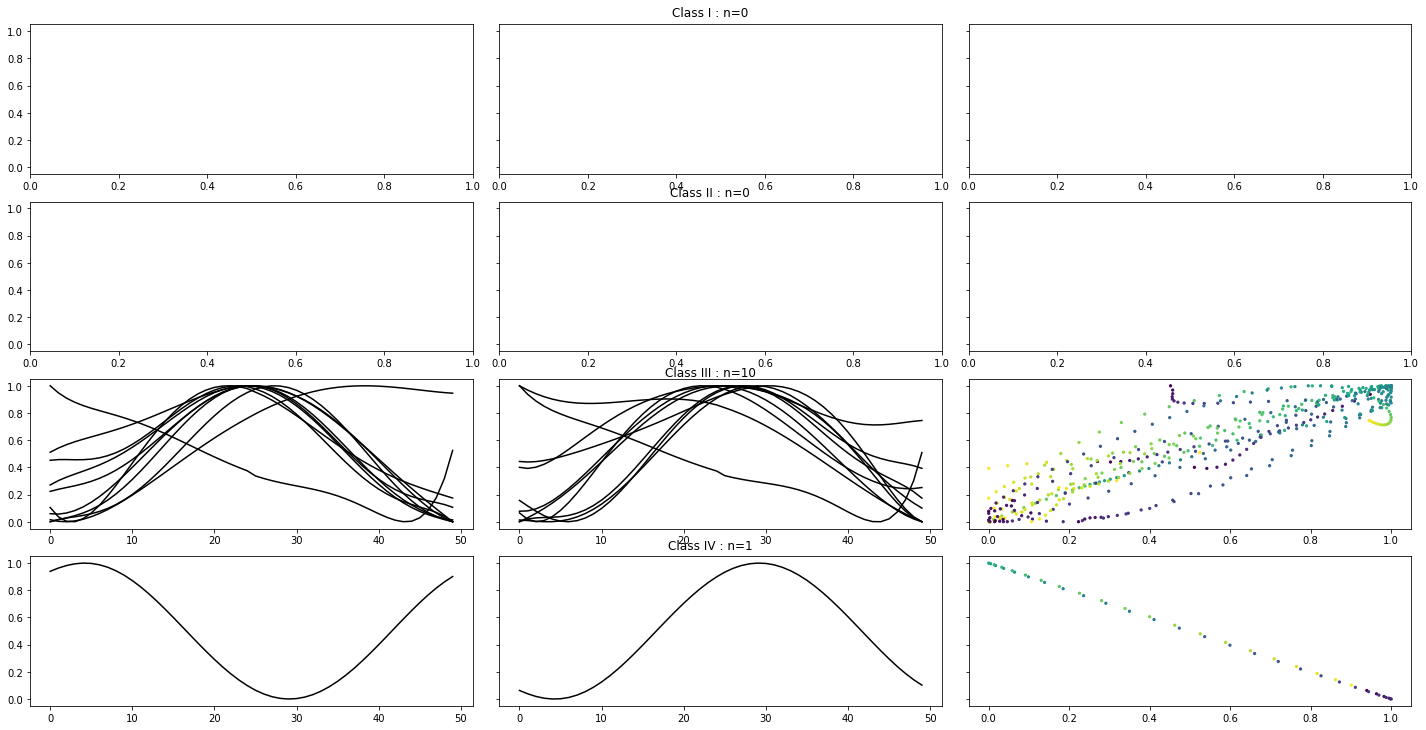

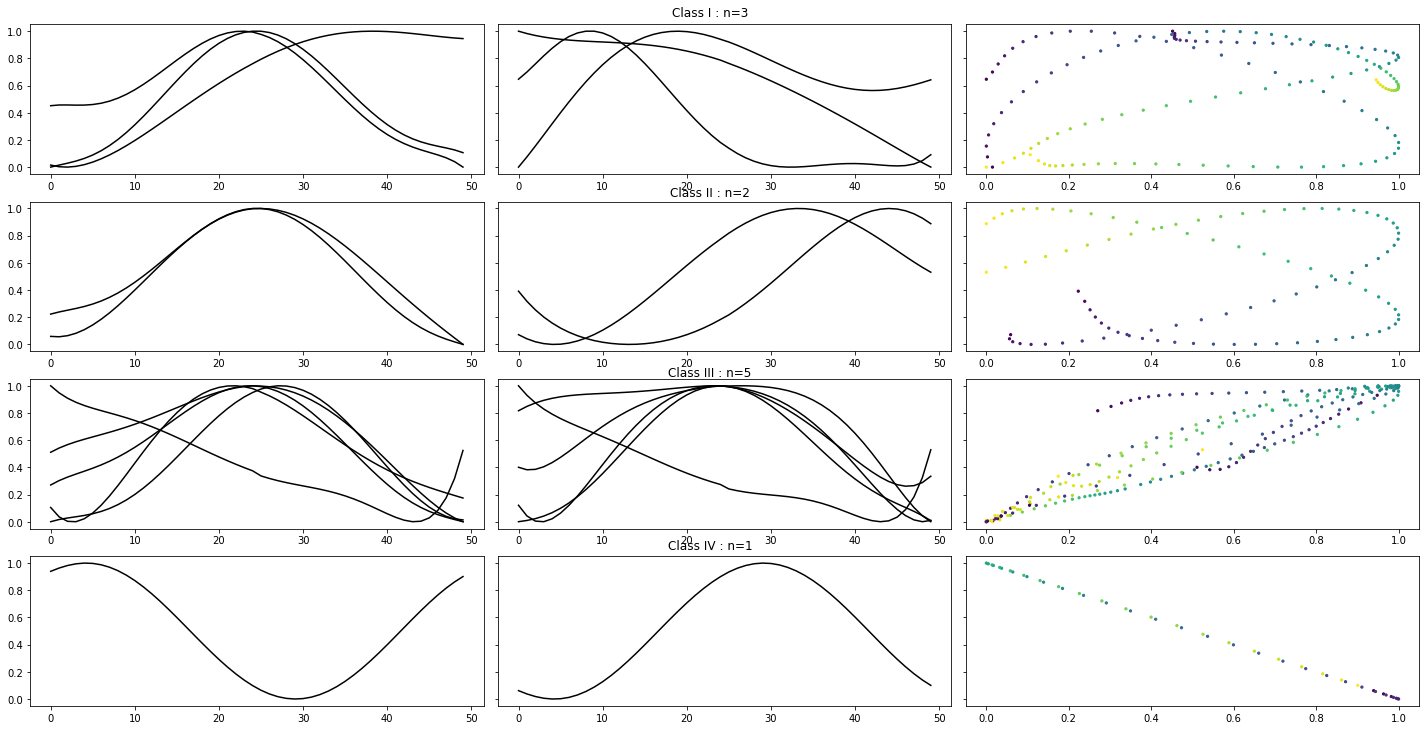

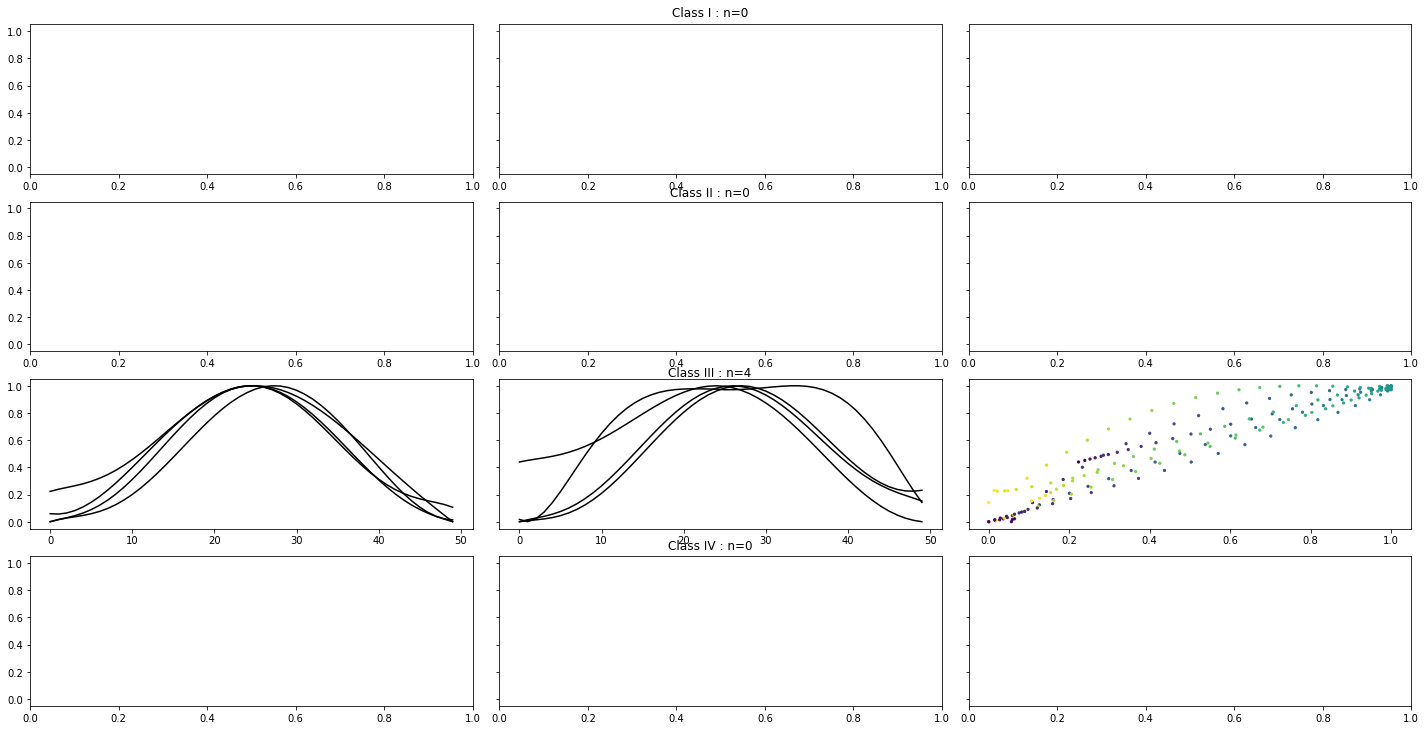

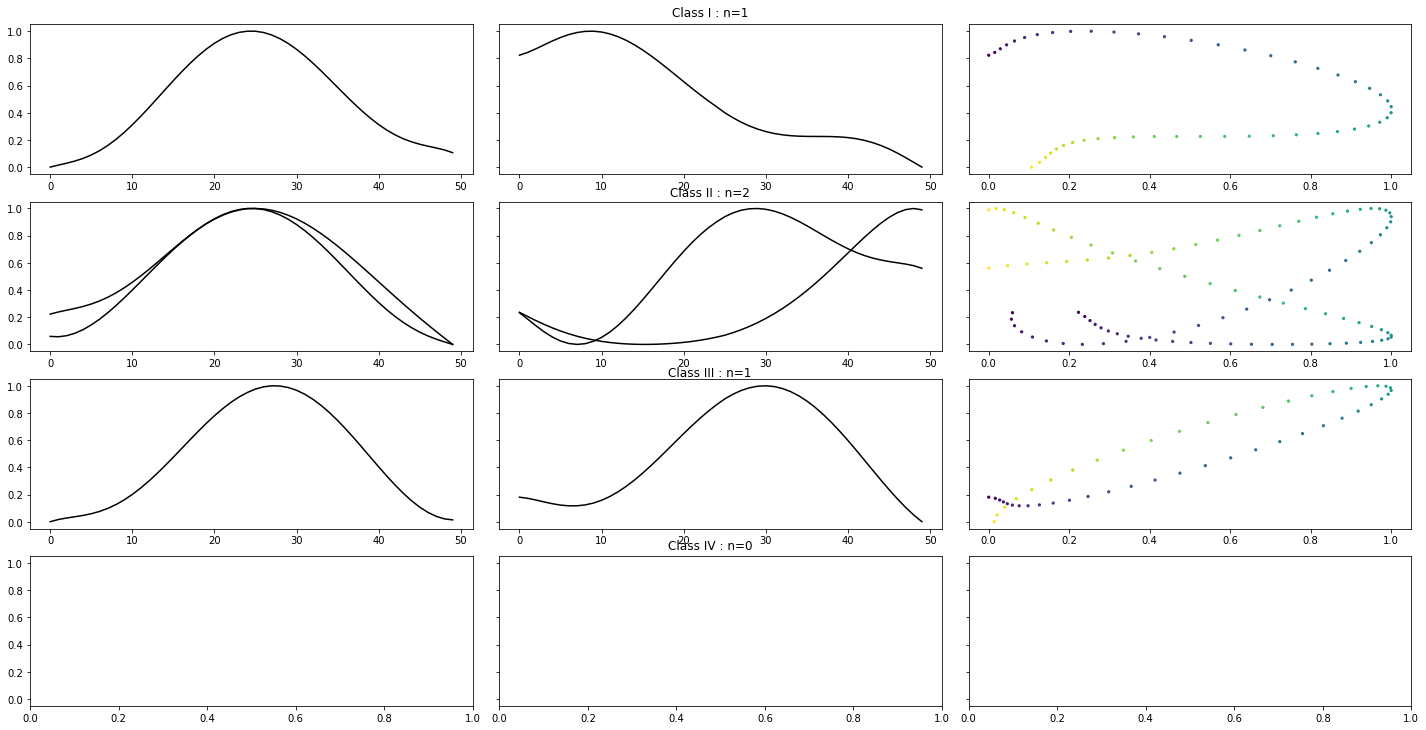

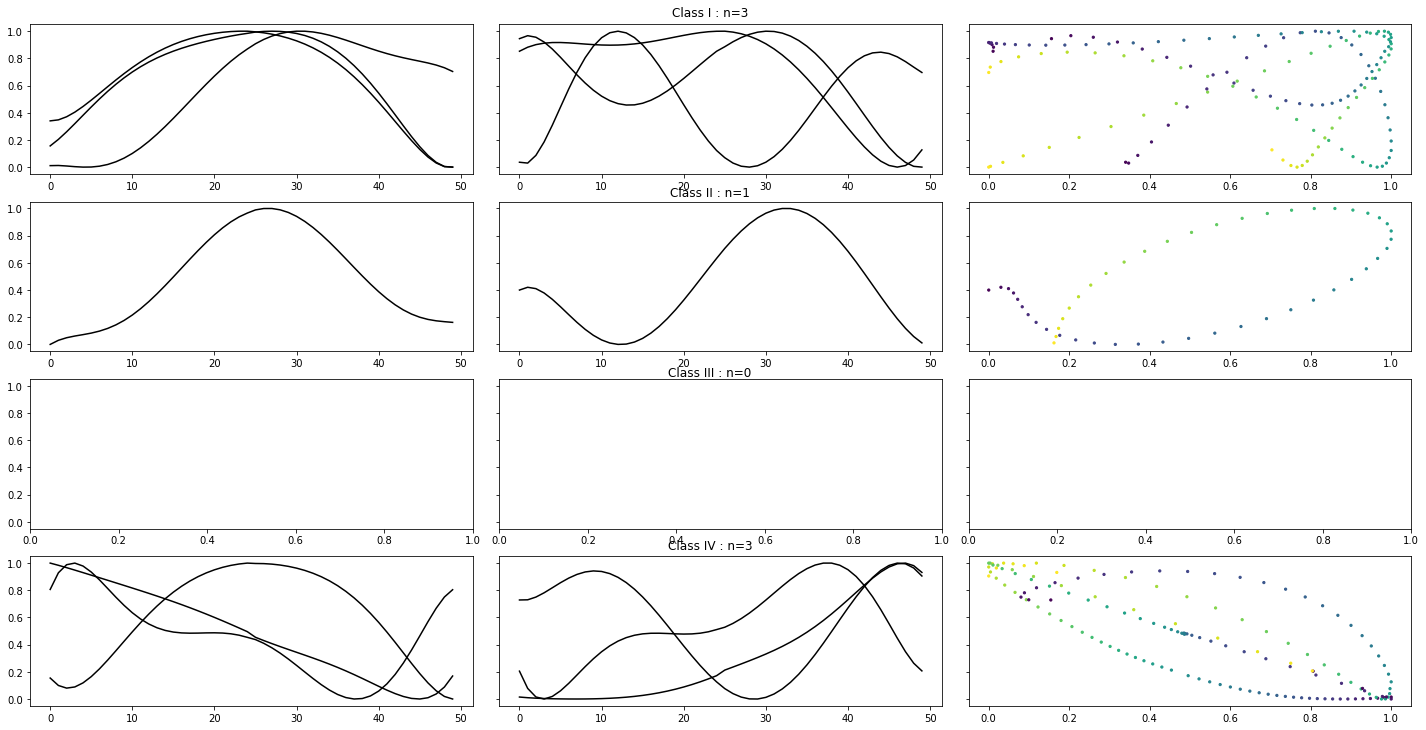

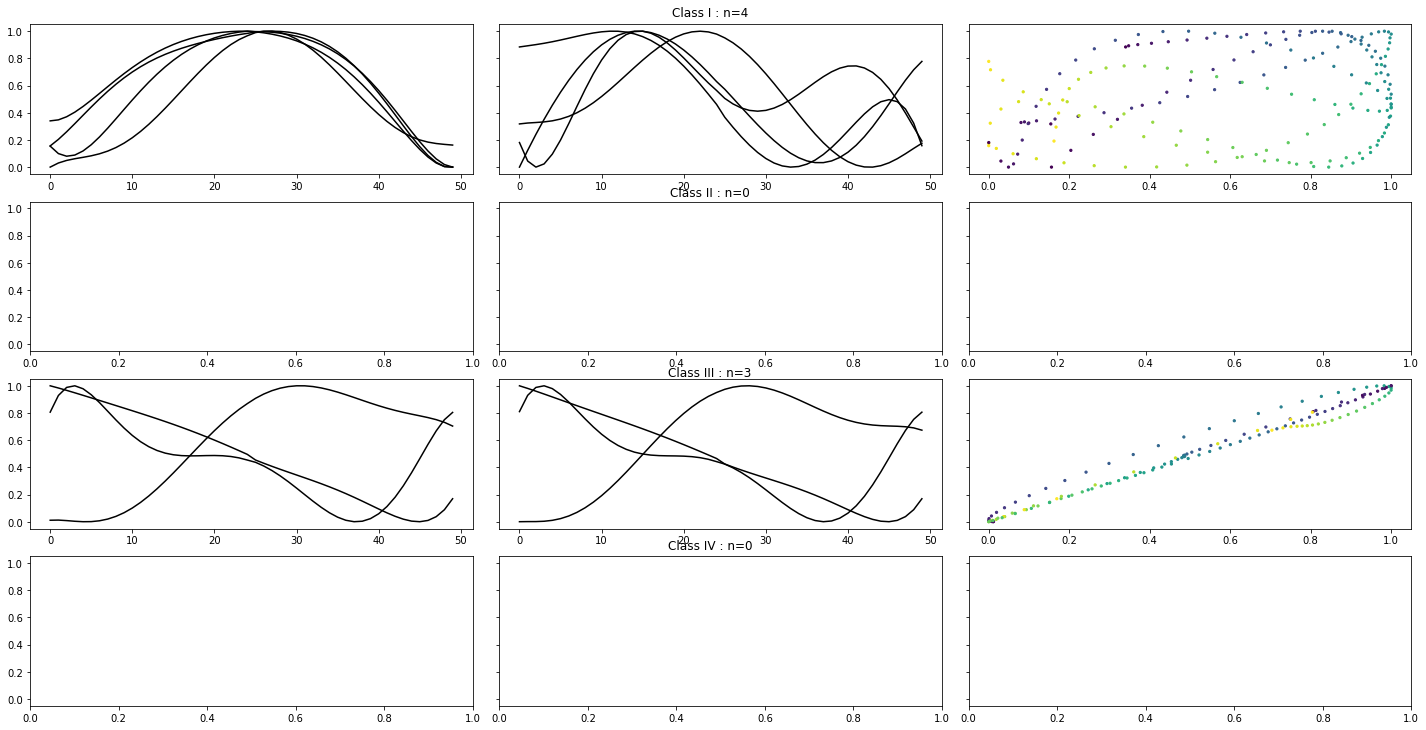

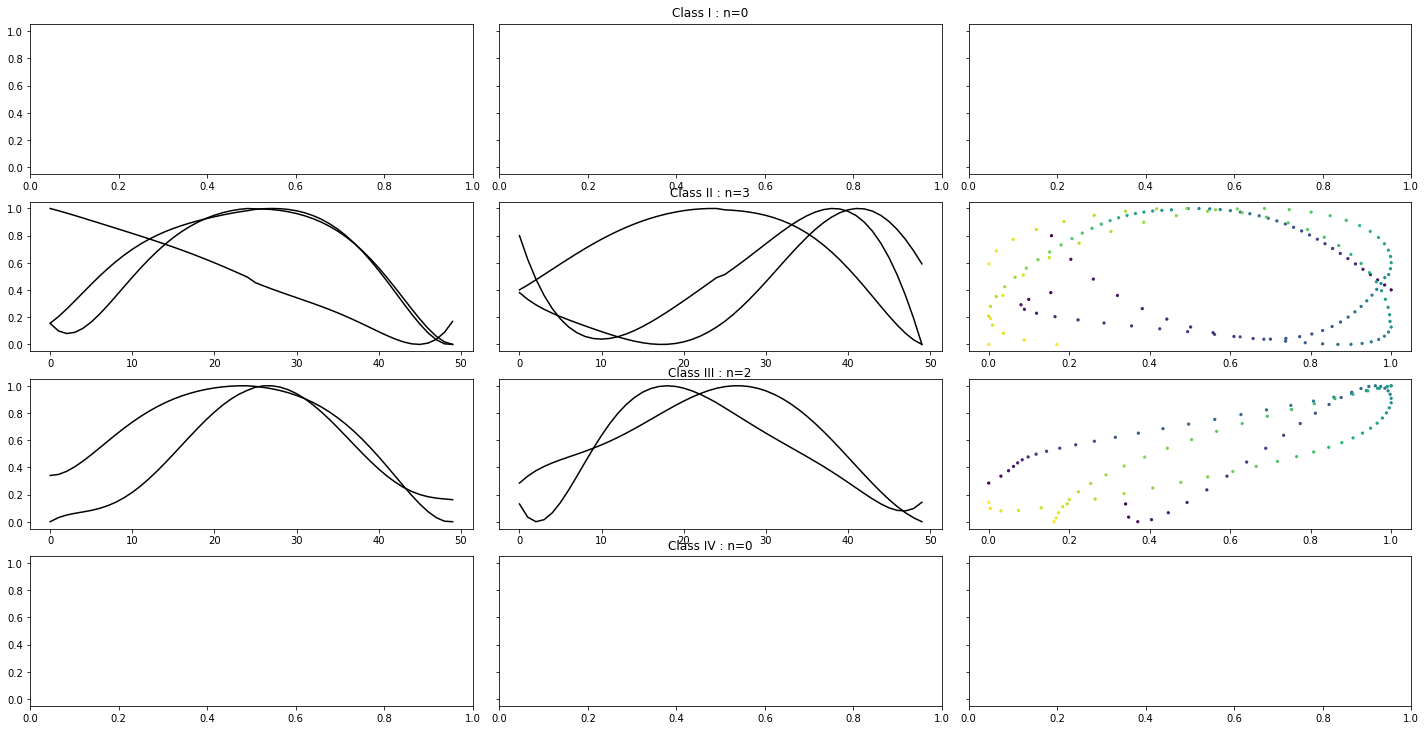

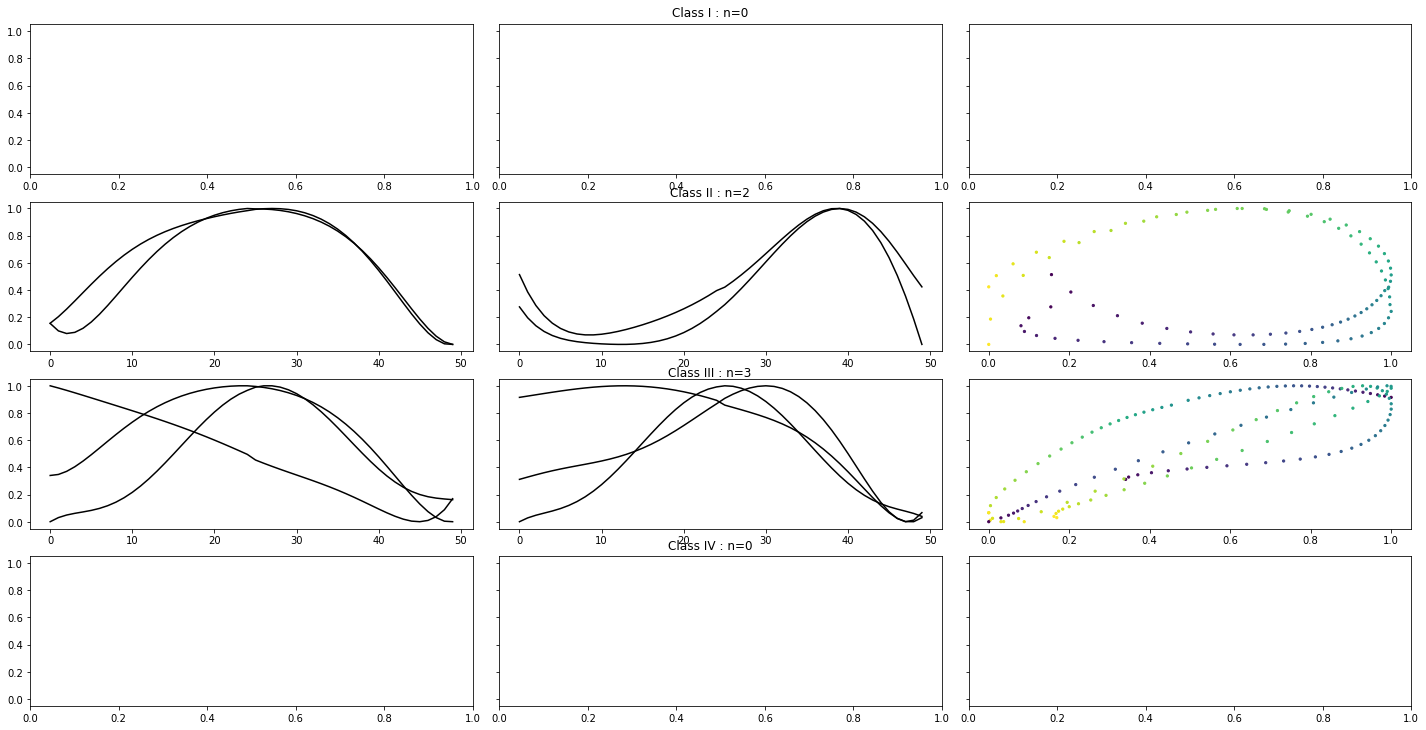

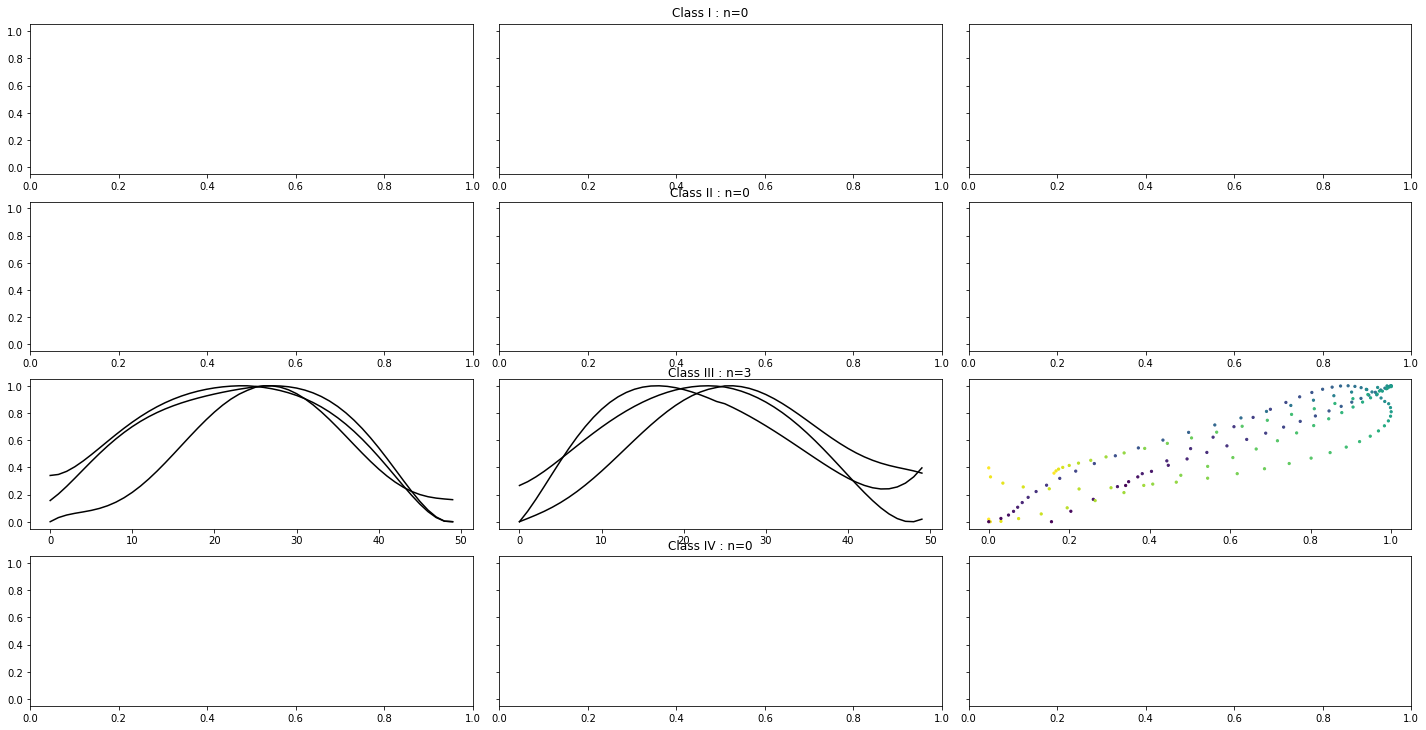

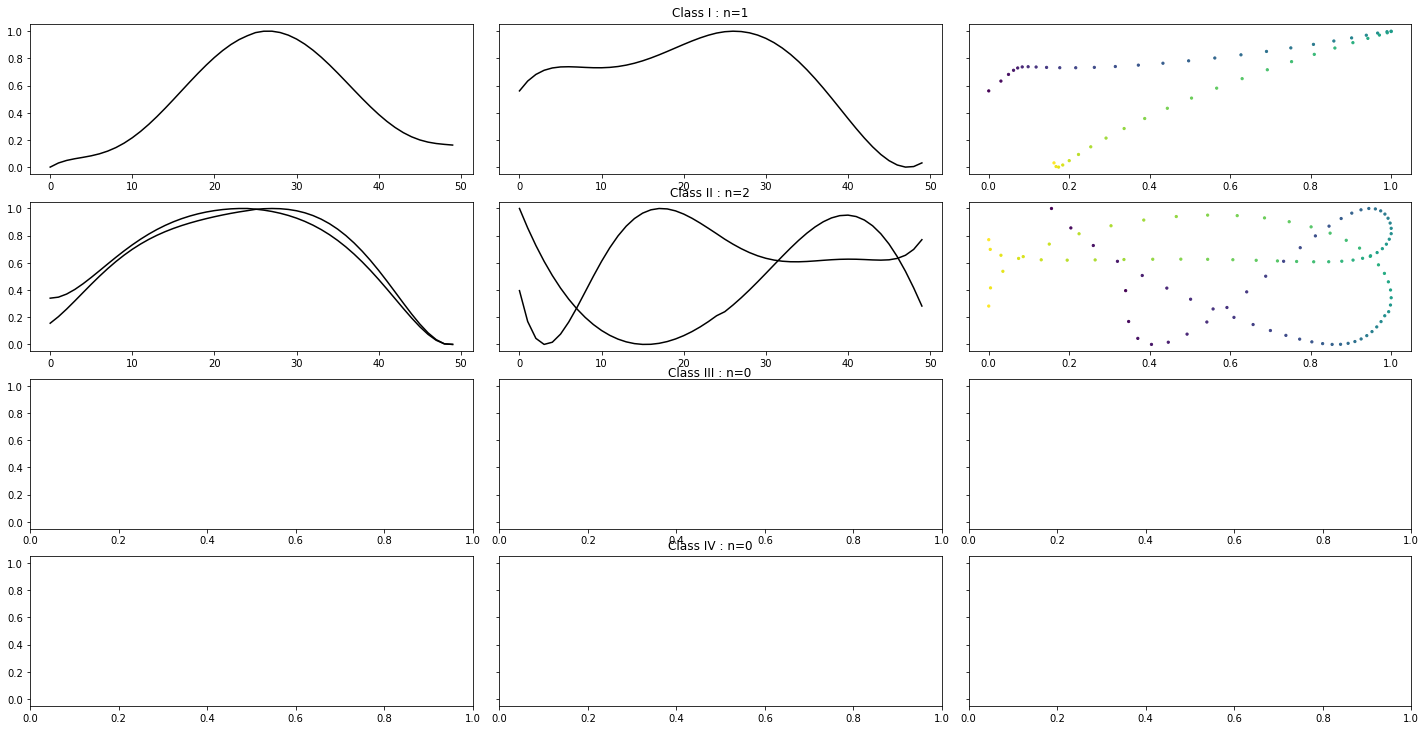

In [164]:
for d in np.arange(0, len(df)):
    for n in np.arange(0, len(df_temp.columns[0:6])):
        fig, axs=plt.subplots(4,3,figsize=(20,10), sharey=True)
        
        for c in range(len(classes)):
            for i in range(globals()[f'df_class{classes[c]}_{df_temp.columns[n]}_Runoff_{name[d]}'].shape[1]):
            # shape=globals()[f'df_class{classes[c]}_{df_temp.columns[n]}_Runoff_{name[d]}'].shape[0]

                axs[c][0].plot(globals()[f'df_class{classes[c]}_{df_temp.columns[n]}_Runoff_{name[d]}'].iloc[:, i], 'k')
                axs[c][1].plot(globals()[f'df_class{classes[c]}_{df_temp.columns[n]}_{name[d]}'].iloc[:, i], 'k')
                axs[c][2].scatter(globals()[f'df_class{classes[c]}_{df_temp.columns[n]}_Runoff_{name[d]}'].iloc[:, i], globals()[f'df_class{classes[c]}_{df_temp.columns[n]}_{name[d]}'].iloc[:, i], c=range(x_int), marker='o', cmap='viridis', s=5, alpha=1)
                
                # norm = plt.Normalize(dydx.min(), dydx.max())
                # points=np.array(globals()[f'df_class{classes[c]}_{df_temp.columns[n]}_Runoff_{name[d]}'].iloc[:, i], globals()[f'df_class{classes[c]}_{df_temp.columns[n]}_{name[d]}'].iloc[:, i]).T.reshape(-1, 1, 2)
                # segments=np.concatenate([points[:-1], points[1:]], axis=1)
                # cols=np.linspace(0, 1, 200)
                # lc = LineCollection(segments, cmap='viridis')
                # # Set the values used for colormapping
                # lc.set_array(cols)
                # lc.set_linewidth(2)
                # line = axs[c][2].add_collection(lc)
                # fig.colorbar(line, ax=axs[0])
                
                
        dfI = globals()[f'df_classI_{df_temp.columns[n]}_Runoff_{name[d]}']
        dfII = globals()[f'df_classII_{df_temp.columns[n]}_Runoff_{name[d]}']
        dfIII = globals()[f'df_classIII_{df_temp.columns[n]}_Runoff_{name[d]}']
        dfIV = globals()[f'df_classIV_{df_temp.columns[n]}_Runoff_{name[d]}']
        
        plt.figtext(0.5,1.01, f'Class I : n={dfI.shape[1]}', ha="center", va="top", fontsize=12)
        plt.figtext(0.5,0.76, f'Class II : n={dfII.shape[1]}', ha="center", va="top", fontsize=12)
        plt.figtext(0.5,0.51, f'Class III : n={dfIII.shape[1]}', ha="center", va="top", fontsize=12)
        plt.figtext(0.5,0.27, f'Class IV : n={dfIV.shape[1]}', ha="center", va="top", fontsize=12)
        plt.tight_layout()
        plt.savefig(path_fig_export+f'/classes_3D/class_event_{name[d]}_{df_temp.columns[n]}.pdf', bbox_inches='tight')

# Plot classes

In [165]:
for d in np.arange(0, len(df)):
    globals()[f'event_class_{name[d]}'] = pd.DataFrame()
    globals()[f'event_class_date_{name[d]}'] = pd.DataFrame()
    for n in df[d].columns[3:9]: 
        # globals()[f'event_class_{n}_{name[d]}'] = pd.DataFrame()
        
        globals()[f'event_class_{n}_{name[d]}'] = pd.DataFrame({'Event': globals()[f'df_event_time_{name[d]}']['Event'],
                                                      'Start': pd.to_datetime(globals()[f'df_event_time_{name[d]}']['Start']),
                                                                'Class':pd.Series([0] * df_event_time_melt_2021.shape[0])})
        
        for i in np.arange(0, globals()[f'event_class_{n}_{name[d]}'].shape[0]):
            if any(i == j for j in globals()[f'classI_{n}_{name[d]}']):
                globals()[f'event_class_{n}_{name[d]}']['Class'].iloc[i]=1.
            if any(i == j for j in globals()[f'classII_{n}_{name[d]}']):
                globals()[f'event_class_{n}_{name[d]}']['Class'].iloc[i]=2.
            if any(i == j for j in globals()[f'classIII_{n}_{name[d]}']):
                globals()[f'event_class_{n}_{name[d]}']['Class'].iloc[i]=3.
            if any(i == j for j in globals()[f'classIV_{n}_{name[d]}']):
                globals()[f'event_class_{n}_{name[d]}']['Class'].iloc[i]=4.

        # globals()[f'event_class_{n}_{name[d]}']['Class']=globals()[f'event_class_{n}_{name[d]}']['Class'].astype(float)
        globals()[f'event_class_{n}_{name[d]}'] = globals()[f'event_class_{n}_{name[d]}'][['Start', 'Class']]
        # print(globals()[f'event_class_{n}_{name[d]}'][['Start', 'Class']])
        globals()[f'event_class_theta_{n}_{name[d]}']=pd.concat([globals()[f'event_class_{n}_{name[d]}'], globals()[f'df_theta_norm_{name[d]}'][f'{n}']], axis=1)
        globals()[f'event_class_{n}_{name[d]}'].set_index('Start', inplace=True)
        globals()[f'event_class_theta_{n}_{name[d]}'].set_index('Start', inplace=True)
        globals()[f'event_class_{n}_date_{name[d]}']=globals()[f'event_class_{n}_{name[d]}']
        
        globals()[f'event_class_{n}_date_{name[d]}'].rename(columns={'Class':str(n)}, inplace=True)
        globals()[f'event_class_date_{name[d]}']=pd.concat([globals()[f'event_class_date_{name[d]}'], globals()[f'event_class_{n}_date_{name[d]}']], axis=1)
        
        globals()[f'event_class_{n}_{name[d]}'].index = globals()[f'event_class_{n}_{name[d]}'].index.format(formatter=lambda x: x.strftime('%d-%m-%Y'))
        globals()[f'event_class_theta_{n}_{name[d]}'].index=globals()[f'event_class_theta_{n}_{name[d]}'].index.format(formatter=lambda x: x.strftime('%d-%m-%Y'))
        globals()[f'event_class_{n}_{name[d]}'].rename(columns={'Class':str(n)}, inplace=True)
        globals()[f'event_class_theta_{n}_{name[d]}'].rename(columns={'Class':str(n), str(n):f'Theta_'+str(n)}, inplace=True)

        # print(pd.Series(globals()[f'df_theta_norm_{name[d]}'][f'{n}']))
        # globals()[f'event_class_{n}_{name[d]}']['Theta']=globals()[f'df_theta_norm_{name[d]}'][f'{n}']

        
        globals()[f'event_class_{name[d]}'] = pd.concat([globals()[f'event_class_{name[d]}'], globals()[f'event_class_{n}_{name[d]}']], axis=1)
        # globals()[f'event_class_theta_{name[d]}']=pd.concatdf_theta_norm_melt_2021
    globals()[f'event_class_{name[d]}'].to_csv(path_df_export+f'Event_3D/{name[d]}/df_event_class_{name[d]}.csv')
# event_class.columns(['Force class', 'Pe class','kgs01_3_10 class'], inplace=True)

/home/colili/anaconda3/lib/python3.8/site-packages/pandas/core/indexing.py:1637: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self._setitem_single_block(indexer, value, name)


In [166]:
event_class_date_melt_2022

L  Pe  P3_10  P30_45  R  S
Start                                          
2022-05-25 00:00:00  4   3      2       3  0  0
2022-05-28 21:00:00  4   1      2       2  0  0
2022-06-10 12:00:00  1   1      2       2  3  2
2022-06-26 06:00:00  1   1      3       3  3  2
2022-07-11 06:00:00  2   1      3       3  3  1
2022-07-23 18:00:00  0   0      0       0  0  0
2022-08-07 18:00:00  1   3      0       0  0  0
2022-08-16 00:00:00  4   3      0       0  0  0
NaT                  0   0      0       0  0  0
NaT                  0   0      0       0  0  0
NaT                  0   0      0       0  0  0
NaT                  0   0      0       0  0  0

In [167]:
event_class_melt_2022

L  Pe  P3_10  P30_45  R  S
25-05-2022  4   3      2       3  0  0
28-05-2022  4   1      2       2  0  0
10-06-2022  1   1      2       2  3  2
26-06-2022  1   1      3       3  3  2
11-07-2022  2   1      3       3  3  1
23-07-2022  0   0      0       0  0  0
07-08-2022  1   3      0       0  0  0
16-08-2022  4   3      0       0  0  0
NaN         0   0      0       0  0  0
NaN         0   0      0       0  0  0
NaN         0   0      0       0  0  0
NaN         0   0      0       0  0  0

## Normalise each class to have all shade of color inside classes

In [168]:
classes=['I', 'II', 'III', 'IV']
for d in np.arange(0, len(df)):
    
    for n in df[d].columns[3:9]:
        df_temp=globals()[f'event_class_theta_{n}_{name[d]}']
        globals()[f'event_class_theta_{n}_{name[d]}_norm'] = pd.DataFrame({'TIMESTAMP':df_temp.index,
                                                                           f'{n}':df_temp[f'{n}'],
                                                                           f'Theta_{n}': df_temp[f'Theta_{n}']})
        # df_temp_norm = globals()[f'event_class_theta_{n}_{name[d]}_norm']
        
        globals()[f'event_class_theta_{name[d]}_norm']=pd.DataFrame()
        
        for i in np.arange(1, len(classes)+1):
            globals()[f'class{classes[i-1]}_threshold_{n}_{name[d]}']=[]
            
            exist=i in df_temp[f'{n}'].unique()
            
            if exist==True:
            
                df_group_min=df_temp.groupby(f'{n}').min().reset_index()
                globals()[f'class{classes[i-1]}_threshold_{n}_{name[d]}'].append(df_group_min.loc[df_group_min[f'{n}']==
                                                                                                  i][f'Theta_{n}'].values[0])

                df_group_max=df_temp.groupby(f'{n}').max().reset_index()
                globals()[f'class{classes[i-1]}_threshold_{n}_{name[d]}'].append(df_group_max.loc[df_group_max[f'{n}']==
                                                                                              i][f'Theta_{n}'].values[0])
            else:
                globals()[f'class{classes[i-1]}_threshold_{n}_{name[d]}'].append(np.nan)
                globals()[f'class{classes[i-1]}_threshold_{n}_{name[d]}'].append(np.nan)
                
            for j in np.arange(0, df_temp.shape[0]):
                # print(i)
                if df_temp[f'{n}'][j]==i:
                    globals()[f'event_class_theta_{n}_{name[d]}_norm'][f'Theta_{n}'][j]=(df_temp[f'Theta_{n}'][j]-globals()[f'class{classes[i-1]}_threshold_{n}_{name[d]}'][0])/(globals()[f'class{classes[i-1]}_threshold_{n}_{name[d]}'][1]-globals()[f'class{classes[i-1]}_threshold_{n}_{name[d]}'][0])+(i-1)


<ipython-input-168-fbef487ed247>:34: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  globals()[f'event_class_theta_{n}_{name[d]}_norm'][f'Theta_{n}'][j]=(df_temp[f'Theta_{n}'][j]-globals()[f'class{classes[i-1]}_threshold_{n}_{name[d]}'][0])/(globals()[f'class{classes[i-1]}_threshold_{n}_{name[d]}'][1]-globals()[f'class{classes[i-1]}_threshold_{n}_{name[d]}'][0])+(i-1)
<ipython-input-168-fbef487ed247>:34: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  globals()[f'event_class_theta_{n}_{name[d]}_norm'][f'Theta_{n}'][j]=(df_temp[f'Theta_{n}'][j]-globals()[f'class{classes[i-1]}_threshold_{n}_{name[d]}'][0])/(globals()[f'class

In [169]:
event_class_melt_2022

L  Pe  P3_10  P30_45  R  S
25-05-2022  4   3      2       3  0  0
28-05-2022  4   1      2       2  0  0
10-06-2022  1   1      2       2  3  2
26-06-2022  1   1      3       3  3  2
11-07-2022  2   1      3       3  3  1
23-07-2022  0   0      0       0  0  0
07-08-2022  1   3      0       0  0  0
16-08-2022  4   3      0       0  0  0
NaN         0   0      0       0  0  0
NaN         0   0      0       0  0  0
NaN         0   0      0       0  0  0
NaN         0   0      0       0  0  0

In [170]:
for d in np.arange(0, len(df)):
    globals()[f'event_class_theta_{name[d]}_norm']=pd.DataFrame()
    # print(df[d].columns[3:9])
    for n in df[d].columns[3:9]:
        df_noi = globals()[f'event_class_theta_{n}_{name[d]}_norm']
        df_temp = df_noi.reset_index()
        # print(globals()[f'event_class_theta_{name[d]}_norm'])
        # print(df_temp)
        globals()[f'event_class_theta_{name[d]}_norm']=pd.concat([globals()[f'event_class_theta_{name[d]}_norm'], df_temp[f'Theta_{n}']], axis=1)
        index=df_noi.index
    globals()[f'event_class_theta_{name[d]}_norm'].columns=['L (N)', 'Pe (MPa)', 'P [3-10 Hz] (dB)', 'P [30-45 Hz] (dB)', 'R/R$_{ref}$', 'S/S$_{ref}$']
    globals()[f'event_class_theta_{name[d]}_norm'].set_index(index, inplace=True)

# Create databar with shades of colors

In [171]:
colors1 = plt.cm.YlOrBr(np.linspace(0.3, 1, 128))
colors2 = plt.cm.GnBu(np.linspace(0.3, 1, 128))
colors3 = plt.cm.BuGn(np.linspace(0.3, 1, 128))
colors4 = plt.cm.RdPu(np.linspace(0.3, 1, 128))

colors = np.vstack((colors1, colors2, colors3, colors4))
mymap = mcolors.LinearSegmentedColormap.from_list('my_colormap', colors)

In [172]:
df_melt_2021

index     Time           TIMESTAMP          L        Pe       P3_10  \
0      128   16.000 2021-07-01 00:00:00  95.343681  2.910845 -176.429602   
1      129   16.125 2021-07-01 03:00:00  95.327061  2.913258 -176.929432   
2      130   16.250 2021-07-01 06:00:00  95.255476  2.915607 -177.186138   
3      131   16.375 2021-07-01 09:00:00  95.201321  2.917524 -176.918924   
4      132   16.500 2021-07-01 12:00:00  95.146242  2.919731 -177.006568   
..     ...      ...                 ...        ...       ...         ...   
763    891  111.375 2021-10-04 09:00:00  72.668144  2.618755 -177.875939   
764    892  111.500 2021-10-04 12:00:00  72.848286  2.620269 -177.888632   
765    893  111.625 2021-10-04 15:00:00  72.622734  2.621790 -176.810488   
766    894  111.750 2021-10-04 18:00:00  72.511203  2.623406 -176.106772   
767    895  111.875 2021-10-04 21:00:00  72.865749  2.625247 -176.933639   

         P30_45         R         S    Runoff  
0   -184.669361       NaN       NaN  0.449876  
1   -184.786684  2.780367  0.355130  0.821738  
2   -184.835858  3.746705  0.223936  1.682886  
3   -184.832795  4.296542  0.179636  1.770574  
4   -184.806039  4.080946  0.191817  1.233248  
..          ...       ...       ...       ...  
763 -185.376275       NaN       NaN  0.173252  
764 -185.594885       NaN       NaN  0.157165  
765 -184.604488       NaN       NaN  0.154683  
766 -185.045972       NaN       NaN  0.158233  
767 -185.020343       NaN       NaN  0.151036  

[768 rows x 10 columns]

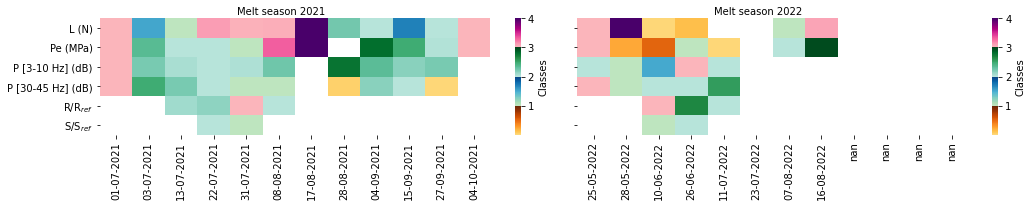

In [173]:
# color=[cmap(0.25), cmap(0.5), cmap(0.75), cmap(1)]

fig, axs = plt.subplots(1, 2, figsize=(15, 3), sharey=True)
for d in np.arange(0, len(df)):
    axs[d]=sns.heatmap(globals()[f'event_class_theta_{name[d]}_norm'].T, cmap=mymap, ax=axs[d], cbar_kws={'label': 'Classes', 'ticks':[1, 2, 3, 4]})
axs[0].text(0.35, 1.03, 'Melt season 2021', color='k', transform=axs[0].transAxes)
axs[1].text(0.35, 1.03, 'Melt season 2022', color='k', transform=axs[1].transAxes)
plt.tight_layout()
plt.savefig(path_fig_export+'classes_3D/classes_summary_norm.pdf', bbox_inches='tight')

In [174]:
event_class_melt_2022

L  Pe  P3_10  P30_45  R  S
25-05-2022  4   3      2       3  0  0
28-05-2022  4   1      2       2  0  0
10-06-2022  1   1      2       2  3  2
26-06-2022  1   1      3       3  3  2
11-07-2022  2   1      3       3  3  1
23-07-2022  0   0      0       0  0  0
07-08-2022  1   3      0       0  0  0
16-08-2022  4   3      0       0  0  0
NaN         0   0      0       0  0  0
NaN         0   0      0       0  0  0
NaN         0   0      0       0  0  0
NaN         0   0      0       0  0  0

In [175]:
event_class_melt_2021.replace(0,np.nan, inplace=True)
event_class_melt_2022.replace(0,np.nan, inplace=True)
event_class_date_melt_2021.replace(0,np.nan, inplace=True)
event_class_date_melt_2022.replace(0,np.nan, inplace=True)

In [176]:
event_class_melt_2022

L   Pe  P3_10  P30_45    R    S
25-05-2022  4.0  3.0    2.0     3.0  NaN  NaN
28-05-2022  4.0  1.0    2.0     2.0  NaN  NaN
10-06-2022  1.0  1.0    2.0     2.0  3.0  2.0
26-06-2022  1.0  1.0    3.0     3.0  3.0  2.0
11-07-2022  2.0  1.0    3.0     3.0  3.0  1.0
23-07-2022  NaN  NaN    NaN     NaN  NaN  NaN
07-08-2022  1.0  3.0    NaN     NaN  NaN  NaN
16-08-2022  4.0  3.0    NaN     NaN  NaN  NaN
NaN         NaN  NaN    NaN     NaN  NaN  NaN
NaN         NaN  NaN    NaN     NaN  NaN  NaN
NaN         NaN  NaN    NaN     NaN  NaN  NaN
NaN         NaN  NaN    NaN     NaN  NaN  NaN

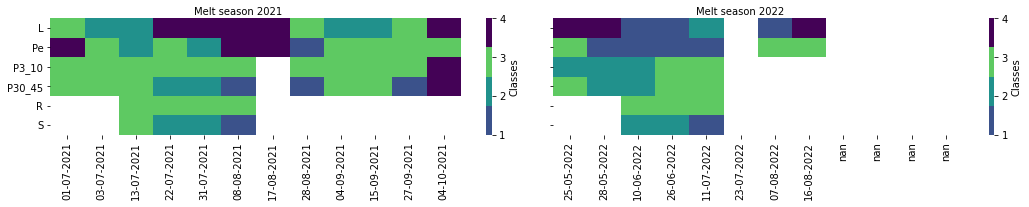

In [177]:
cmap=matplotlib.cm.get_cmap('viridis')
color=[cmap(0.25), cmap(0.5), cmap(0.75), cmap(1)]
fig, axs = plt.subplots(1, 2, figsize=(15, 3), sharey=True)
for d in np.arange(0, len(df)):
    axs[d]=sns.heatmap(globals()[f'event_class_{name[d]}'].T, cmap=color, ax=axs[d], cbar_kws={'label': 'Classes', 'ticks':[1, 2, 3, 4]})
axs[0].text(0.35, 1.03, 'Melt season 2021', color='k', transform=axs[0].transAxes)
axs[1].text(0.35, 1.03, 'Melt season 2022', color='k', transform=axs[1].transAxes)
plt.tight_layout()
plt.savefig(path_fig_export+'classes_3D/classes_summary.pdf', bbox_inches='tight')

In [178]:
event_class_melt_2022

L   Pe  P3_10  P30_45    R    S
25-05-2022  4.0  3.0    2.0     3.0  NaN  NaN
28-05-2022  4.0  1.0    2.0     2.0  NaN  NaN
10-06-2022  1.0  1.0    2.0     2.0  3.0  2.0
26-06-2022  1.0  1.0    3.0     3.0  3.0  2.0
11-07-2022  2.0  1.0    3.0     3.0  3.0  1.0
23-07-2022  NaN  NaN    NaN     NaN  NaN  NaN
07-08-2022  1.0  3.0    NaN     NaN  NaN  NaN
16-08-2022  4.0  3.0    NaN     NaN  NaN  NaN
NaN         NaN  NaN    NaN     NaN  NaN  NaN
NaN         NaN  NaN    NaN     NaN  NaN  NaN
NaN         NaN  NaN    NaN     NaN  NaN  NaN
NaN         NaN  NaN    NaN     NaN  NaN  NaN

In [179]:
event_class_melt_2022=event_class_melt_2022[0:8]

In [180]:
event_class_melt_2022

L   Pe  P3_10  P30_45    R    S
25-05-2022  4.0  3.0    2.0     3.0  NaN  NaN
28-05-2022  4.0  1.0    2.0     2.0  NaN  NaN
10-06-2022  1.0  1.0    2.0     2.0  3.0  2.0
26-06-2022  1.0  1.0    3.0     3.0  3.0  2.0
11-07-2022  2.0  1.0    3.0     3.0  3.0  1.0
23-07-2022  NaN  NaN    NaN     NaN  NaN  NaN
07-08-2022  1.0  3.0    NaN     NaN  NaN  NaN
16-08-2022  4.0  3.0    NaN     NaN  NaN  NaN

In [181]:
event_class_date_melt_2022=event_class_date_melt_2022[0:8]

In [182]:
event_class_date_melt_2022

L   Pe  P3_10  P30_45    R    S
Start                                                 
2022-05-25 00:00:00  4.0  3.0    2.0     3.0  NaN  NaN
2022-05-28 21:00:00  4.0  1.0    2.0     2.0  NaN  NaN
2022-06-10 12:00:00  1.0  1.0    2.0     2.0  3.0  2.0
2022-06-26 06:00:00  1.0  1.0    3.0     3.0  3.0  2.0
2022-07-11 06:00:00  2.0  1.0    3.0     3.0  3.0  1.0
2022-07-23 18:00:00  NaN  NaN    NaN     NaN  NaN  NaN
2022-08-07 18:00:00  1.0  3.0    NaN     NaN  NaN  NaN
2022-08-16 00:00:00  4.0  3.0    NaN     NaN  NaN  NaN

<ipython-input-183-8cb1043a24e5>:35: UserWarning: FixedFormatter should only be used together with FixedLocator
  cbar.ax.set_yticklabels(['0','1','2', '3', '4'])


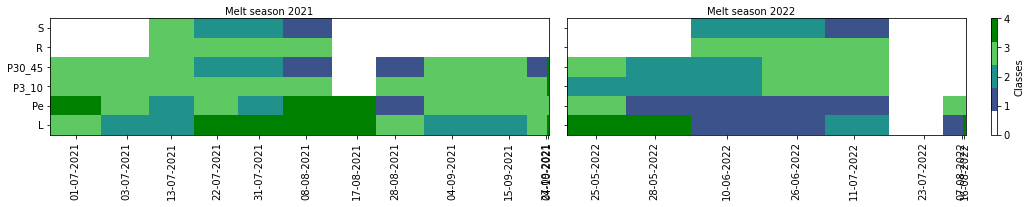

In [183]:
from matplotlib.colors import ListedColormap

cmap=matplotlib.cm.get_cmap('viridis')
cMap=ListedColormap(['white',cmap(0.25), cmap(0.5), cmap(0.75), 'g'])

fig, axs=plt.subplots(1, 2, figsize=(15,3), sharey=True)
for d in range(len(df)):
    
    event_0=globals()[f'event_class_{name[d]}'].fillna(0)
    # print(event_0.shape)
    duration_hour=globals()[f'df_event_time_{name[d]}']['Duration']/np.timedelta64(1, 'h')

    duration=[]
    for i in np.arange(0, len(duration_hour)):
        if i==0:
            duration.append(duration_hour[0])
        else:
            ii=duration[i-1]+duration_hour[i]
            duration.append(ii)


    i=pd.to_datetime(event_0.index, format='%d-%m-%Y')
    
    # date_list=i.format(formatter=lambda x: x.strftime('%d-%m-%Y'))
    date_list=i.format(formatter=lambda x: x.strftime('%d-%m-%Y'))

    # print(i)
    y=np.arange(0, 6, 1)
    X,Y = np.meshgrid(duration,y)
    
    im = axs[d].pcolormesh(X, Y, event_0.T, cmap=cMap)
    axs[d].set_xticks(duration, date_list, rotation='vertical')
    axs[d].set_yticks(y, globals()[f'event_class_{name[d]}'].columns, rotation='horizontal')
cbar = plt.colorbar(im)
cbar.ax.set_yticklabels(['0','1','2', '3', '4'])
cbar.set_label('Classes')
axs[0].text(0.35, 1.03, 'Melt season 2021', color='k', transform=axs[0].transAxes)
axs[1].text(0.35, 1.03, 'Melt season 2022', color='k', transform=axs[1].transAxes)
plt.tight_layout()
plt.savefig(path_fig_export+'classes_3D/classes_summary_prop.svg', bbox_inches='tight')

In [184]:
event_class_melt_2022

L   Pe  P3_10  P30_45    R    S
25-05-2022  4.0  3.0    2.0     3.0  NaN  NaN
28-05-2022  4.0  1.0    2.0     2.0  NaN  NaN
10-06-2022  1.0  1.0    2.0     2.0  3.0  2.0
26-06-2022  1.0  1.0    3.0     3.0  3.0  2.0
11-07-2022  2.0  1.0    3.0     3.0  3.0  1.0
23-07-2022  NaN  NaN    NaN     NaN  NaN  NaN
07-08-2022  1.0  3.0    NaN     NaN  NaN  NaN
16-08-2022  4.0  3.0    NaN     NaN  NaN  NaN

In [185]:
event_class_melt_2021.replace(np.nan, 0, inplace=True)
event_class_melt_2022.replace(np.nan, 0, inplace=True)
event_class_date_melt_2021.replace(np.nan, 0, inplace=True)
event_class_date_melt_2022.replace(np.nan, 0, inplace=True)

/home/colili/anaconda3/lib/python3.8/site-packages/pandas/core/frame.py:4524: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  return super().replace(


In [186]:
event_class_date_melt_2022

L   Pe  P3_10  P30_45    R    S
Start                                                 
2022-05-25 00:00:00  4.0  3.0    2.0     3.0  0.0  0.0
2022-05-28 21:00:00  4.0  1.0    2.0     2.0  0.0  0.0
2022-06-10 12:00:00  1.0  1.0    2.0     2.0  3.0  2.0
2022-06-26 06:00:00  1.0  1.0    3.0     3.0  3.0  2.0
2022-07-11 06:00:00  2.0  1.0    3.0     3.0  3.0  1.0
2022-07-23 18:00:00  0.0  0.0    0.0     0.0  0.0  0.0
2022-08-07 18:00:00  1.0  3.0    0.0     0.0  0.0  0.0
2022-08-16 00:00:00  4.0  3.0    0.0     0.0  0.0  0.0

In [187]:
event_class_melt_2021.reset_index(inplace=True)
event_class_date_melt_2021.reset_index(inplace=True)

In [188]:
event_class_melt_2022.reset_index(inplace=True)
event_class_date_melt_2022.reset_index(inplace=True)

In [189]:
event_class_melt_2022

index    L   Pe  P3_10  P30_45    R    S
0  25-05-2022  4.0  3.0    2.0     3.0  0.0  0.0
1  28-05-2022  4.0  1.0    2.0     2.0  0.0  0.0
2  10-06-2022  1.0  1.0    2.0     2.0  3.0  2.0
3  26-06-2022  1.0  1.0    3.0     3.0  3.0  2.0
4  11-07-2022  2.0  1.0    3.0     3.0  3.0  1.0
5  23-07-2022  0.0  0.0    0.0     0.0  0.0  0.0
6  07-08-2022  1.0  3.0    0.0     0.0  0.0  0.0
7  16-08-2022  4.0  3.0    0.0     0.0  0.0  0.0

In [190]:
mask=[0, 6, 8, 10, 11]
for i in mask:
    event_class_melt_2021.loc[i, ['L', 'Pe', 'P3_10', 'P30_45', 'R', 'S']]=0
    event_class_date_melt_2021.loc[i, ['L', 'Pe', 'P3_10', 'P30_45', 'R', 'S']]=0
    # event_class_melt_2021.loc[i, 'Pe']=np.nan
    # event_class_melt_2021.loc[i, 'L']=np.nan

In [191]:
mask=[0, 2, 7]
for i in mask:
    event_class_melt_2022.loc[i, ['L', 'Pe', 'P3_10', 'P30_45', 'R', 'S']]=0
    event_class_date_melt_2022.loc[i, ['L', 'Pe', 'P3_10', 'P30_45', 'R', 'S']]=0

/home/colili/anaconda3/lib/python3.8/site-packages/pandas/core/indexing.py:1720: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self._setitem_single_column(loc, value, pi)


In [192]:
event_class_melt_2022

index    L   Pe  P3_10  P30_45    R    S
0  25-05-2022  0.0  0.0    0.0     0.0  0.0  0.0
1  28-05-2022  4.0  1.0    2.0     2.0  0.0  0.0
2  10-06-2022  0.0  0.0    0.0     0.0  0.0  0.0
3  26-06-2022  1.0  1.0    3.0     3.0  3.0  2.0
4  11-07-2022  2.0  1.0    3.0     3.0  3.0  1.0
5  23-07-2022  0.0  0.0    0.0     0.0  0.0  0.0
6  07-08-2022  1.0  3.0    0.0     0.0  0.0  0.0
7  16-08-2022  0.0  0.0    0.0     0.0  0.0  0.0

In [193]:
event_class_melt_2021.loc[1, ['L']]=0
event_class_melt_2021.loc[7, ['L']]=0

event_class_date_melt_2021.loc[1, ['L']]=0
event_class_date_melt_2021.loc[7, ['L']]=0

event_class_melt_2021.loc[7, ['Pe']]=0
event_class_date_melt_2021.loc[7, ['Pe']]=0
# event_class_melt_2021.loc[7, ['R', 'S']]=np.nan


event_class_melt_2021.loc[3, ['P30_45']]=0
event_class_date_melt_2021.loc[3, ['P30_45']]=0

In [194]:
event_class_melt_2022.loc[2, ['L']]=0
event_class_melt_2022.loc[3, ['L']]=0
event_class_melt_2022.loc[6, ['L']]=0

event_class_date_melt_2022.loc[2, ['L']]=0
event_class_date_melt_2022.loc[3, ['L']]=0
event_class_date_melt_2022.loc[6, ['L']]=0

event_class_melt_2022.loc[2, ['Pe']]=0
event_class_date_melt_2022.loc[2, ['Pe']]=0

# event_class_melt_2022.loc[, ['S']]=np.nan
# event_class_melt_2022.loc[2, ['R']]=np.nan


event_class_melt_2022.loc[3, ['P3_10']]=0
event_class_melt_2022.loc[4, ['P3_10']]=0

event_class_date_melt_2022.loc[3, ['P3_10']]=0
event_class_date_melt_2022.loc[4, ['P3_10']]=0

/home/colili/anaconda3/lib/python3.8/site-packages/pandas/core/indexing.py:1720: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self._setitem_single_column(loc, value, pi)


In [195]:
event_class_date_melt_2022

Start    L   Pe  P3_10  P30_45    R    S
0 2022-05-25 00:00:00  0.0  0.0    0.0     0.0  0.0  0.0
1 2022-05-28 21:00:00  4.0  1.0    2.0     2.0  0.0  0.0
2 2022-06-10 12:00:00  0.0  0.0    0.0     0.0  0.0  0.0
3 2022-06-26 06:00:00  0.0  1.0    0.0     3.0  3.0  2.0
4 2022-07-11 06:00:00  2.0  1.0    0.0     3.0  3.0  1.0
5 2022-07-23 18:00:00  0.0  0.0    0.0     0.0  0.0  0.0
6 2022-08-07 18:00:00  0.0  3.0    0.0     0.0  0.0  0.0
7 2022-08-16 00:00:00  0.0  0.0    0.0     0.0  0.0  0.0

In [196]:
event_class_melt_2021

index  L  Pe  P3_10  P30_45    R    S
0   01-07-2021  0   0    0.0     0.0  0.0  0.0
1   03-07-2021  0   3    3.0     3.0  0.0  0.0
2   13-07-2021  2   2    3.0     3.0  3.0  3.0
3   22-07-2021  4   3    3.0     0.0  3.0  2.0
4   31-07-2021  4   2    3.0     2.0  3.0  2.0
5   08-08-2021  4   4    3.0     1.0  3.0  1.0
6   17-08-2021  0   0    0.0     0.0  0.0  0.0
7   28-08-2021  0   0    3.0     1.0  0.0  0.0
8   04-09-2021  0   0    0.0     0.0  0.0  0.0
9   15-09-2021  2   3    3.0     3.0  0.0  0.0
10  27-09-2021  0   0    0.0     0.0  0.0  0.0
11  04-10-2021  0   0    0.0     0.0  0.0  0.0

In [197]:
event_class_melt_2021.set_index('index', inplace=True)
event_class_melt_2022.set_index('index', inplace=True)

In [198]:
event_class_date_melt_2021

Start  L  Pe  P3_10  P30_45    R    S
0  2021-07-01 00:00:00  0   0    0.0     0.0  0.0  0.0
1  2021-07-03 03:00:00  0   3    3.0     3.0  0.0  0.0
2  2021-07-13 06:00:00  2   2    3.0     3.0  3.0  3.0
3  2021-07-22 03:00:00  4   3    3.0     0.0  3.0  2.0
4  2021-07-31 03:00:00  4   2    3.0     2.0  3.0  2.0
5  2021-08-08 12:00:00  4   4    3.0     1.0  3.0  1.0
6  2021-08-17 21:00:00  0   0    0.0     0.0  0.0  0.0
7  2021-08-28 00:00:00  0   0    3.0     1.0  0.0  0.0
8  2021-09-04 15:00:00  0   0    0.0     0.0  0.0  0.0
9  2021-09-15 21:00:00  2   3    3.0     3.0  0.0  0.0
10 2021-09-27 03:00:00  0   0    0.0     0.0  0.0  0.0
11 2021-10-04 12:00:00  0   0    0.0     0.0  0.0  0.0

In [199]:
event_class_date_melt_2021.set_index('Start', inplace=True)
event_class_date_melt_2022.set_index('Start', inplace=True)

In [200]:
event_class_melt_2021.index.names = [None]
event_class_melt_2022.index.names = [None]

event_class_date_melt_2021.index.names = [None]
event_class_date_melt_2022.index.names = [None]

In [201]:
event_class_date_melt_2021

L  Pe  P3_10  P30_45    R    S
2021-07-01 00:00:00  0   0    0.0     0.0  0.0  0.0
2021-07-03 03:00:00  0   3    3.0     3.0  0.0  0.0
2021-07-13 06:00:00  2   2    3.0     3.0  3.0  3.0
2021-07-22 03:00:00  4   3    3.0     0.0  3.0  2.0
2021-07-31 03:00:00  4   2    3.0     2.0  3.0  2.0
2021-08-08 12:00:00  4   4    3.0     1.0  3.0  1.0
2021-08-17 21:00:00  0   0    0.0     0.0  0.0  0.0
2021-08-28 00:00:00  0   0    3.0     1.0  0.0  0.0
2021-09-04 15:00:00  0   0    0.0     0.0  0.0  0.0
2021-09-15 21:00:00  2   3    3.0     3.0  0.0  0.0
2021-09-27 03:00:00  0   0    0.0     0.0  0.0  0.0
2021-10-04 12:00:00  0   0    0.0     0.0  0.0  0.0

In [202]:
idx_velocity_21_1=df_data_raw.loc[df_data_raw['TIMESTAMP']=='2021-07-01 00:00:00'].index[0]
idx_velocity_21_2=df_data_raw.loc[df_data_raw['TIMESTAMP']=='2021-10-04 21:00:00'].index[0]
idx_velocity_21=np.arange(idx_velocity_21_1, idx_velocity_21_2)


In [203]:
idx_velocity_22_1=df_data_raw.loc[df_data_raw['TIMESTAMP']=='2022-05-25 00:00:00'].index[0]
idx_velocity_22_2=df_data_raw.loc[df_data_raw['TIMESTAMP']=='2022-08-16 15:00:00'].index[0]
idx_velocity_22=np.arange(idx_velocity_22_1, idx_velocity_22_2)

In [204]:
event_class_2021 = pd.concat([event_class_date_melt_2021, df_melt_2021.set_index('TIMESTAMP')], axis=1)

In [205]:
event_class_2021

L   Pe  P3_10  P30_45    R    S  index     Time  \
2021-07-01 00:00:00  0.0  0.0    0.0     0.0  0.0  0.0    128   16.000   
2021-07-01 03:00:00  NaN  NaN    NaN     NaN  NaN  NaN    129   16.125   
2021-07-01 06:00:00  NaN  NaN    NaN     NaN  NaN  NaN    130   16.250   
2021-07-01 09:00:00  NaN  NaN    NaN     NaN  NaN  NaN    131   16.375   
2021-07-01 12:00:00  NaN  NaN    NaN     NaN  NaN  NaN    132   16.500   
...                  ...  ...    ...     ...  ...  ...    ...      ...   
2021-10-04 09:00:00  NaN  NaN    NaN     NaN  NaN  NaN    891  111.375   
2021-10-04 12:00:00  0.0  0.0    0.0     0.0  0.0  0.0    892  111.500   
2021-10-04 15:00:00  NaN  NaN    NaN     NaN  NaN  NaN    893  111.625   
2021-10-04 18:00:00  NaN  NaN    NaN     NaN  NaN  NaN    894  111.750   
2021-10-04 21:00:00  NaN  NaN    NaN     NaN  NaN  NaN    895  111.875   

                             L        Pe       P3_10      P30_45         R  \
2021-07-01 00:00:00  95.343681  2.910845 -176.429602 -184.669361       NaN   
2021-07-01 03:00:00  95.327061  2.913258 -176.929432 -184.786684  2.780367   
2021-07-01 06:00:00  95.255476  2.915607 -177.186138 -184.835858  3.746705   
2021-07-01 09:00:00  95.201321  2.917524 -176.918924 -184.832795  4.296542   
2021-07-01 12:00:00  95.146242  2.919731 -177.006568 -184.806039  4.080946   
...                        ...       ...         ...         ...       ...   
2021-10-04 09:00:00  72.668144  2.618755 -177.875939 -185.376275       NaN   
2021-10-04 12:00:00  72.848286  2.620269 -177.888632 -185.594885       NaN   
2021-10-04 15:00:00  72.622734  2.621790 -176.810488 -184.604488       NaN   
2021-10-04 18:00:00  72.511203  2.623406 -176.106772 -185.045972       NaN   
2021-10-04 21:00:00  72.865749  2.625247 -176.933639 -185.020343       NaN   

                            S    Runoff  
2021-07-01 00:00:00       NaN  0.449876  
2021-07-01 03:00:00  0.355130  0.821738  
2021-07-01 06:00:00  0.223936  1.682886  
2021-07-01 09:00:00  0.179636  1.770574  
2021-07-01 12:00:00  0.191817  1.233248  
...                       ...       ...  
2021-10-04 09:00:00       NaN  0.173252  
2021-10-04 12:00:00       NaN  0.157165  
2021-10-04 15:00:00       NaN  0.154683  
2021-10-04 18:00:00       NaN  0.158233  
2021-10-04 21:00:00       NaN  0.151036  

[768 rows x 15 columns]

In [206]:
event_class_2022 = pd.concat([event_class_date_melt_2022[0:7], df_melt_2022.set_index('TIMESTAMP')], axis=1)

In [207]:
event_class_date_melt_2021

L  Pe  P3_10  P30_45    R    S
2021-07-01 00:00:00  0   0    0.0     0.0  0.0  0.0
2021-07-03 03:00:00  0   3    3.0     3.0  0.0  0.0
2021-07-13 06:00:00  2   2    3.0     3.0  3.0  3.0
2021-07-22 03:00:00  4   3    3.0     0.0  3.0  2.0
2021-07-31 03:00:00  4   2    3.0     2.0  3.0  2.0
2021-08-08 12:00:00  4   4    3.0     1.0  3.0  1.0
2021-08-17 21:00:00  0   0    0.0     0.0  0.0  0.0
2021-08-28 00:00:00  0   0    3.0     1.0  0.0  0.0
2021-09-04 15:00:00  0   0    0.0     0.0  0.0  0.0
2021-09-15 21:00:00  2   3    3.0     3.0  0.0  0.0
2021-09-27 03:00:00  0   0    0.0     0.0  0.0  0.0
2021-10-04 12:00:00  0   0    0.0     0.0  0.0  0.0

In [208]:
event_class_2021

L   Pe  P3_10  P30_45    R    S  index     Time  \
2021-07-01 00:00:00  0.0  0.0    0.0     0.0  0.0  0.0    128   16.000   
2021-07-01 03:00:00  NaN  NaN    NaN     NaN  NaN  NaN    129   16.125   
2021-07-01 06:00:00  NaN  NaN    NaN     NaN  NaN  NaN    130   16.250   
2021-07-01 09:00:00  NaN  NaN    NaN     NaN  NaN  NaN    131   16.375   
2021-07-01 12:00:00  NaN  NaN    NaN     NaN  NaN  NaN    132   16.500   
...                  ...  ...    ...     ...  ...  ...    ...      ...   
2021-10-04 09:00:00  NaN  NaN    NaN     NaN  NaN  NaN    891  111.375   
2021-10-04 12:00:00  0.0  0.0    0.0     0.0  0.0  0.0    892  111.500   
2021-10-04 15:00:00  NaN  NaN    NaN     NaN  NaN  NaN    893  111.625   
2021-10-04 18:00:00  NaN  NaN    NaN     NaN  NaN  NaN    894  111.750   
2021-10-04 21:00:00  NaN  NaN    NaN     NaN  NaN  NaN    895  111.875   

                             L        Pe       P3_10      P30_45         R  \
2021-07-01 00:00:00  95.343681  2.910845 -176.429602 -184.669361       NaN   
2021-07-01 03:00:00  95.327061  2.913258 -176.929432 -184.786684  2.780367   
2021-07-01 06:00:00  95.255476  2.915607 -177.186138 -184.835858  3.746705   
2021-07-01 09:00:00  95.201321  2.917524 -176.918924 -184.832795  4.296542   
2021-07-01 12:00:00  95.146242  2.919731 -177.006568 -184.806039  4.080946   
...                        ...       ...         ...         ...       ...   
2021-10-04 09:00:00  72.668144  2.618755 -177.875939 -185.376275       NaN   
2021-10-04 12:00:00  72.848286  2.620269 -177.888632 -185.594885       NaN   
2021-10-04 15:00:00  72.622734  2.621790 -176.810488 -184.604488       NaN   
2021-10-04 18:00:00  72.511203  2.623406 -176.106772 -185.045972       NaN   
2021-10-04 21:00:00  72.865749  2.625247 -176.933639 -185.020343       NaN   

                            S    Runoff  
2021-07-01 00:00:00       NaN  0.449876  
2021-07-01 03:00:00  0.355130  0.821738  
2021-07-01 06:00:00  0.223936  1.682886  
2021-07-01 09:00:00  0.179636  1.770574  
2021-07-01 12:00:00  0.191817  1.233248  
...                       ...       ...  
2021-10-04 09:00:00       NaN  0.173252  
2021-10-04 12:00:00       NaN  0.157165  
2021-10-04 15:00:00       NaN  0.154683  
2021-10-04 18:00:00       NaN  0.158233  
2021-10-04 21:00:00       NaN  0.151036  

[768 rows x 15 columns]

In [209]:
event_class_melt_2021_pad = event_class_2021.iloc[:, :6].interpolate(method='pad')
# event_class_melt_2021_pad = event_class_2021.iloc[:, :6]

In [210]:
event_class_melt_2022_pad = event_class_2022.iloc[:, :6].interpolate(method='pad')
# event_class_melt_2022_pad = event_class_2022.iloc[:, :6]

In [211]:
event_class_melt_2022_pad

L   Pe  P3_10  P30_45    R    S
2022-05-25 00:00:00  0.0  0.0    0.0     0.0  0.0  0.0
2022-05-25 03:00:00  0.0  0.0    0.0     0.0  0.0  0.0
2022-05-25 06:00:00  0.0  0.0    0.0     0.0  0.0  0.0
2022-05-25 09:00:00  0.0  0.0    0.0     0.0  0.0  0.0
2022-05-25 12:00:00  0.0  0.0    0.0     0.0  0.0  0.0
...                  ...  ...    ...     ...  ...  ...
2022-08-16 03:00:00  0.0  3.0    0.0     0.0  0.0  0.0
2022-08-16 06:00:00  0.0  3.0    0.0     0.0  0.0  0.0
2022-08-16 09:00:00  0.0  3.0    0.0     0.0  0.0  0.0
2022-08-16 12:00:00  0.0  3.0    0.0     0.0  0.0  0.0
2022-08-16 15:00:00  0.0  3.0    0.0     0.0  0.0  0.0

[670 rows x 6 columns]

<AxesSubplot:>

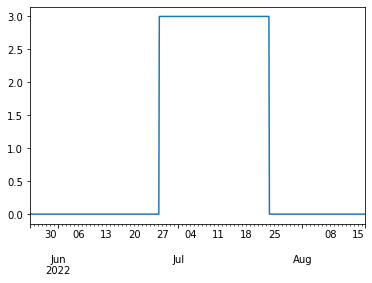

In [212]:
fig = plt.subplots()
event_class_melt_2022_pad.R.plot()

In [213]:
event_class_melt_2021_pad.index=event_class_melt_2021_pad.index.format(formatter=lambda x: x.strftime('%d-%m-%Y'))

In [214]:
event_class_melt_2022_pad.index=event_class_melt_2022_pad.index.format(formatter=lambda x: x.strftime('%d-%m-%Y'))

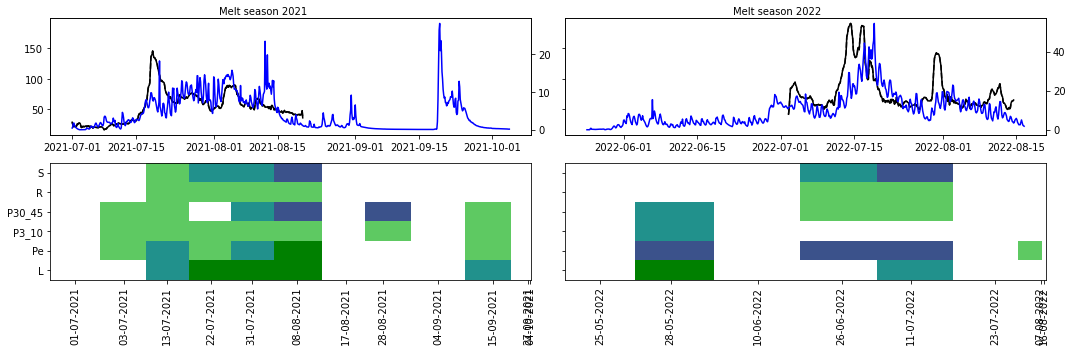

In [215]:
from matplotlib.colors import ListedColormap

cmap=matplotlib.cm.get_cmap('viridis')
cMap=ListedColormap(['white',cmap(0.25), cmap(0.5), cmap(0.75), 'g'])

fig, axs=plt.subplots(2, 2, figsize=(15,5), sharey='row')
for d in range(len(df)):

    event_0=globals()[f'event_class_{name[d]}'].fillna(0)
    # print(event_0.shape)
    duration_hour=globals()[f'df_event_time_{name[d]}']['Duration']/np.timedelta64(1, 'h')

    duration=[]
    for i in np.arange(0, len(duration_hour)):
        if i==0:
            duration.append(duration_hour[0])
        else:
            ii=duration[i-1]+duration_hour[i]
            duration.append(ii)

    
    i=pd.to_datetime(event_0.index, format='%d-%m-%Y')
    
    # date_list=i.format(formatter=lambda x: x.strftime('%d-%m-%Y'))
    date_list=i.format(formatter=lambda x: x.strftime('%d-%m-%Y'))

    # print(i)
    y=np.arange(0, 6, 1)
    X,Y = np.meshgrid(duration,y)

    im = axs[1][d].pcolormesh(X, Y, event_0.T, cmap=cMap)
    axs[1][d].set_xticks(duration, date_list, rotation='vertical')
    axs[1][d].set_yticks(y, globals()[f'event_class_{name[d]}'].columns, rotation='horizontal')
    

# cbar = plt.colorbar(im, orientation='horizontal', pad=2)
# cbar.ax.set_yticks([0, 1, 2, 3, 4])
# cbar.ax.set_yticklabels(['0','1','2', '3', '4'])
# cbar.set_label('Classes')

axs[0][0].plot(df_data_raw['TIMESTAMP'][idx_velocity_21], df_data_raw['KNG6'][idx_velocity_21], 'k--')
axs[0][0].plot(df_data_raw['TIMESTAMP'][idx_velocity_21], df_data_raw['KNG6'][idx_velocity_21], 'k')
ax1=axs[0][0].twinx()
ax1.plot(df_data_raw['TIMESTAMP'][idx_velocity_21], df_data_raw['Runoff'][idx_velocity_21], 'b')

axs[0][1].plot(df_data_raw['TIMESTAMP'][idx_velocity_22], df_data_raw['KNG6'][idx_velocity_22],'k--')
axs[0][1].plot(df_data_raw['TIMESTAMP'][idx_velocity_22], df_data_raw['KNG6'][idx_velocity_22], 'k')
ax1=axs[0][1].twinx()
ax1.plot(df_data_raw['TIMESTAMP'][idx_velocity_22], df_data_raw['Runoff'][idx_velocity_22],'b')



axs[0][0].text(0.35, 1.03, 'Melt season 2021', color='k', transform=axs[0][0].transAxes)
axs[0][1].text(0.35, 1.03, 'Melt season 2022', color='k', transform=axs[0][1].transAxes)
plt.tight_layout()
plt.savefig(path_fig_export+'classes_3D/classes_summary_prop.pdf', bbox_inches='tight')

In [216]:
# event_class_melt_2021.replace(np.nan, 0, inplace=True)
# event_class_date_melt_2021.replace(np.nan, 0, inplace=True)
# event_class_melt_2022.replace(np.nan, 0, inplace=True)
# event_class_date_melt_2022.replace(np.nan, 0, inplace=True)

In [217]:
event_class_melt_2021_pad_nan=event_class_melt_2021_pad.reset_index()
event_class_melt_2022_pad_nan=event_class_melt_2022_pad.reset_index()

In [218]:
i_Q_nan_2021=np.array(list(set(event_class_melt_2021_pad_nan.index)^set(idx_Q)))
i_Q_nan_2022=np.array(list(set(event_class_melt_2022_pad_nan.index)^set(idx_Q_22)))

In [219]:
i_L_nan_2021=np.array(list(set(event_class_melt_2021_pad_nan.index)^set(idx_L)))
i_L_nan_2022=np.array(list(set(event_class_melt_2022_pad_nan.index)^set(idx_L_22)))

In [220]:
i_Pe_nan_2021=np.array(list(set(event_class_melt_2021_pad_nan.index)^set(idx_Pe)))
i_Pe_nan_2022=np.array(list(set(event_class_melt_2022_pad_nan.index)^set(idx_Pe_22)))

In [221]:
i_P310_nan_2022=np.array(list(set(event_class_melt_2022_pad_nan.index)^set(idx_P310_22)))

In [222]:
i_P3045_nan_2021=np.array(list(set(event_class_melt_2021_pad_nan.index)^set(idx_P)))
i_P3045_nan_2022=np.array(list(set(event_class_melt_2022_pad_nan.index)^set(idx_P3045_22)))

In [223]:
i_R_nan_2021=np.array(list(set(event_class_melt_2021_pad_nan.index)^set(idx_R)))
i_R_nan_2022=np.array(list(set(event_class_melt_2022_pad_nan.index)^set(idx_R_22)))

In [224]:
event_class_melt_2021_pad_nan.index

RangeIndex(start=0, stop=768, step=1)

In [225]:
i_Q_nan_2021

array([  0,   1,   2,   3,   4,   5,   6,   7,   8,   9,  10,  11,  12,
        13,  14,  15,  16, 380, 381, 382, 383, 384, 385, 386, 387, 388,
       389, 390, 391, 392, 393, 394, 395, 396, 397, 398, 399, 400, 401,
       402, 403, 404, 405, 406, 407, 408, 409, 410, 411, 412, 413, 414,
       415, 416, 417, 418, 419, 420, 421, 422, 423, 424, 425, 426, 427,
       428, 429, 430, 431, 432, 433, 434, 435, 436, 437, 438, 439, 440,
       441, 442, 443, 444, 445, 446, 447, 448, 449, 450, 451, 452, 453,
       454, 455, 456, 457, 458, 459, 460, 461, 462, 463, 525, 526, 527,
       528, 529, 530, 531, 532, 533, 534, 535, 536, 537, 538, 539, 540,
       541, 542, 543, 544, 545, 546, 547, 548, 549, 550, 551, 552, 553,
       554, 555, 556, 557, 558, 559, 560, 561, 562, 563, 564, 565, 566,
       567, 568, 569, 570, 571, 572, 573, 574, 575, 576, 577, 578, 579,
       580, 581, 582, 583, 584, 585, 586, 587, 588, 589, 590, 591, 592,
       593, 594, 595, 596, 597, 598, 599, 600, 601, 602, 603, 60

In [226]:
i_S_nan_2021=np.array(list(set(event_class_melt_2021_pad_nan.index)^set(idx_S)))
i_S_nan_2022=np.array(list(set(event_class_melt_2022_pad_nan.index)^set(idx_S_22)))

In [227]:
event_class_melt_2021_pad_nan.loc[i_R_nan_2021, 'R']=np.nan
event_class_melt_2022_pad_nan.loc[i_R_nan_2022, 'R']=np.nan
event_class_melt_2021_pad_nan.loc[i_S_nan_2021, 'S']=np.nan
event_class_melt_2022_pad_nan.loc[i_S_nan_2022, 'S']=np.nan
event_class_melt_2022_pad_nan.loc[i_P310_nan_2022, 'P3_10']=np.nan
event_class_melt_2021_pad_nan.loc[i_P3045_nan_2021, 'P30_45']=np.nan
event_class_melt_2022_pad_nan.loc[i_P3045_nan_2022, 'P30_45']=np.nan
event_class_melt_2021_pad_nan.loc[i_Pe_nan_2021, 'Pe']=np.nan
event_class_melt_2022_pad_nan.loc[i_Pe_nan_2022, 'Pe']=np.nan
event_class_melt_2021_pad_nan.loc[i_L_nan_2021, 'L']=np.nan
event_class_melt_2022_pad_nan.loc[i_L_nan_2022, 'L']=np.nan
event_class_melt_2021_pad_nan.loc[i_Q_nan_2021, ['L', 'Pe', 'P3_10', 'P30_45', 'R', 'S']]=np.nan
event_class_melt_2022_pad_nan.loc[i_Q_nan_2022, ['L', 'Pe', 'P3_10', 'P30_45', 'R', 'S']]=np.nan

In [228]:
event_class_melt_2021_pad_nan.set_index('index', inplace=True)
event_class_melt_2022_pad_nan.set_index('index', inplace=True)

In [229]:
df_event_time_melt_2021.set_index(['Start'])

Event                Stop         Duration
Start                                                          
2021-07-01 00:00:00      0 2021-07-03 03:00:00  2 days 03:00:00
2021-07-03 03:00:00      1 2021-07-13 06:00:00 10 days 03:00:00
2021-07-13 06:00:00      2 2021-07-22 03:00:00  8 days 21:00:00
2021-07-22 03:00:00      3 2021-07-31 03:00:00  9 days 00:00:00
2021-07-31 03:00:00      4 2021-08-08 12:00:00  8 days 09:00:00
2021-08-08 12:00:00      5 2021-08-17 21:00:00  9 days 09:00:00
2021-08-17 21:00:00      6 2021-08-28 00:00:00 10 days 03:00:00
2021-08-28 00:00:00      7 2021-09-04 15:00:00  7 days 15:00:00
2021-09-04 15:00:00      8 2021-09-15 21:00:00 11 days 06:00:00
2021-09-15 21:00:00      9 2021-09-27 03:00:00 11 days 06:00:00
2021-09-27 03:00:00     10 2021-10-04 12:00:00  7 days 09:00:00
2021-10-04 12:00:00     11 2021-10-04 21:00:00  0 days 09:00:00

In [230]:
date_2021 = pd.DataFrame({'Date':event_class_2021.index})
date_2022 = pd.DataFrame({'Date':event_class_2022.index})

In [231]:
event_delim_21 = pd.concat([df_event_time_melt_2021.set_index('Start'), date_2021.set_index('Date')], axis=1)
event_delim_22 = pd.concat([df_event_time_melt_2022.set_index('Start'), date_2022.set_index('Date')], axis=1)

In [232]:
i_melt_2021 = event_delim_21.reset_index().dropna(subset=['Event']).index
i_melt_2022 = event_delim_22.reset_index().dropna(subset=['Event']).index

ii_melt_2021 = event_delim_21.dropna(subset=['Event']).index
ii_melt_2022 = event_delim_22.dropna(subset=['Event']).index

In [233]:
event_delim_21

Event                Stop        Duration
2021-07-01 00:00:00    0.0 2021-07-03 03:00:00 2 days 03:00:00
2021-07-01 03:00:00    NaN                 NaT             NaT
2021-07-01 06:00:00    NaN                 NaT             NaT
2021-07-01 09:00:00    NaN                 NaT             NaT
2021-07-01 12:00:00    NaN                 NaT             NaT
...                    ...                 ...             ...
2021-10-04 09:00:00    NaN                 NaT             NaT
2021-10-04 12:00:00   11.0 2021-10-04 21:00:00 0 days 09:00:00
2021-10-04 15:00:00    NaN                 NaT             NaT
2021-10-04 18:00:00    NaN                 NaT             NaT
2021-10-04 21:00:00    NaN                 NaT             NaT

[768 rows x 3 columns]

In [234]:
tick_melt_2021 = pd.DataFrame({'Start':event_delim_21.reset_index().dropna(subset=['Event'])['index']})
tick_melt_2022 = pd.DataFrame({'Start':event_delim_22.reset_index().dropna(subset=['Event'])['index']})

/home/colili/anaconda3/lib/python3.8/site-packages/pandas/core/frame.py:4524: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  return super().replace(


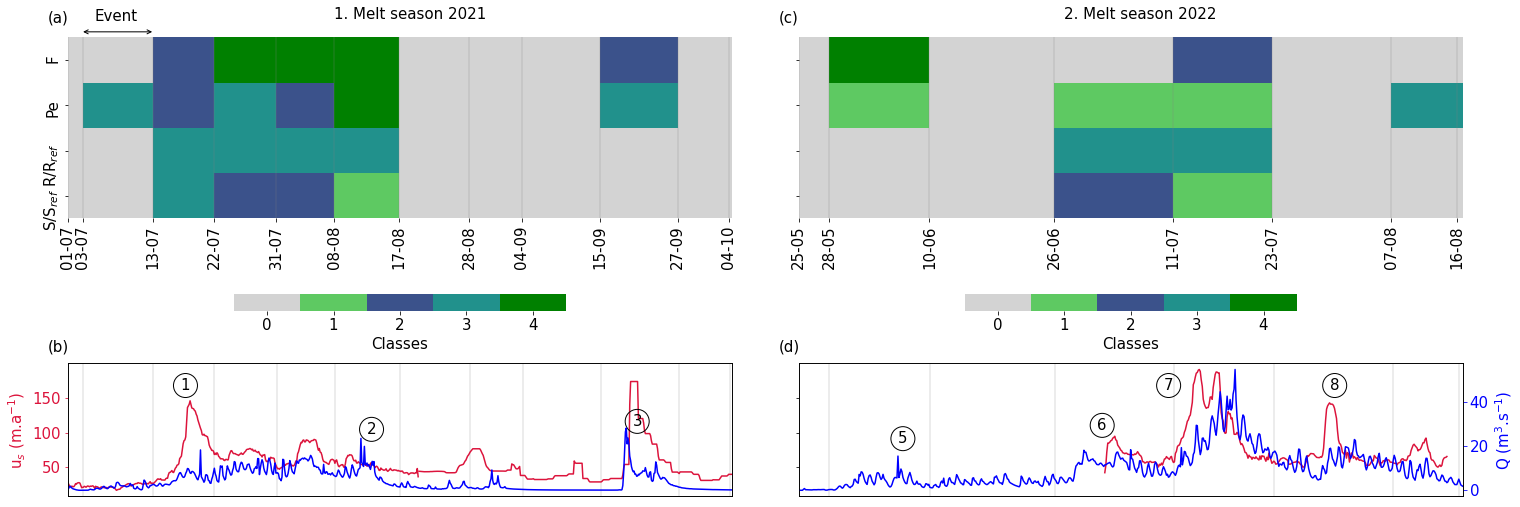

In [235]:
cmap=matplotlib.cm.get_cmap('viridis')
color=['lightgray', cmap(0.75), cmap(0.25), cmap(0.5), 'g']
fig, axs = plt.subplots(2, 2, figsize=(25, 10), sharey='row')


for d in np.arange(0, len(df)):
    
    # globals()[f'event_class_{name[d]}_pad'] = globals()[f'event_class_{name[d]}_pad'][['L', 'Pe', 'P30_45', 'R', 'S']]
    # globals()[f'event_class_{name[d]}_pad'].replace(np.nan, 0, inplace=True)
    # globals()[f'event_class_{name[d]}_pad'].columns=['F', 'Pe', 'P[30-45]', 'R/R$_{ref}$', 'S/S$_{ref}$']
    globals()[f'event_class_{name[d]}_pad'] = globals()[f'event_class_{name[d]}_pad'][['L', 'Pe', 'R', 'S']]
    globals()[f'event_class_{name[d]}_pad'].replace(np.nan, 0, inplace=True)
    globals()[f'event_class_{name[d]}_pad'].columns=['F', 'Pe', 'R/R$_{ref}$', 'S/S$_{ref}$']
    # axs[1][d]=sns.heatmap(globals()[f'event_class_{name[d]}_pad_nan'].T, cmap=color, ax=axs[1][d], cbar_kws={'label': 'Classes',  'ticks':[1, 2, 3, 4], 'orientation':'horizontal', 'pad':0.39, "shrink": 0.5})
    axs[0][d]=sns.heatmap(globals()[f'event_class_{name[d]}_pad'].T, cmap=color, ax=axs[0][d], cbar_kws={'label': 'Classes',  'ticks':[0.4, 1.2, 2, 2.8, 3.6], 'orientation':'horizontal', 'pad':0.25, "shrink": 0.5})
    # event_class_2021.iloc[:, :6]
    axs[0][d].tick_params(labelsize=15)
    # axs[0][d].collection[0].colorbar.set_ticklabels(['0', '1', '2', '3', '4'])
    cax = axs[0][d].figure.axes[-1]
    cax.tick_params(labelsize=15)
    cax.xaxis.label.set_size(15)
    cax.set_xticklabels(['0', '1', '2', '3', '4'])
    
    for i in np.arange(0, len(globals()[f'i_{name[d]}'])):
        axs[0][d].axvline(globals()[f'i_{name[d]}'][i], color='grey', alpha=0.2)
        axs[1][d].axvline(globals()[f'ii_{name[d]}'][i], color='grey', alpha=0.2)
    
    i=pd.to_datetime(globals()[f'tick_{name[d]}'].set_index('Start').index, format='%d-%m-%Y, %H')
    # print(i.iloc[:, 1])
    index=i.format(formatter=lambda x: x.strftime('%d-%m'))
    
    axs[0][d].set_xticks(globals()[f'i_{name[d]}'] , index)

    # i=pd.to_datetime(globals()[f'event_class_{name[d]}_pad_nan'].index, format='%d-%m-%Y')
    # i=pd.to_datetime(globals()[f'event_class_{name[d]}_pad'].index, format='%d-%m-%Y')
    

    # index=i.format(formatter=lambda x: x.strftime('%d-%m-%Y'))
    # axs[1][d].set_xticks(np.arange(0, globals()[f'event_class_{name[d]}_pad_nan'].shape[0], 50) ,index[0::50])

    # axs[1][d]=sns.heatmap(globals()[f'event_class_{name[d]}_pad_nan'].T, cmap='viridis', ax=axs[1][d], linewidths=0)
    # axs[1][d].margins(x=0)

KNG7_median = df_data_raw['KNG7'].rolling(18).median()
KNG7_median_2 = df_data_raw['KNG7'].rolling(80).mean()

axs[1][0].plot(df_data_raw['TIMESTAMP'][idx_velocity_21], df_data_raw['KNG6'][idx_velocity_21], color='crimson', linestyle='-')
axs[1][0].plot(df_data_raw['TIMESTAMP'][idx_velocity_21][405:], KNG7_median[idx_velocity_21][405:], 'crimson')
axs[1][0].set_ylabel('u$_s$ (m.a$^{-1}$)', color='crimson', fontsize=15)
axs[1][0].tick_params(axis='y', color='crimson', labelcolor='crimson', labelsize=15)

ax1=axs[1][0].twinx()
ax1.plot(df_data_raw['TIMESTAMP'][idx_velocity_21], df_data_raw['Runoff'][idx_velocity_21], 'b')
ax1.get_yaxis().set_visible(False)
axs[1][0].get_xaxis().set_visible(False)

# axs[1][1].get_xaxis().set_visible(False)
axs[1][1].plot(df_data_raw['TIMESTAMP'][idx_velocity_22], df_data_raw['KNG6'][idx_velocity_22], color='crimson', linestyle='-')
axs[1][1].plot(df_data_raw['TIMESTAMP'][idx_velocity_22][530:], KNG7_median[idx_velocity_22][530:], 'crimson')
ax2=axs[1][1].twinx()
ax2.plot(df_data_raw['TIMESTAMP'][idx_velocity_22], df_data_raw['Runoff'][idx_velocity_22],'b')
ax2.set_ylabel('Q (m$^3$.s$^{-1}$)', color='b', fontsize=15)
ax2.tick_params(axis='y', color='b', labelcolor='b', labelsize=15)
axs[1][1].tick_params(axis='x', labelsize=15)
ax2.get_shared_y_axes().join(ax2, ax1)
axs[1][1].get_xaxis().set_visible(False)


axs[0][0].text(0.4, 1.1, '1. Melt season 2021', color='k', fontsize=15, transform=axs[0][0].transAxes)
axs[0][1].text(0.4, 1.1, '2. Melt season 2022', color='k', fontsize=15, transform=axs[0][1].transAxes)

axs[1][1].margins(x=0)
axs[1][0].margins(x=0)

axs[0][0].annotate('', xy=(0.02, 1.03), va='center',
                ha='center', xytext=(0.13, 1.03), xycoords='axes fraction', horizontalalignment="center", 
                arrowprops=dict(arrowstyle="<->", color='k'))
axs[0][0].text(0.04, 1.09, 'Event', color='k', fontsize=15, transform=axs[0][0].transAxes)
axs[0][0].text(-0.03, 1.08, '(a)', color='k', fontsize=15, transform=axs[0][0].transAxes)
axs[0][1].text(-0.03, 1.08, '(c)', color='k', fontsize=15, transform=axs[0][1].transAxes)
axs[1][0].text(-0.03, 1.09, '(b)', color='k', fontsize=15, transform=axs[1][0].transAxes)
axs[1][1].text(-0.03, 1.09, '(d)', color='k', fontsize=15, transform=axs[1][1].transAxes)

axs[1][0].text(0.17, 0.8, '1', color='k', fontsize=15, transform=axs[1][0].transAxes, bbox = dict(boxstyle="circle", facecolor='none', edgecolor='k'))
# axs[0][0].text(0.3, 0.8, '2', color='k', fontsize=15, transform=axs[0][0].transAxes, bbox = dict(boxstyle="circle", facecolor='none', edgecolor='k'))
axs[1][0].text(0.45, 0.47, '2', color='k', fontsize=15, transform=axs[1][0].transAxes, bbox = dict(boxstyle="circle", facecolor='none', edgecolor='k'))
axs[1][0].text(0.85, 0.53, '3', color='k', fontsize=15, transform=axs[1][0].transAxes, bbox = dict(boxstyle="circle", facecolor='none', edgecolor='k'))

axs[1][1].text(0.15, 0.4, '5', color='k', fontsize=15, transform=axs[1][1].transAxes, bbox = dict(boxstyle="circle", facecolor='none', edgecolor='k'))
axs[1][1].text(0.45, 0.5, '6', color='k', fontsize=15, transform=axs[1][1].transAxes, bbox = dict(boxstyle="circle", facecolor='none', edgecolor='k'))
axs[1][1].text(0.55, 0.8, '7', color='k', fontsize=15, transform=axs[1][1].transAxes, bbox = dict(boxstyle="circle", facecolor='none', edgecolor='k'))
axs[1][1].text(0.80, 0.8, '8', color='k', fontsize=15, transform=axs[1][1].transAxes, bbox = dict(boxstyle="circle", facecolor='none', edgecolor='k'))

axs[1][0].set_box_aspect(1/5)
axs[1][1].set_box_aspect(1/5)

plt.subplots_adjust(wspace=0.1, hspace=-0.2)

# plt.tight_layout()
plt.savefig(path_fig_export+'classes_3D/classes_summary_prop_velocity_runoff.png', bbox_inches='tight')

In [236]:
2.4e-24*((917*9.8*np.sin(0.05))**3)*900**4

0.00014267064124393917

In [237]:
(2.4e-24*((917*9.8*np.sin(0.05))**3)*900**4)*60*60*24

12.326743403476344

In [238]:
2.4e-24*((917*9.8*np.sin(0.03))**3)*350**4

7.054040990301917e-07

In [239]:
(2*2.4e-24*((0.5*917*9.8*np.sin(0.03))**3)*(350**4)/4)*60*60*24*365

1.3903514791885079

In [240]:
0.125*0.5

0.0625

In [241]:
1.39*16

22.24